In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

from scipy.fft import fft, ifft

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('CardioSpike/data/train.csv')
mike = pd.read_csv('CardioSpike/data/y_pred_mike_v1.csv')
data['y_pred'] = mike['y_pred']
data.head()

id  time    x  y  y_pred
0   1     0  800  0       0
1   1   780  780  0       0
2   1  1572  792  0       0
3   1  2392  820  0       0
4   1  3196  804  0       0

In [5]:
# #для нейронок
# scaler = StandardScaler()
# scaler.fit(data.x.to_numpy().reshape(-1, 1))
# data.x = scaler.transform(data.x.to_numpy().reshape(-1, 1))
# data.head()

In [6]:
test = pd.read_csv('CardioSpike/data/test.csv')
test['y'] = 0
test.head()

id  time    x  y
0  81     0  576  0
1  81   568  568  0
2  81  1140  572  0
3  81  1716  576  0
4  81  2284  568  0

In [214]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

# features = [
# #         'x', 
#     'x_diff_1', 'x_diff_2','x_diff_3','x_diff_4',#'x_diff_5','x_diff_6',#'time_diff',
# #     'x_diff_7', 'x_diff_8','x_diff_9','x_diff_10','x_diff_11','x_diff_12',
#     'x_diff_front_1', 'x_diff_front_2','x_diff_front_3','x_diff_front_4',#'x_diff_front_5','x_diff_front_6',
# # 'x_diff_front_7', 'x_diff_front_8','x_diff_front_9','x_diff_front_10','x_diff_front_11','x_diff_front_12',


    
#     'norm_diff_1', 'norm_diff_2','norm_diff_3','norm_diff_4',
#     #'norm_diff_5','norm_diff_6',#'time_diff',
# #         'norm_diff_7', 'norm_diff_8','norm_diff_9','norm_diff_10',
# #     'norm_diff_11','norm_diff_12',#'time_diff',
#     'norm_diff_front_1', 'norm_diff_front_2','norm_diff_front_3','norm_diff_front_4',
#  #   'norm_diff_front_5','norm_diff_front_6',

# #     'norm_diff_front_7', 'norm_diff_front_7','norm_diff_front_9','norm_diff_front_10',
# #     'norm_diff_front_11','norm_diff_front_12',
    
#     #         'imf_0', 'imf_1', 'imf_2', 'imf_3', 'imf_4',
# #         'pks_bin', 'pks',
# #         'trs_bin', 'trs',
#          'mean_2','mean_4','mean_6',# 'mean_20', 'mean_50',
#          'std_2','std_4','std_6', #'std_20', 'std_50',
#          'norm_2','norm_4','norm_6', #'norm_20', 'norm_50',
#     'diff_with_mean_2','diff_with_mean_4','diff_with_mean_6',
# #     'x_relative', 'x_log_relative'
#           'add_std_2', 'minus_std_2', 'add_2std_2', 'minus_2std_2', 'add_15std_2', 'minus_15std_2',
#     'add_std_4', 'minus_std_4', 'add_2std_4', 'minus_2std_4', 'add_15std_4', 'minus_15std_4',
#     'add_std_6', 'minus_std_6', 'add_2std_6', 'minus_2std_6', 'add_15std_6', 'minus_15std_6',
# #     'y_pred'
#     ]

features = [
        'x', 
    'x_diff_1', 'x_diff_2','x_diff_3','x_diff_4',#'x_diff_5','x_diff_6',#'time_diff',
#     'x_diff_7', 'x_diff_8','x_diff_9','x_diff_10','x_diff_11','x_diff_12',
#     'x_diff_front_1', 'x_diff_front_2','x_diff_front_3','x_diff_front_4',#'x_diff_front_5','x_diff_front_6',
# 'x_diff_front_7', 'x_diff_front_8','x_diff_front_9','x_diff_front_10','x_diff_front_11','x_diff_front_12',


    
    'norm_diff_1', 'norm_diff_2','norm_diff_3','norm_diff_4',
#    'norm_diff_5','norm_diff_6',#'time_diff',
#         'norm_diff_7', 'norm_diff_8','norm_diff_9','norm_diff_10',
#     'norm_diff_11','norm_diff_12',#'time_diff',
#     'norm_diff_front_1', 'norm_diff_front_2','norm_diff_front_3','norm_diff_front_4',
 #   'norm_diff_front_5','norm_diff_front_6',

#     'norm_diff_front_7', 'norm_diff_front_7','norm_diff_front_9','norm_diff_front_10',
#     'norm_diff_front_11','norm_diff_front_12',
    
    #         'imf_0', 'imf_1', 'imf_2', 'imf_3', 'imf_4',
#         'pks_bin', 'pks',
#         'trs_bin', 'trs',
         'mean_2','mean_4','mean_6',# 'mean_20', 'mean_50',
         'std_2','std_4','std_6', #'std_20', 'std_50',
         'norm_2','norm_4','norm_6', #'norm_20', 'norm_50',
    'diff_with_mean_2','diff_with_mean_4','diff_with_mean_6',
#     'x_relative', 'x_log_relative'
          'add_std_2', 'minus_std_2', 'add_2std_2', 'minus_2std_2', 'add_15std_2', 'minus_15std_2',
    'add_std_4', 'minus_std_4', 'add_2std_4', 'minus_2std_4', 'add_15std_4', 'minus_15std_4',
    'add_std_6', 'minus_std_6', 'add_2std_6', 'minus_2std_6', 'add_15std_6', 'minus_15std_6',
#     'y_pred'
       'x_log_relative', 'rolling_mean', 'rolling_mean_rel'
    ]

CHUNK_LEN = 10
def process_df(df, _id, chunk_len=32, aug=False):
        seq_df = df[df.id==_id].reset_index(drop=True)
        if aug:
            seq_df.x = add_noize(seq_df.x.values)  
#         print(seq_df.shape)
#         print(seq_df.columns)
# ['id', 'time', 'x', 'y'],
        x1 = np.mean(seq_df.x.values[:20])
        x2 = np.mean(seq_df.x.values[-20:])
        t0 = seq_df.time.values[0]
        t1 = seq_df.time.values[-1]
        start_df = []
        for i in range(chunk_len // 2):
            start_df.insert(0, [_id, t0 - (i+1) * 600, x1, 0])
        end_df = []
        for i in range(chunk_len // 2):
            end_df.append([_id, t1 + (i+1) * 600, x2, 0])
        start_df = pd.DataFrame(start_df, columns=['id', 'time', 'x', 'y'])
        end_df = pd.DataFrame(end_df, columns=['id', 'time', 'x', 'y'])
        seq_df = pd.concat([start_df, seq_df, end_df])
#         print(seq_df.shape)
    
        
        seq_df['x_relative'] = seq_df.x / seq_df.x.shift(1)
        seq_df['x_log_relative'] = np.log(seq_df['x_relative'])
        seq_df = seq_df.fillna(method='ffill')
        
        seq_df['rolling_mean'] = seq_df['x'].rolling(window=5).max()
        seq_df['rolling_mean_rel'] = seq_df['x_log_relative'].rolling(window=5).max()
        
        seq_df['time_diff'] = seq_df.time.diff()
        for i in range(12):
            seq_df[f'x_diff_{i + 1}'] = seq_df.x.diff(i + 1).fillna(0)
        for i in range(12):
            seq_df[f'x_diff_front_{i + 1}'] = seq_df.x.diff(-(i + 1)).fillna(0)
    #################################### скользящие средние и дисперсии ###########################
        sizes = [2, 4, 6, 20, 50]
        for i in sizes:
            m, s = sliding(seq_df.x.values, i)
            seq_df[f'mean_{i}'] = m
            seq_df[f'std_{i}'] = s
#             seq_df[f'add_std_{i}'] = np.array(seq_df.x.values) + np.array(s)
#             seq_df[f'minus_std_{i}'] = np.array(seq_df.x.values) - np.array(s)
#             seq_df[f'add_2std_{i}'] = np.array(seq_df.x.values) + (np.array(s) / 2)
#             seq_df[f'minus_2std_{i}'] = np.array(seq_df.x.values) - (np.array(s) / 2)
            seq_df[f'add_std_{i}'] = (np.array(m) + np.array(s)) - np.array(seq_df.x.values)
            seq_df[f'minus_std_{i}'] = np.array(seq_df.x.values) - (np.array(m) - np.array(s))
            seq_df[f'add_2std_{i}'] = (np.array(m) + np.array(s)/2) - np.array(seq_df.x.values)
            seq_df[f'minus_2std_{i}'] = np.array(seq_df.x.values) - (np.array(m) - np.array(s)/2)
            seq_df[f'add_15std_{i}'] = (np.array(m) + 1.5*np.array(s)) - np.array(seq_df.x.values)
            seq_df[f'minus_15std_{i}'] = np.array(seq_df.x.values) - (np.array(m) - 1.5*np.array(s))
            seq_df[f'norm_{i}'] = (seq_df.x.values - np.array(m)) / (np.array(s) + 1e-3)
            seq_df[f'diff_with_mean_{i}'] = seq_df.x.values - np.array(m)
        
        for i in range(12):
            seq_df[f'norm_diff_{i + 1}'] = seq_df['norm_6'].diff(i + 1).fillna(0)
        for i in range(12):
            seq_df[f'norm_diff_front_{i + 1}'] = seq_df['norm_6'].diff(-(i + 1)).fillna(0)
        return seq_df
def add_noize(a):
    return a + np.random.normal(0,10, len(a))
def get_check(df, _id,
                      chunk_len=32, 
                      is_one_hot_y=False,
                      x_column='x',
                      y_column='y',
                      N_CLASS=2,
                     ):
    X = []
    Y = []
    id2process_dct = {}
    seq_ids = list(df.id.unique())
    #for _id in tqdm_notebook(seq_ids):
    
    seq_df = process_df(df, _id, chunk_len=CHUNK_LEN)
    id2process_dct[_id] = seq_df 
        
#     for seq_id in tqdm_notebook(seq_ids):
    seq_id = _id
    seq_df = id2process_dct[seq_id]
    seq_df = seq_df.fillna(0)
    seq_len = len(seq_df)
#     n_slices = seq_len // chunk_len

    for i in range(len(seq_df) - chunk_len):
        slice_df = seq_df.iloc[i:i+chunk_len]
        X.append(slice_df[features].values)
        y = slice_df['y'].tolist()[len(slice_df) // 2]
        if is_one_hot_y:
            y = tf.keras.utils.to_categorical(y, num_classes=N_CLASS, dtype='float32')
        Y.append(y)


    X = np.array(X, dtype='float32')
    Y = np.array(Y, dtype='int')
    return seq_df.time.values, X, seq_df.x.values, seq_df.y.values

def get_smart_dataset(df, seq_ids_train, seq_ids_val, seq_ids_test,
                      chunk_len=32, 
                      is_one_hot_y=False,
                      x_column='x',
                      y_column='y',
                      N_CLASS=2,
                     ):
    X_train, X_val, X_test = [], [], []
    Y_train, Y_val, Y_test = [], [], []
    id2process_dct = {}
    
#     seq_ids = list(df.id.unique())
#     t1, t2 = int(0.7*len(seq_ids)), int(0.9*len(seq_ids))
#     seq_ids_train = seq_ids[:t1]
#     seq_ids_val = seq_ids[t1:t2]
#     seq_ids_test = seq_ids[t2:]
    
#     for _id in tqdm_notebook(seq_ids):
#         seq_df = process_df(df, _id)
                
#         id2process_dct[_id] = seq_df 
     
    #### train
    for seq_id in tqdm_notebook(seq_ids_train):
    
#         seq_df = id2process_dct[seq_id]
        seq_df = process_df(df, seq_id, chunk_len=CHUNK_LEN)
        seq_df = seq_df.fillna(0)
        seq_len = len(seq_df)
        n_slices = seq_len // chunk_len

        for i in range(len(seq_df) - chunk_len):
            slice_df = seq_df.iloc[i:i+chunk_len]
            X_train.append(slice_df[features].values)
            y = slice_df['y'].tolist()[len(slice_df) // 2]
#             if is_one_hot_y:
#                 y = tf.keras.utils.to_categorical(y, num_classes=N_CLASS, dtype='float32')
            Y_train.append(y)
            
        ################## aug
        for i in range(10):
            seq_df = process_df(df, seq_id, aug=True)
            seq_len = len(seq_df)
            n_slices = seq_len // chunk_len

            for i in range(len(seq_df) - chunk_len):
                slice_df = seq_df.iloc[i:i+chunk_len]
                X_train.append(slice_df[features].values)
                y = slice_df['y'].tolist()[len(slice_df) // 2]
#                 if is_one_hot_y:
#                     y = tf.keras.utils.to_categorical(y, num_classes=N_CLASS, dtype='float32')
                Y_train.append(y)
        #######################
    ##### val
    for seq_id in tqdm_notebook(seq_ids_val):
    
#         seq_df = id2process_dct[seq_id]
        seq_df = process_df(df, seq_id, chunk_len=CHUNK_LEN)
        seq_df = seq_df.fillna(0)
        seq_len = len(seq_df)
        n_slices = seq_len // chunk_len

        for i in range(len(seq_df) - chunk_len):
            slice_df = seq_df.iloc[i:i+chunk_len]
            X_val.append(slice_df[features].values)
            y = slice_df['y'].tolist()[len(slice_df) // 2]
#             if is_one_hot_y:
#                 y = tf.keras.utils.to_categorical(y, num_classes=N_CLASS, dtype='float32')
            Y_val.append(y)

            
    #### test
    for seq_id in tqdm_notebook(seq_ids_test):
    
#         seq_df = id2process_dct[seq_id]
        seq_df = process_df(df, seq_id, chunk_len=CHUNK_LEN)
        seq_df = seq_df.fillna(0)
        seq_len = len(seq_df)
        n_slices = seq_len // chunk_len

        for i in range(len(seq_df) - chunk_len):
            slice_df = seq_df.iloc[i:i+chunk_len]
            X_test.append(slice_df[features].values)
            y = slice_df['y'].tolist()[len(slice_df) // 2]
#             if is_one_hot_y:
#                 y = tf.keras.utils.to_categorical(y, num_classes=N_CLASS, dtype='float32')
            Y_test.append(y)

    X_train = np.array(X_train, dtype='float32')
    Y_train = np.array(Y_train, dtype='int')
    X_val = np.array(X_val, dtype='float32')
    Y_val = np.array(Y_val, dtype='int')
    X_test = np.array(X_test, dtype='float32')
    Y_test = np.array(Y_test, dtype='int')
    return X_train, Y_train, X_val, Y_val, X_test, Y_test, seq_ids_train, seq_ids_val, seq_ids_test

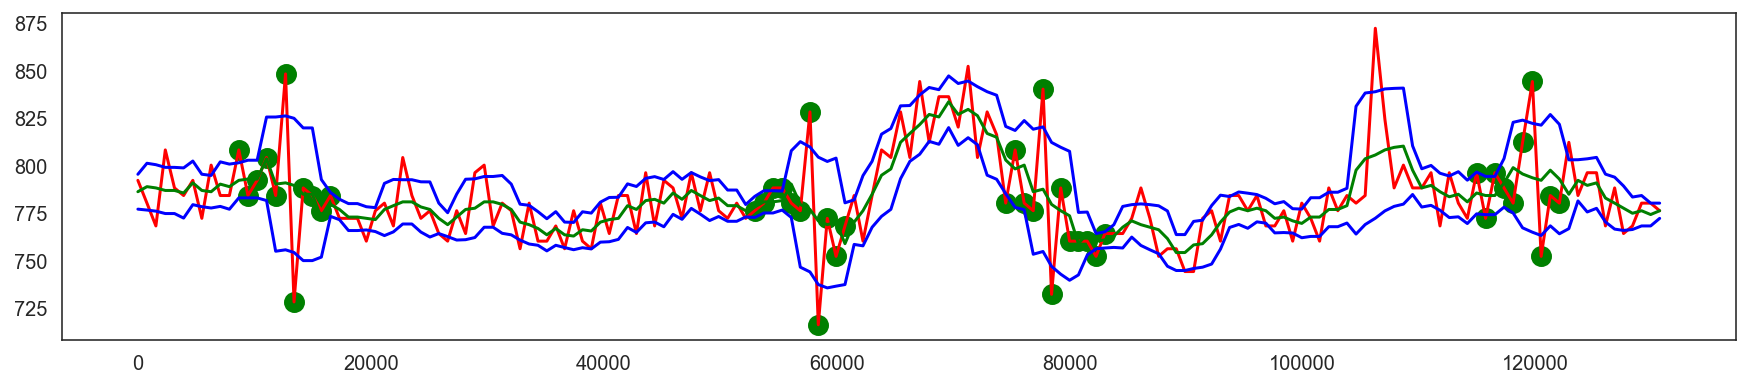

In [215]:
def sliding(x, len_):
    x = [x[0]] * (len_ // 2) + list(x) + [x[-1]] * (len_ // 2)
    mean, std = [], []
    for i in range(0, len(x)-len_, 1):
#         print()
        mean.append(np.mean(x[i : i+len_]))
        std.append(np.std(x[i : i+len_]))
    return mean, std

x = data[data.id == 6].x.values
time = data[data.id == 6].time.values
y = data[data.id == 6].y.values
mean, std = sliding(x, 6)

plt.figure(figsize=(15,3))
plt.plot(time, x, 'r')
plt.plot(time, mean, 'g')
plt.scatter(time[y == 1], x[y == 1], s=90, c='g', label='gt')
plt.plot(time, np.array(mean) - np.array(std), 'b')
plt.plot(time, np.array(mean) + np.array(std), 'b')
plt.show()

In [216]:
# seq_ids = list(data.id.unique())
# np.random.shuffle(seq_ids)
# # print(seq_ids)
# t1, t2 = int(0.7*len(seq_ids)), int(0.9*len(seq_ids))
seq_ids_train = seq_ids#[:t1]
seq_ids_val = seq_ids[t1:t2]
seq_ids_test = seq_ids[t2:]

x_train, y_train, x_val, y_val, x_test, y_test, seq_ids_train, seq_ids_val, seq_ids_test = get_smart_dataset(data, seq_ids_train, seq_ids_val, seq_ids_test, chunk_len=CHUNK_LEN)
print(x_train.shape, y_train.shape)

/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:194: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid val

/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:225: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:243: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(715737, 10, 42) (715737,)


In [217]:
lalala = x_train

In [219]:
x_train = x_train[:x_train.shape[0] // 2, :, :]

In [220]:
from sklearn.decomposition import PCA

pca_transformer = PCA(n_components=5).fit(x_train[:,:, 0])
X_pca = pca_transformer.transform(x_train[:,:, 0])
print(f'Explained info: {round(sum(pca_transformer.explained_variance_ratio_)*100)}%')


# df['PCA_1'] = X_pca[:, 0]
# df['PCA_2'] = X_pca[:, 1]
# df['PCA_3'] = X_pca[:, 2]

Explained info: 62.0%


In [221]:
X_pca.shape, x_train.shape, X.shape

((357868, 5), (357868, 10, 42), (60487, 10))

In [222]:
X_val_pca = pca_transformer.transform(x_val[:,:, 0])
X_test_pca = pca_transformer.transform(x_test[:,:, 0])

In [223]:
# x_train = np.array(x_train)
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1] *x_train.shape[2] ))
# y_train = np.array(y_train)
# x_val = np.array(x_val)
x_val = x_val.reshape((x_val.shape[0],x_val.shape[1] *x_val.shape[2] ))
# y_val = np.array(y_val)
# x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1] *x_test.shape[2] ))
# y_test = np.array(y_test)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(357868, 420) (715737,)
(11374, 420) (11374,)
(4022, 420) (4022,)


In [224]:
x_train = x_train.tolist()
for i in range(len(X_pca)):
    x_train[i].extend(X_pca[i])
x_train = np.array(x_train)
x_train.shape

(357868, 425)

In [225]:
x_val = x_val.tolist()
for i in range(len(X_val_pca)):
    x_val[i].extend(X_val_pca[i])
x_val = np.array(x_val)
x_val.shape

(11374, 425)

In [226]:
x_test = x_test.tolist()
for i in range(len(X_test_pca)):
    x_test[i].extend(X_test_pca[i])
x_test = np.array(x_test)
x_test.shape

(4022, 425)

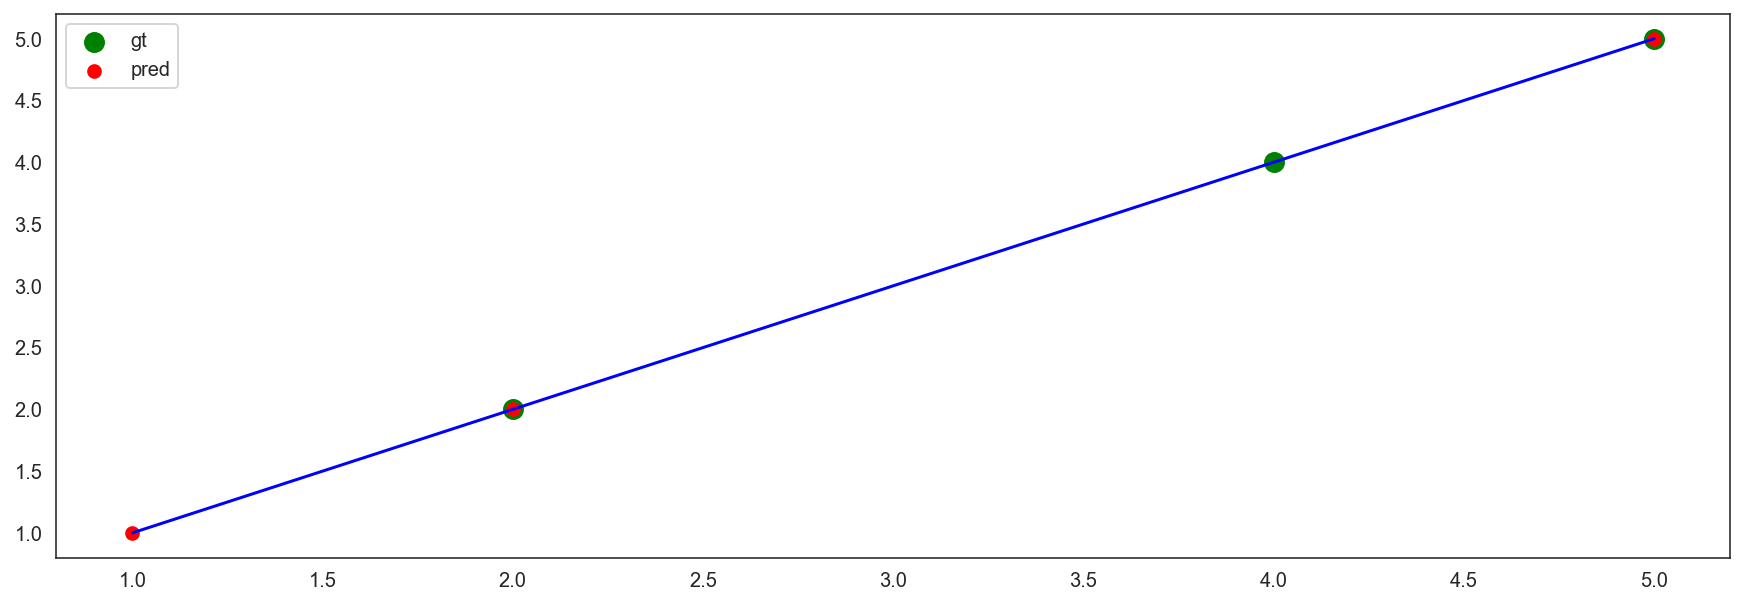

In [202]:
def plot_res(time, x, gt=None, pred=None):
    t1, t2 = int(0.7*len(x)), int(0.9*len(x))
    t1, t2 = time[t1], time[t2]
    
    plt.figure(figsize=(15, 5))
#     plt.axvline(t1, c='black', label='train/val/test')
#     plt.axvline(t2, c='black')
    plt.plot(time, x, 'b-')
    plt.scatter(time[gt == 1], x[gt == 1], s=90, c='g', label='gt')
    plt.scatter(time[pred == 1], x[pred == 1], s=40, c='r', label='pred')
    plt.legend(loc='best')
    plt.show()
    #plt.save(...)
 
plot_res(np.array([1,2,3,4,5]), np.array([1,2,3,4,5]), gt=np.array([0,1,0,1,1]), pred=np.array([1,1,0,0,1]))

In [212]:
def add_noize(a):
    return a + np.random.normal(0,10, len(a))

In [227]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier

In [228]:
from catboost.metrics import F1
f1_custom = F1(use_weights=False)

In [ ]:
dataset_val = Pool(x_val, y_val)
dataset_test = Pool(x_test, y_test)
# взвесить классы!
model = CatBoostClassifier(iterations=1000,
#                           learning_rate=0.1,
#                           depth=5,
#                         max_depth=7,
#                          n_estimators=1000,
#                            l2_leaf_reg=2,
#                            bootstrap_type='Bernoulli',
                           use_best_model=True,
                        class_weights=[0.143, 1-0.143],
#                          loss_function='RMSE',
#                          eval_metric='F1', #'AUC',
                           eval_metric=f1_custom,
                         metric_period=100,
                          
                          border_count=90, #.21905885520627, 
                           depth=5.0, 
                           l2_leaf_reg=5.1068065853115385, 
                           learning_rate=0.12611248771381028
                          )

model.fit(x_train, y_train[:len(y_train)//2],  eval_set=[dataset_val, dataset_test])

0:	learn: 0.5229065	test: 0.6208689	test1: 0.6459330	best: 0.6459330 (0)	total: 418ms	remaining: 6m 58s
100:	learn: 0.7777605	test: 0.8415428	test1: 0.8393686	best: 0.8393686 (100)	total: 47.1s	remaining: 6m 59s
200:	learn: 0.8121252	test: 0.8545284	test1: 0.8553933	best: 0.8553933 (200)	total: 1m 38s	remaining: 6m 30s
300:	learn: 0.8294770	test: 0.8624113	test1: 0.8575472	best: 0.8575472 (300)	total: 2m 24s	remaining: 5m 35s
400:	learn: 0.8408887	test: 0.8636471	test1: 0.8640916	best: 0.8640916 (400)	total: 3m 25s	remaining: 5m 6s
500:	learn: 0.8504943	test: 0.8666031	test1: 0.8639618	best: 0.8640916 (400)	total: 4m 13s	remaining: 4m 12s
600:	learn: 0.8581546	test: 0.8670796	test1: 0.8668582	best: 0.8668582 (600)	total: 5m 1s	remaining: 3m 19s


In [69]:
(3925 - 3903)/2

11.0

In [75]:
pd.set_option('display.max_rows', 200)

In [84]:
test[test.id == 37].shape

(143, 4)

In [85]:
test[test.id == 37]

id   time     x  y
10825  37      0   648  0
10826  37    652   652  0
10827  37   1300   648  0
10828  37   1944   644  0
10829  37   2588   644  0
10830  37   3232   644  0
10831  37   3880   648  0
10832  37   4572   692  0
10833  37   5176   604  0
10834  37   5820   644  0
10835  37   6464   644  0
10836  37   7104   640  0
10837  37   7792   688  0
10838  37   8380   588  0
10839  37   9020   640  0
10840  37   9656   636  0
10841  37  10296   640  0
10842  37  10940   644  0
10843  37  11584   644  0
10844  37  12228   644  0
10845  37  12876   648  0
10846  37  13576   700  0
10847  37  14176   600  0
10848  37  14820   644  0
10849  37  15516   696  0
10850  37  16116   600  0
10851  37  16756   640  0
10852  37  17396   640  0
10853  37  18036   640  0
10854  37  18668   632  0
10855  37  19304   636  0
10856  37  19940   636  0
10857  37  20568   628  0
10858  37  21196   628  0
10859  37  21828   632  0
10860  37  22456   628  0
10861  37  23076   620  0
10862  37  23700   624  0
10863  37  24328   628  0
10864  37  24948   620  0
10865  37  25616   668  0
10866  37  26188   572  0
10867  37  26808   620  0
10868  37  27428   620  0
10869  37  28048   620  0
10870  37  28672   624  0
10871  37  29292   620  0
10872  37  29964   672  0
10873  37  30584   620  0
10874  37  31160   576  0
10875  37  31780   620  0
10876  37  32404   624  0
10877  37  33640  1236  0
10878  37  34260   620  0
10879  37  34876   616  0
10880  37  35496   620  0
10881  37  36112   616  0
10882  37  36732   620  0
10883  37  37352   620  0
10884  37  37888   536  0
10885  37  38648   760  0
10886  37  39268   620  0
10887  37  39836   568  0
10888  37  40456   620  0
10889  37  41124   668  0
10890  37  41648   524  0
10891  37  42312   664  0
10892  37  42984   672  0
10893  37  43516   532  0
10894  37  44232   716  0
10895  37  44804   572  0
10896  37  46064  1260  0
10897  37  46692   628  0
10898  37  47268   576  0
10899  37  47960   692  0
10900  37  48592   632  0
10901  37  49228   636  0
10902  37  49876   648  0
10903  37  50528   652  0
10904  37  51232   704  0
10905  37  51840   608  0
10906  37  52496   656  0
10907  37  53204   708  0
10908  37  53808   604  0
10909  37  54460   652  0
10910  37  55112   652  0
10911  37  55816   704  0
10912  37  56416   600  0
10913  37  57116   700  0
10914  37  57716   600  0
10915  37  58364   648  0
10916  37  59004   640  0
10917  37  59640   636  0
10918  37  60276   636  0
10919  37  60908   632  0
10920  37  61540   632  0
10921  37  62172   632  0
10922  37  62800   628  0
10923  37  63424   624  0
10924  37  64052   628  0
10925  37  64676   624  0
10926  37  65296   620  0
10927  37  65916   620  0
10928  37  66536   620  0
10929  37  67156   620  0
10930  37  67768   612  0
10931  37  68432   664  0
10932  37  69004   572  0
10933  37  69616   612  0
10934  37  70228   612  0
10935  37  70840   612  0
10936  37  71456   616  0
10937  37  72072   616  0
10938  37  72684   612  0
10939  37  73300   616  0
10940  37  73916   616  0
10941  37  74532   616  0
10942  37  75188   656  0
10943  37  75752   564  0
10944  37  76408   656  0
10945  37  77016   608  0
10946  37  77624   608  0
10947  37  78180   556  0
10948  37  78832   652  0
10949  37  79384   552  0
10950  37  79996   612  0
10951  37  80656   660  0
10952  37  81216   560  0
10953  37  81832   616  0
10954  37  82444   612  0
10955  37  83064   620  0
10956  37  83684   620  0
10957  37  84304   620  0
10958  37  84928   624  0
10959  37  85548   620  0
10960  37  86168   620  0
10961  37  86792   624  0
10962  37  87420   628  0
10963  37  88044   624  0
10964  37  88668   624  0
10965  37  89296   628  0
10966  37  89928   632  0
10967  37  90552   624  0

In [88]:
time, x_data, x, y = get_check(test, 37, chunk_len=CHUNK_LEN) 
len(time)

175

In [90]:
CHUNK_LEN

10

In [89]:
x

array([ 643.8,  643.8,  643.8,  643.8,  643.8,  643.8,  643.8,  643.8,
        643.8,  643.8,  643.8,  643.8,  643.8,  643.8,  643.8,  643.8,
        648. ,  652. ,  648. ,  644. ,  644. ,  644. ,  648. ,  692. ,
        604. ,  644. ,  644. ,  640. ,  688. ,  588. ,  640. ,  636. ,
        640. ,  644. ,  644. ,  644. ,  648. ,  700. ,  600. ,  644. ,
        696. ,  600. ,  640. ,  640. ,  640. ,  632. ,  636. ,  636. ,
        628. ,  628. ,  632. ,  628. ,  620. ,  624. ,  628. ,  620. ,
        668. ,  572. ,  620. ,  620. ,  620. ,  624. ,  620. ,  672. ,
        620. ,  576. ,  620. ,  624. , 1236. ,  620. ,  616. ,  620. ,
        616. ,  620. ,  620. ,  536. ,  760. ,  620. ,  568. ,  620. ,
        668. ,  524. ,  664. ,  672. ,  532. ,  716. ,  572. , 1260. ,
        628. ,  576. ,  692. ,  632. ,  636. ,  648. ,  652. ,  704. ,
        608. ,  656. ,  708. ,  604. ,  652. ,  652. ,  704. ,  600. ,
        700. ,  600. ,  648. ,  640. ,  636. ,  636. ,  632. ,  632. ,
      

In [ ]:
def fill_ones(x):
    for i in range(1, len(x)-1):
        if x[i-1] 

81
3903 3903 3903
(3919,) (3903, 677) (3919,) (3919,) (3903,)


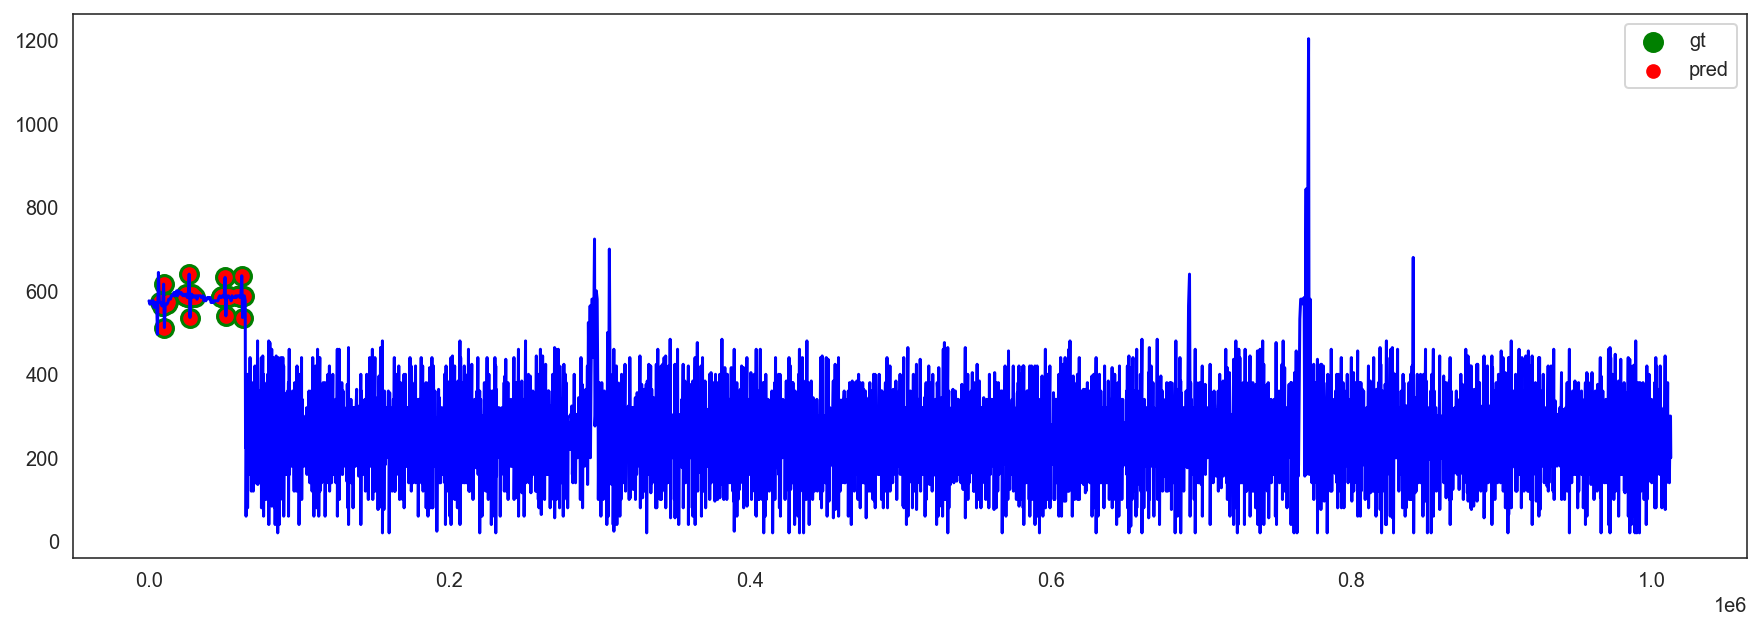

168
984 984 984
(1000,) (984, 677) (1000,) (1000,) (984,)


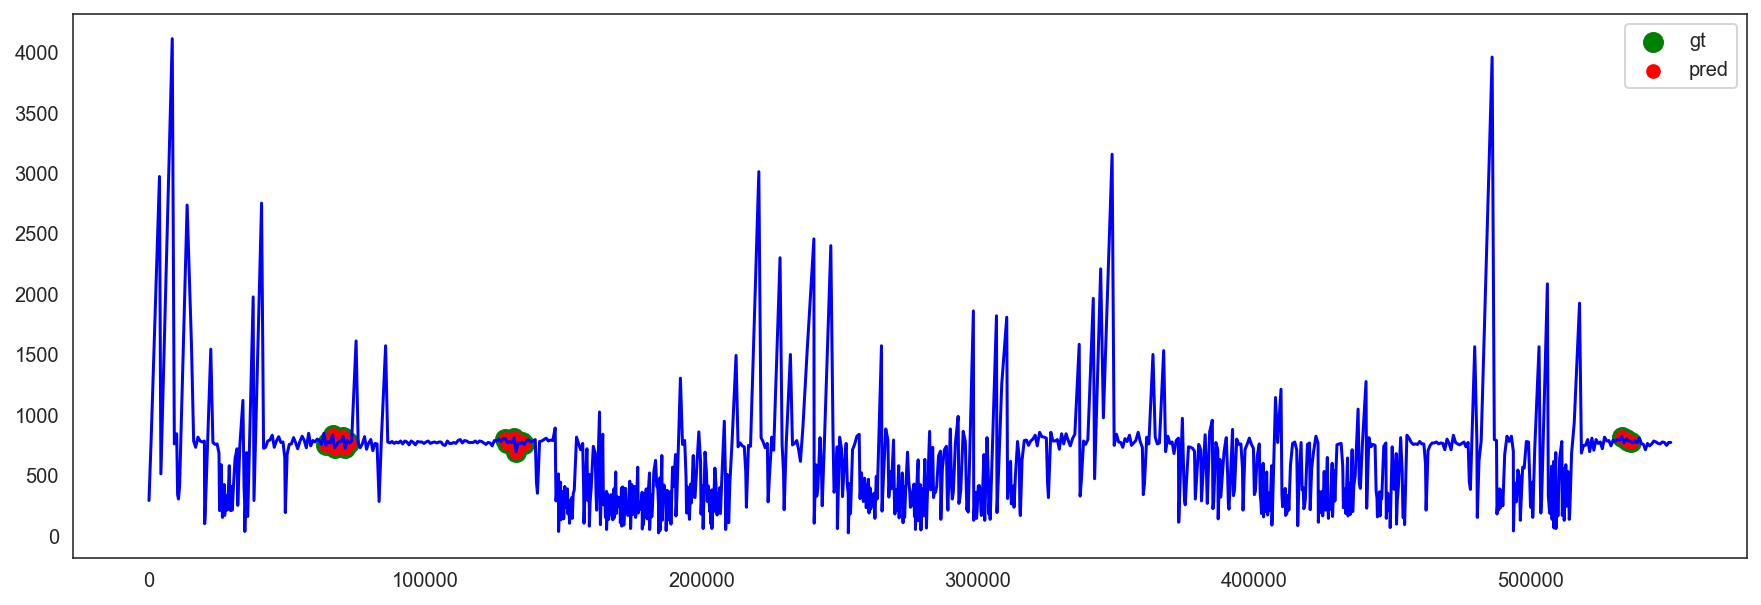

243
766 766 766
(782,) (766, 677) (782,) (782,) (766,)


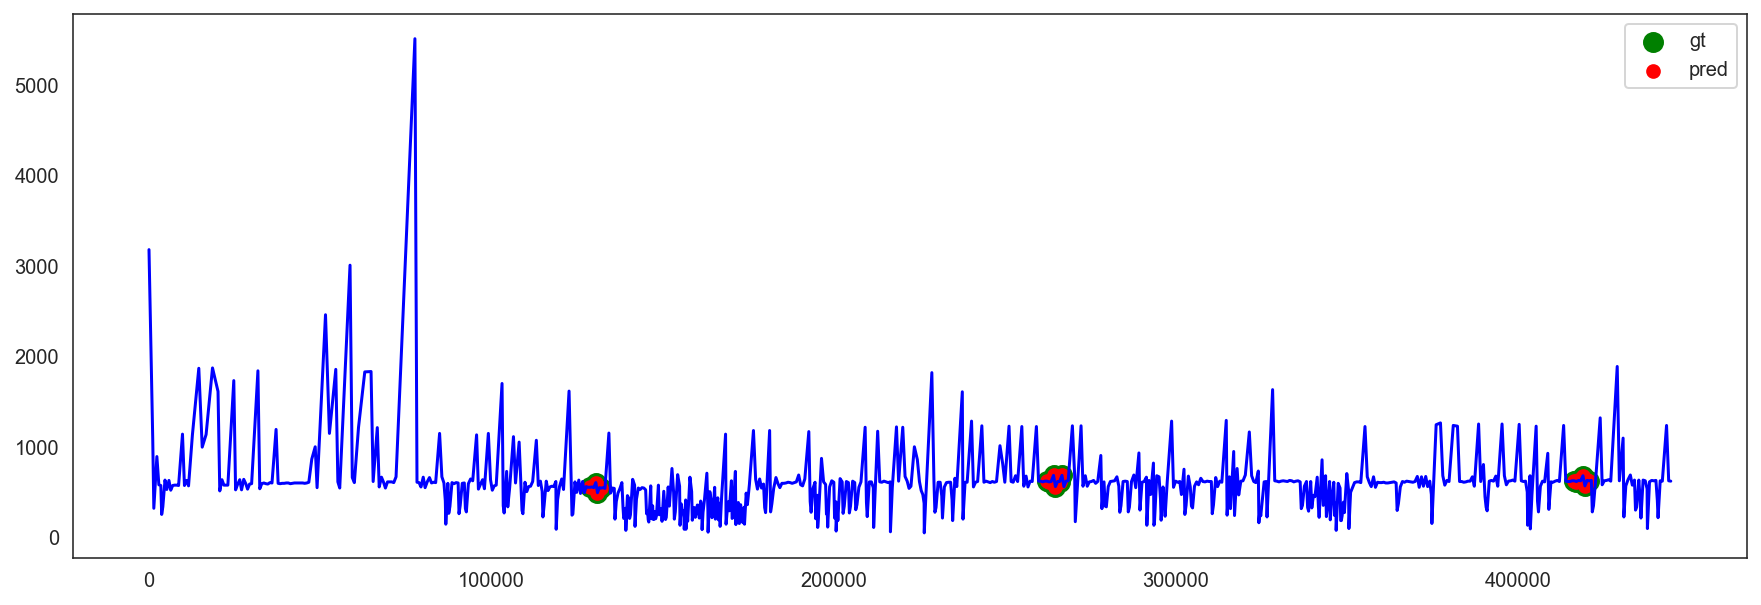

135
1191 1191 1191
(1207,) (1191, 677) (1207,) (1207,) (1191,)


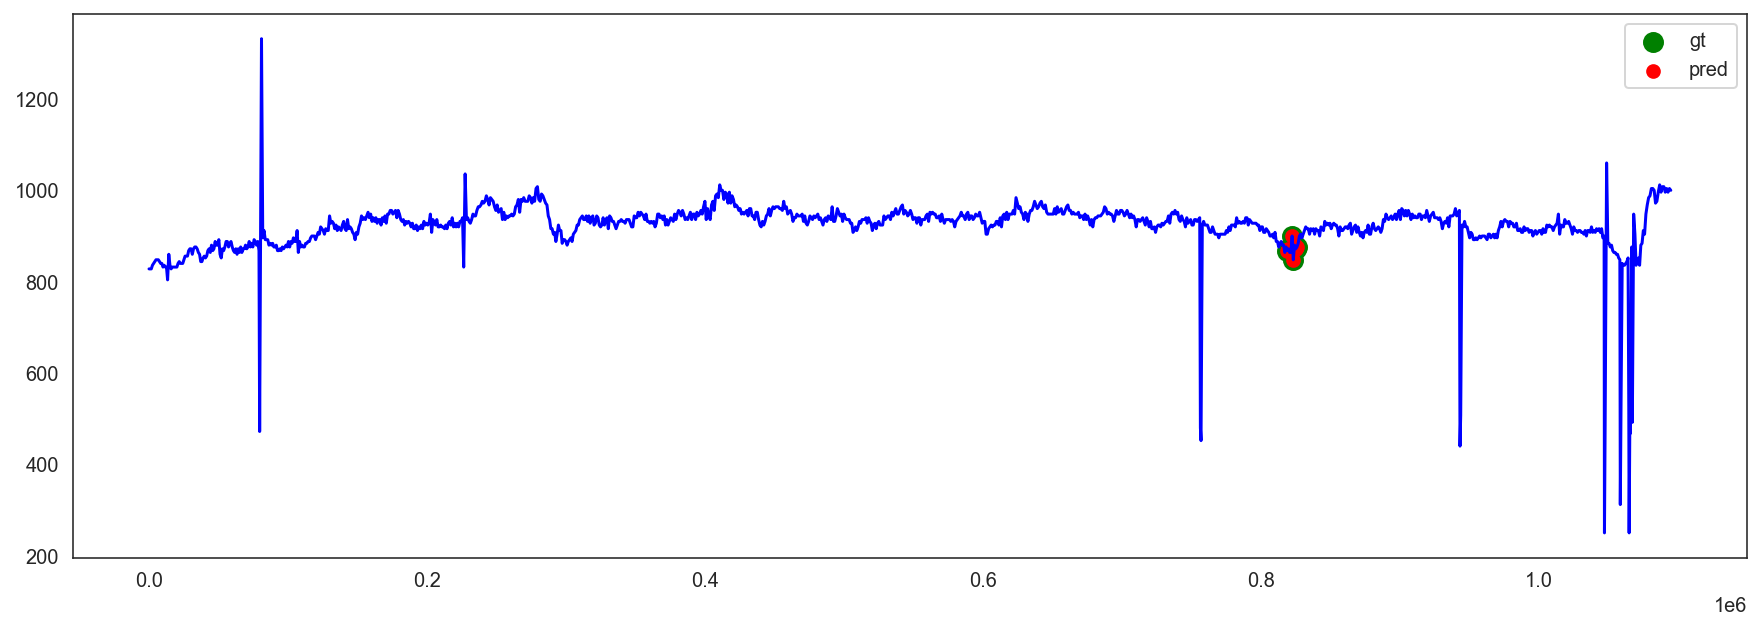

9
565 565 565
(581,) (565, 677) (581,) (581,) (565,)


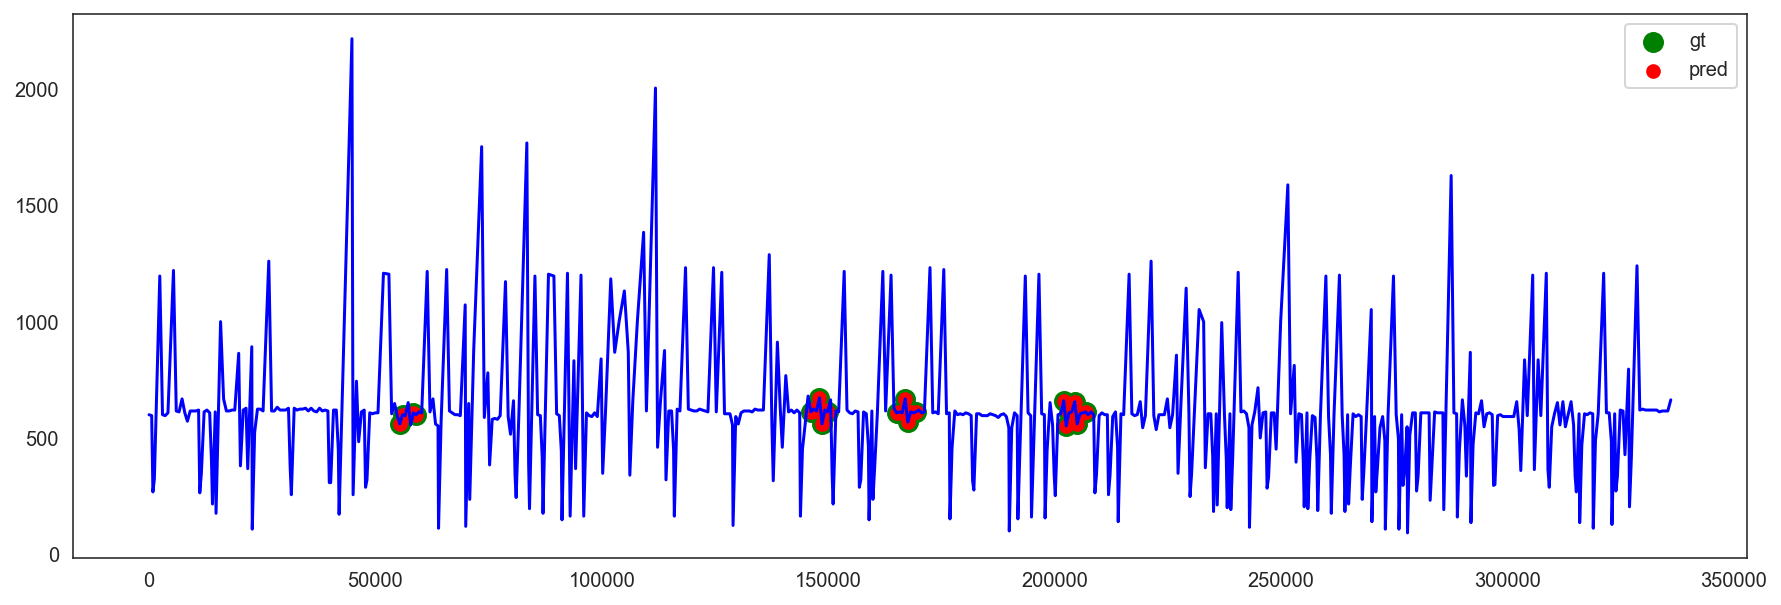

11
642 642 642
(658,) (642, 677) (658,) (658,) (642,)


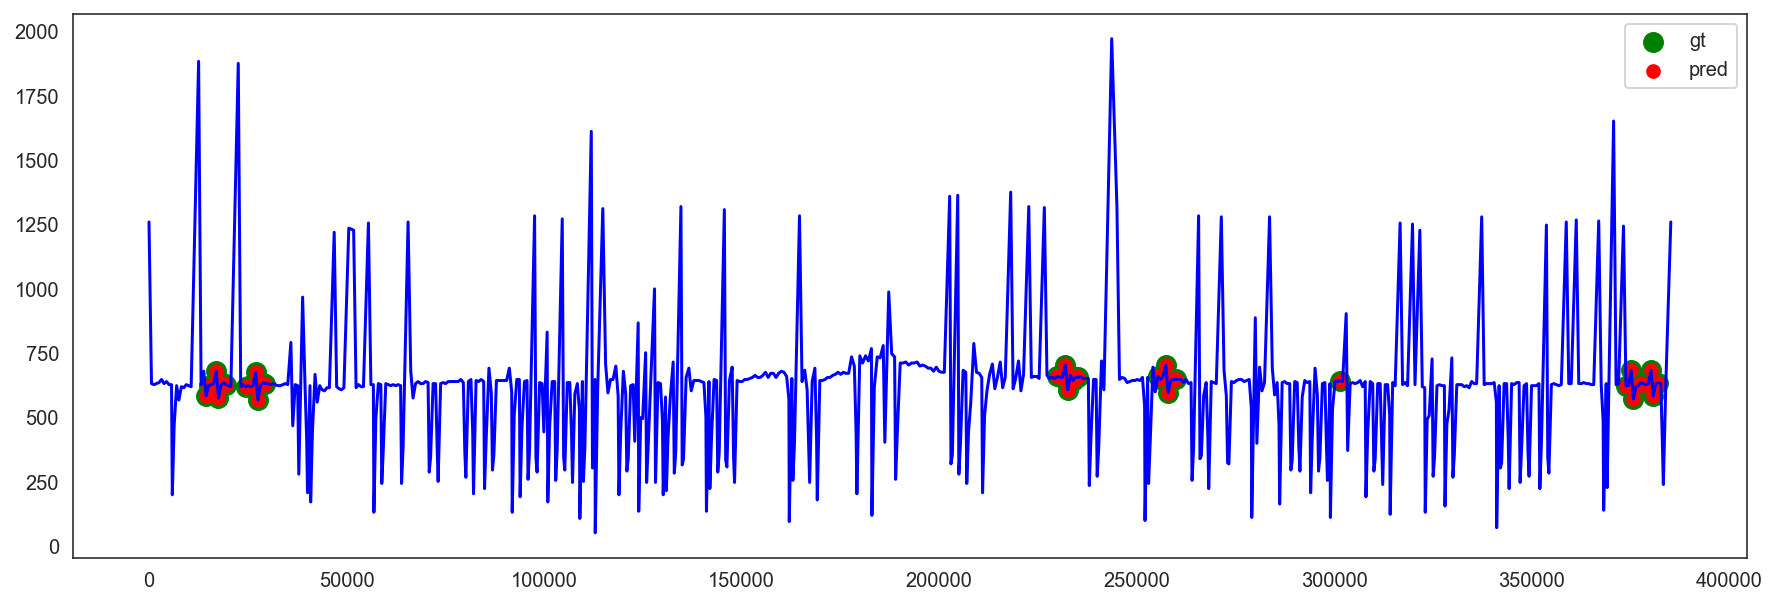

157
432 432 432
(448,) (432, 677) (448,) (448,) (432,)


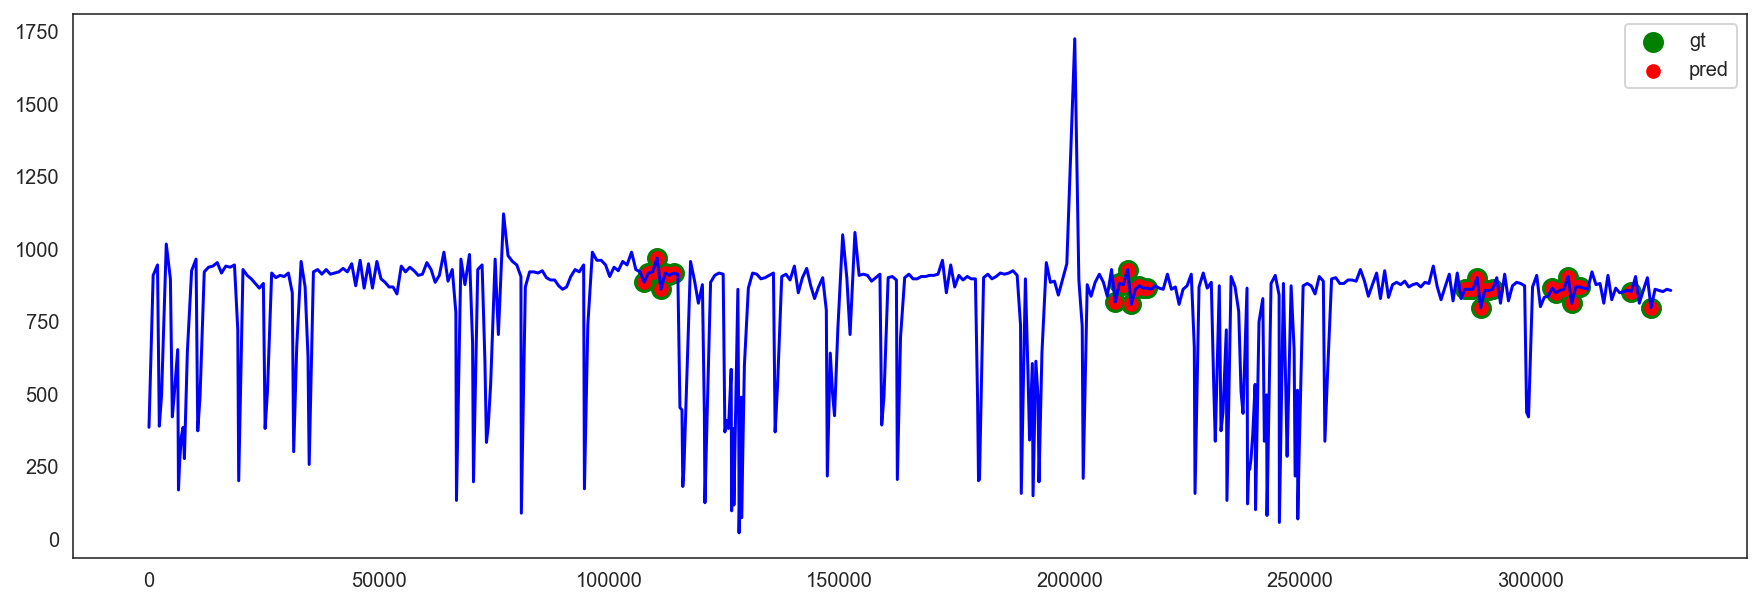

212
90 90 90
(106,) (90, 677) (106,) (106,) (90,)


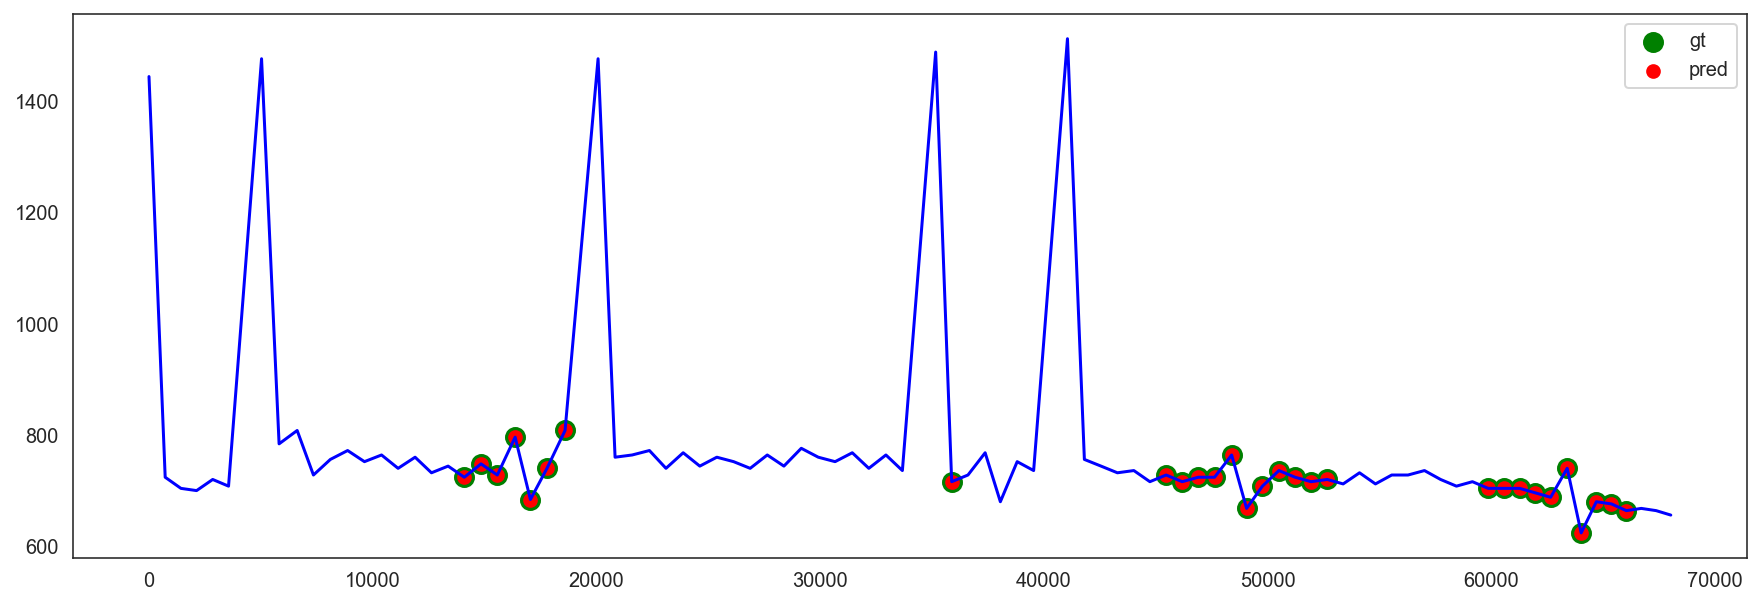

166
1206 1206 1206
(1222,) (1206, 677) (1222,) (1222,) (1206,)


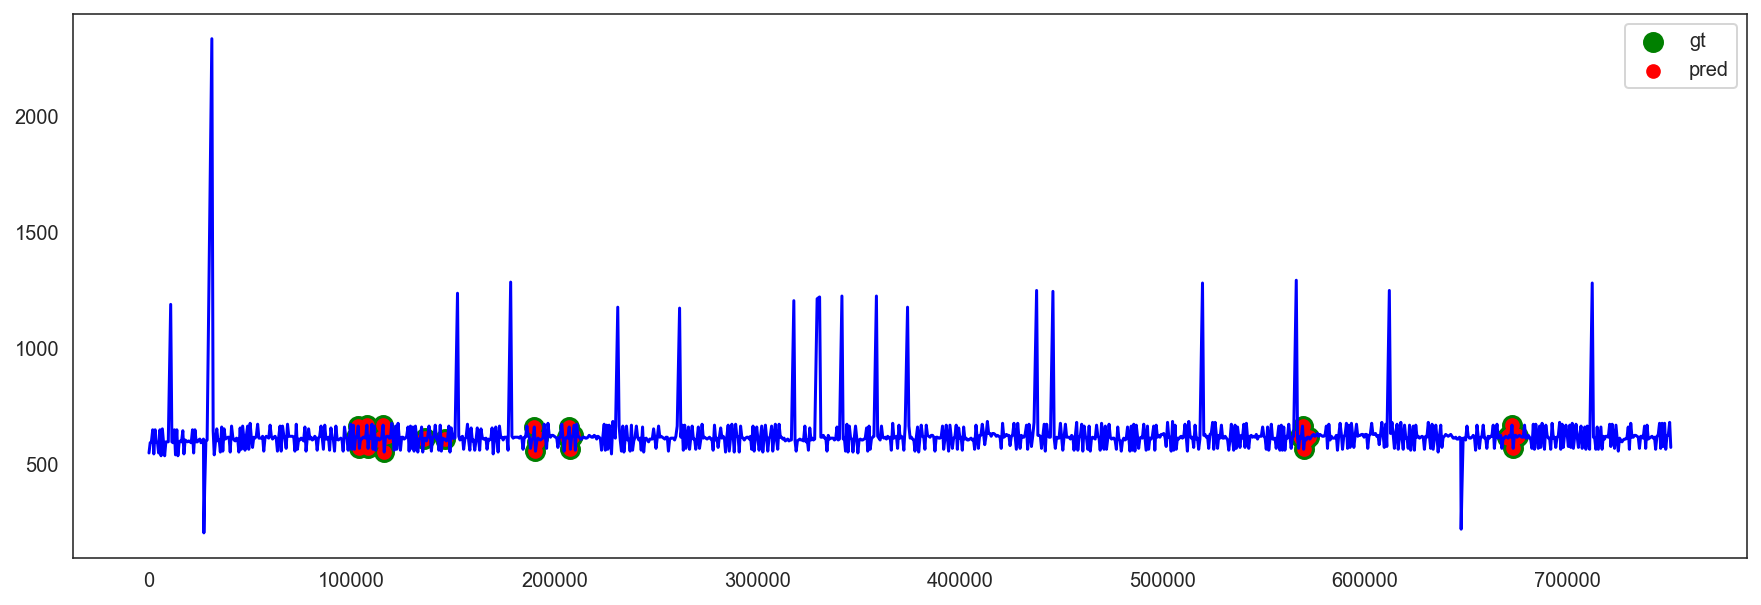

154
220 220 220
(236,) (220, 677) (236,) (236,) (220,)


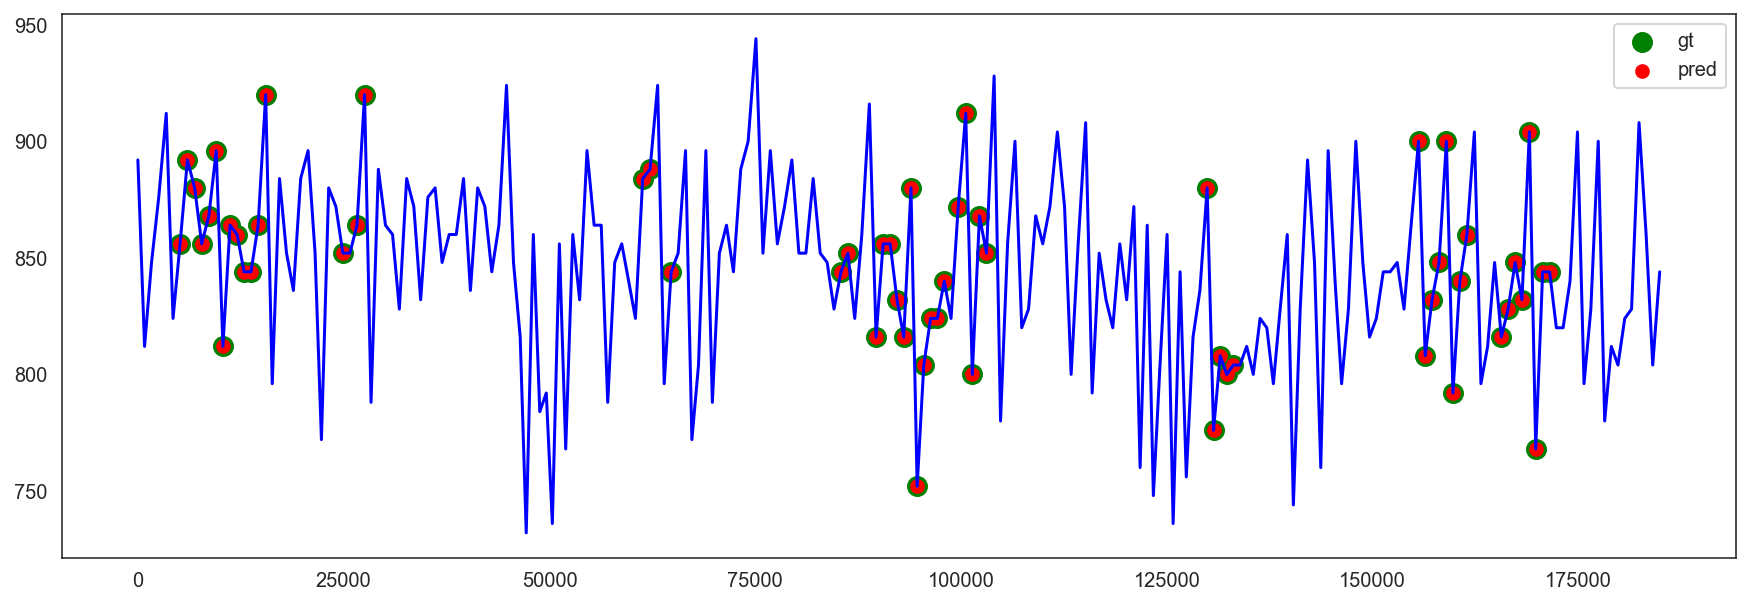

227
363 363 363
(379,) (363, 677) (379,) (379,) (363,)


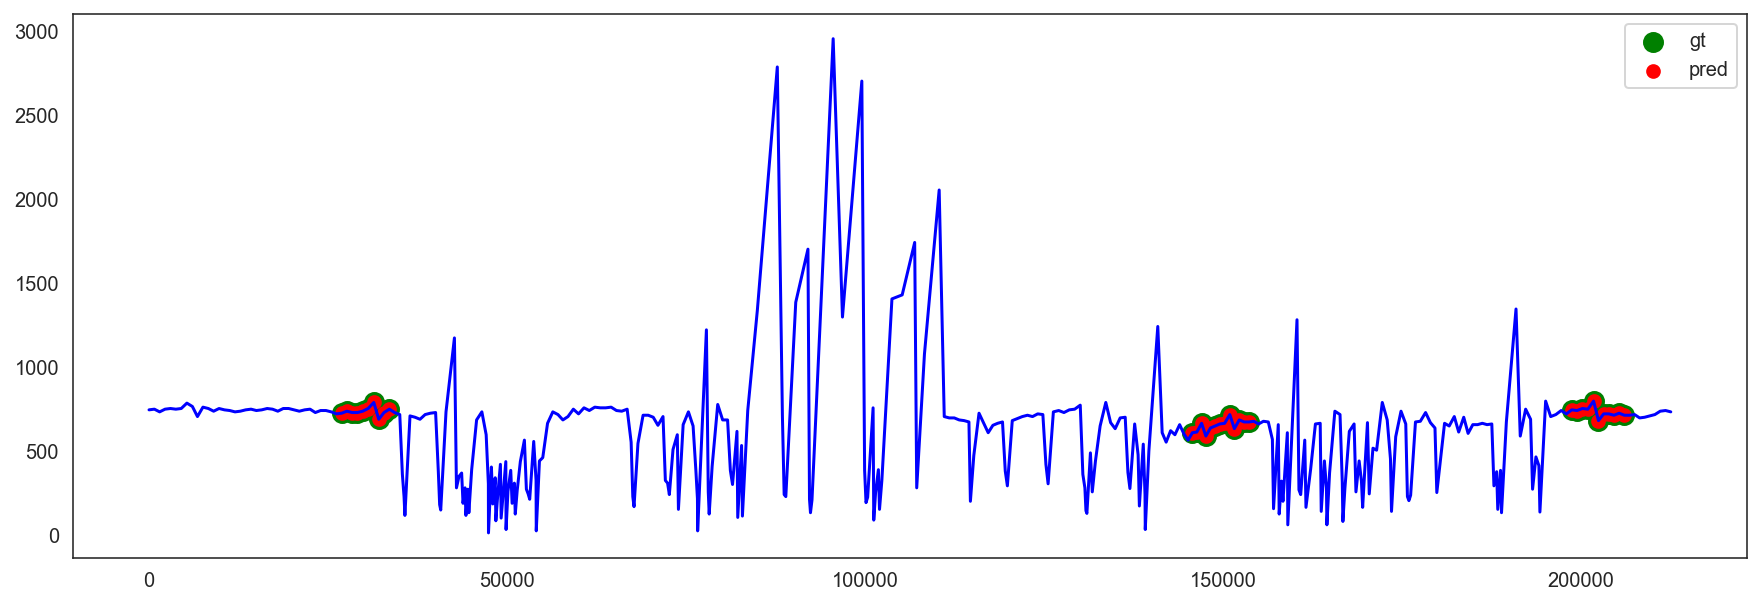

165
463 463 463
(479,) (463, 677) (479,) (479,) (463,)


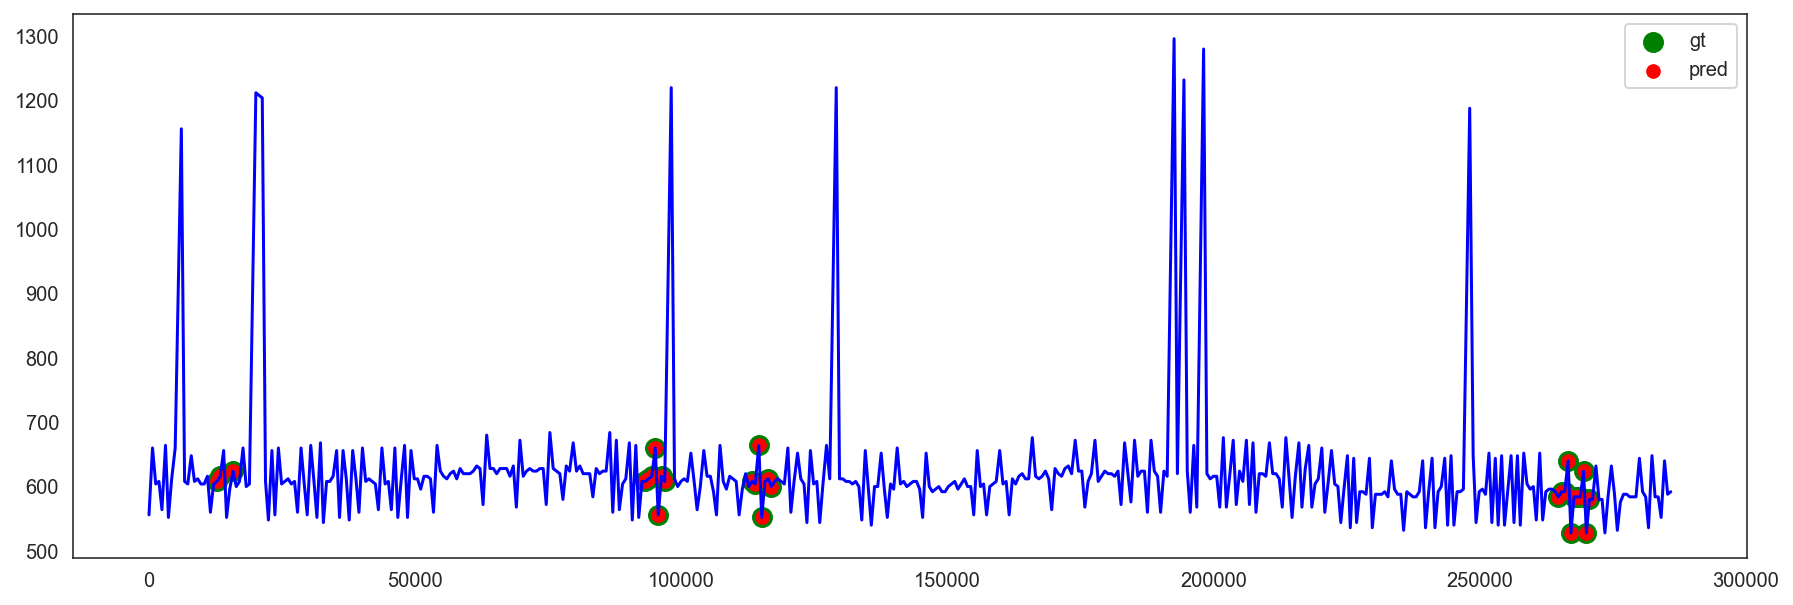

37
143 143 143
(159,) (143, 677) (159,) (159,) (143,)


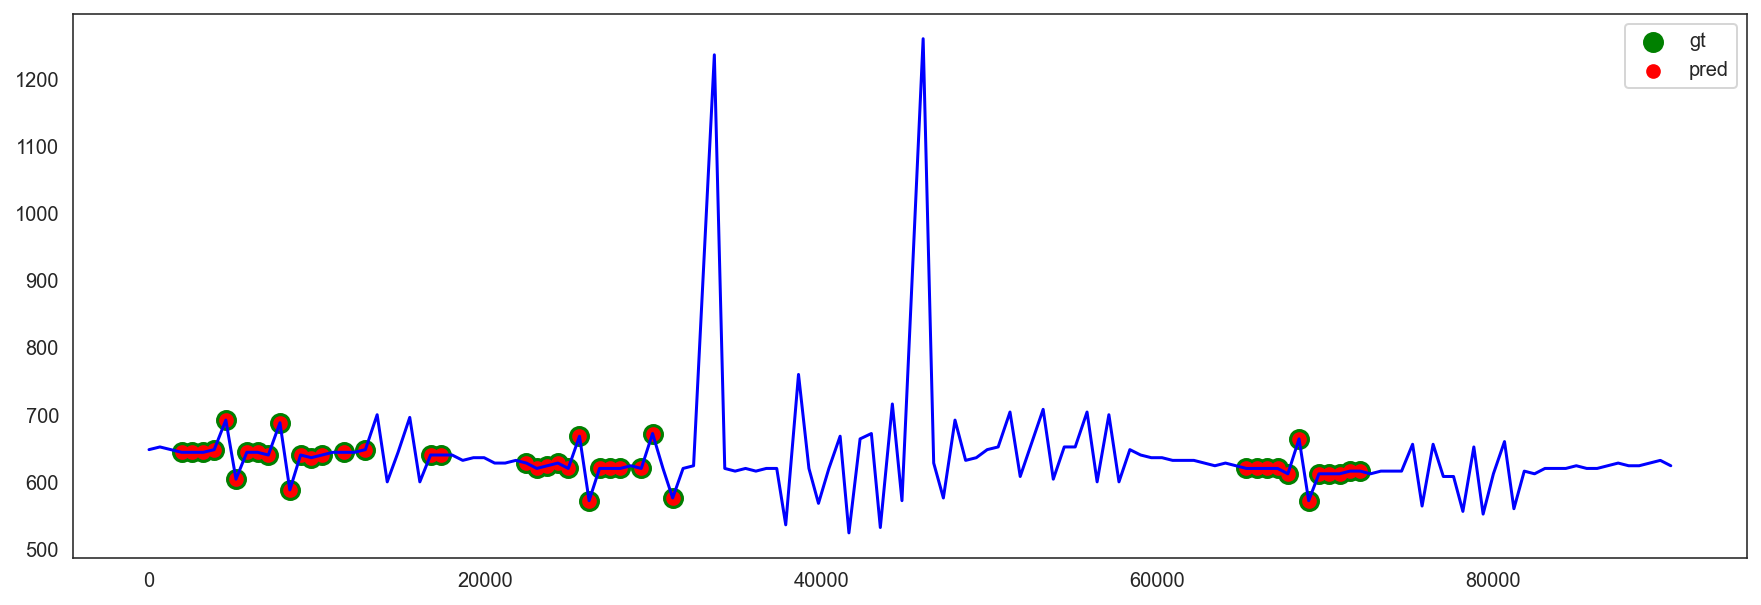

274
158 158 158
(174,) (158, 677) (174,) (174,) (158,)


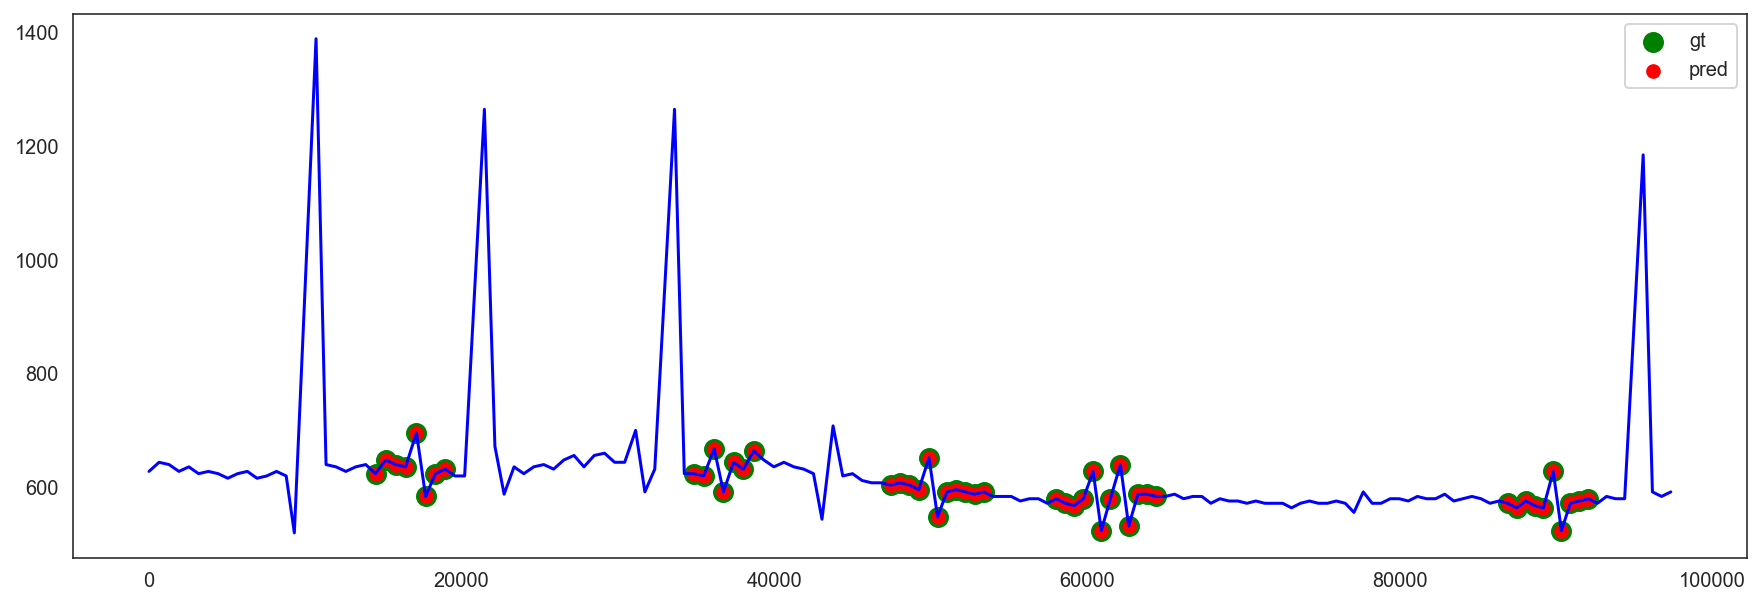

211
240 240 240
(256,) (240, 677) (256,) (256,) (240,)


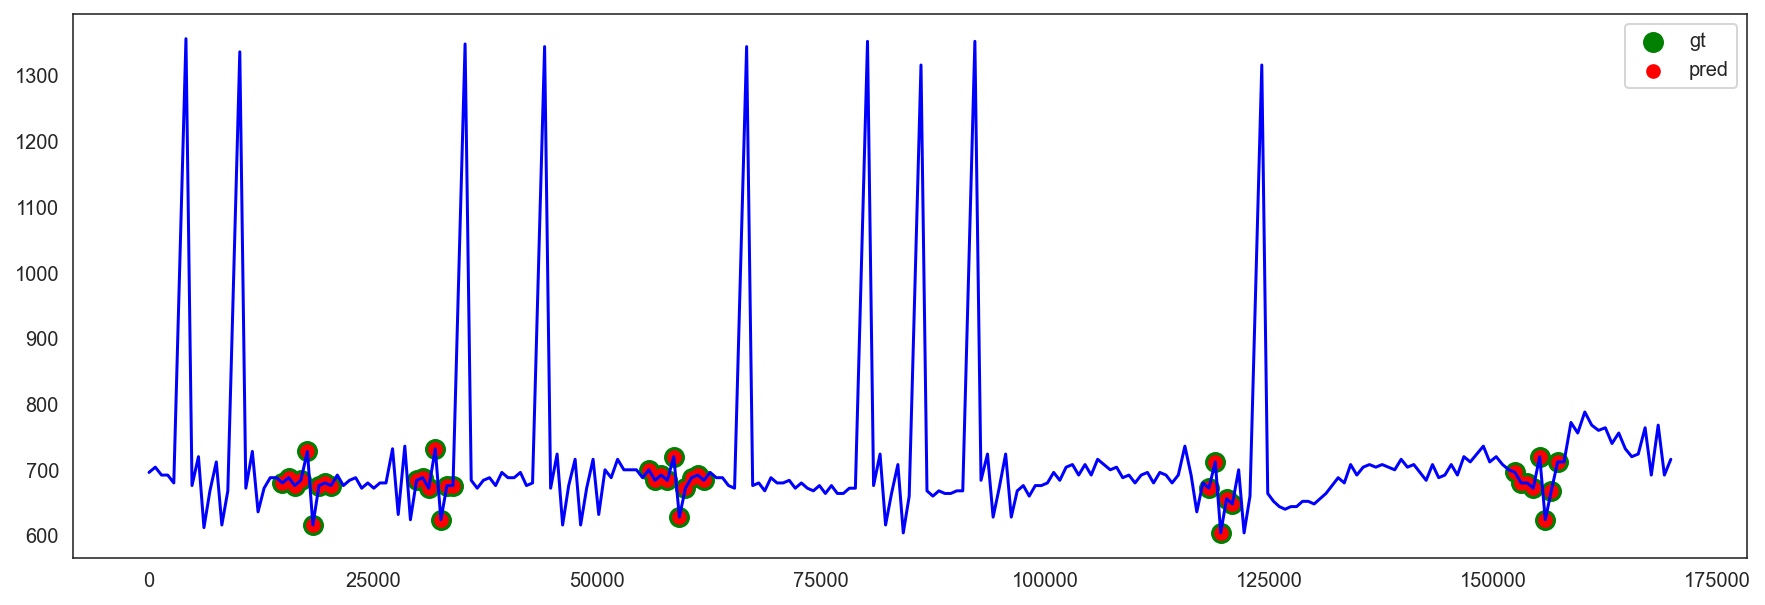

200
121 121 121
(137,) (121, 677) (137,) (137,) (121,)


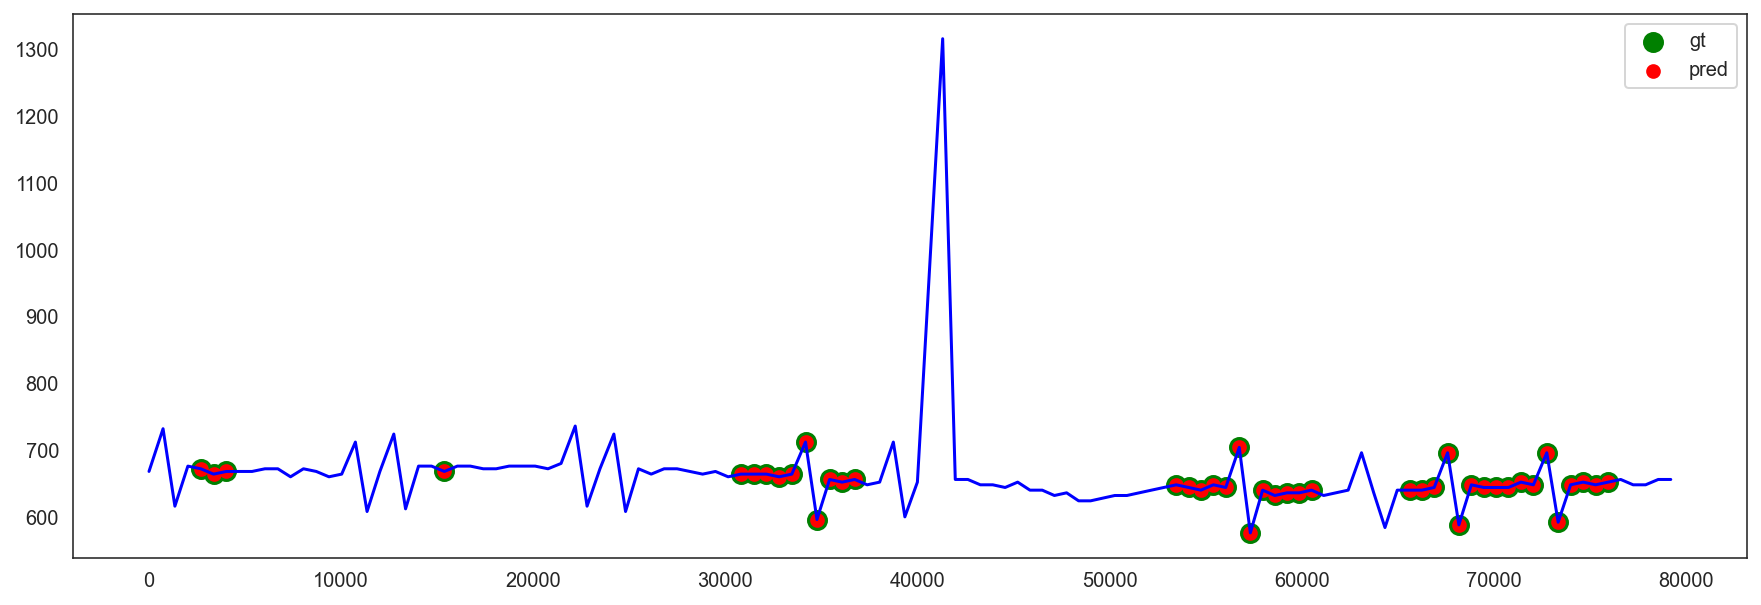

183
148 148 148
(164,) (148, 677) (164,) (164,) (148,)


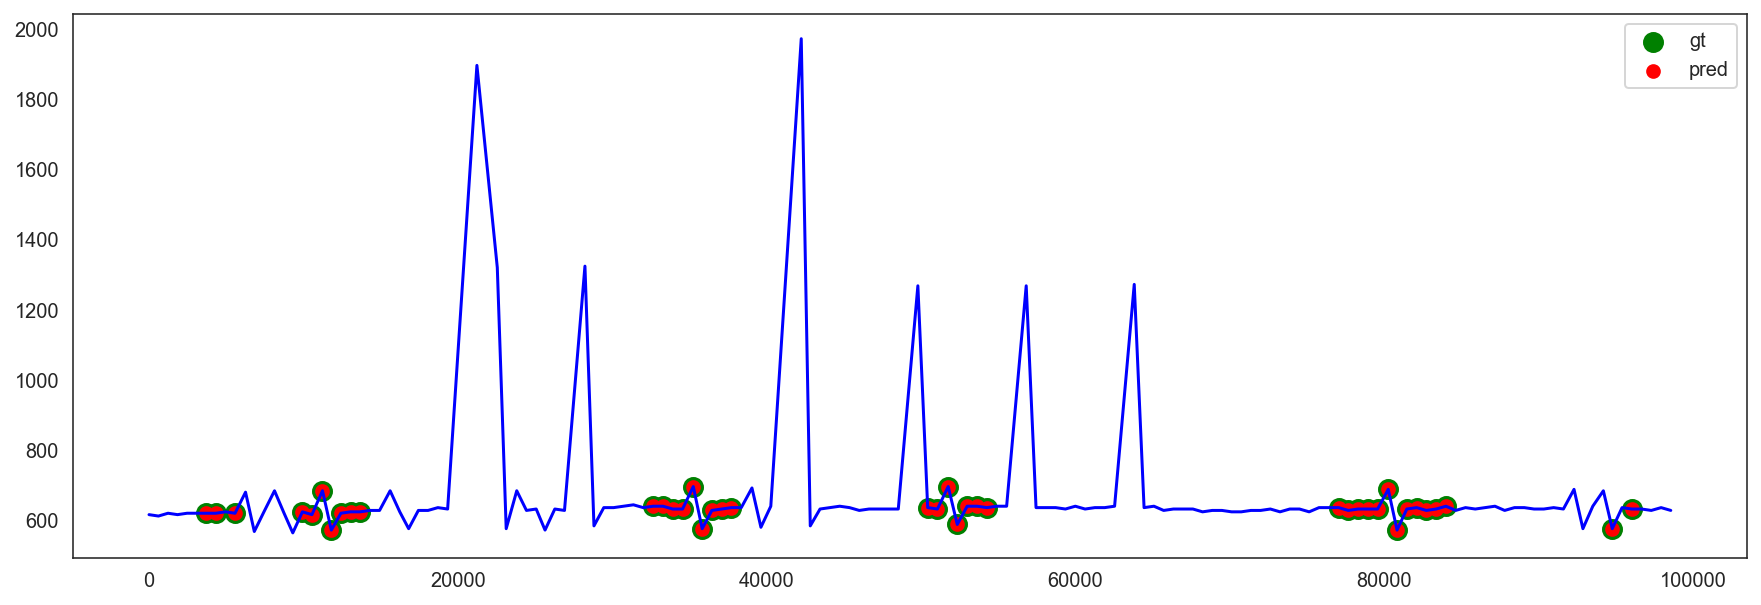

26
296 296 296
(312,) (296, 677) (312,) (312,) (296,)


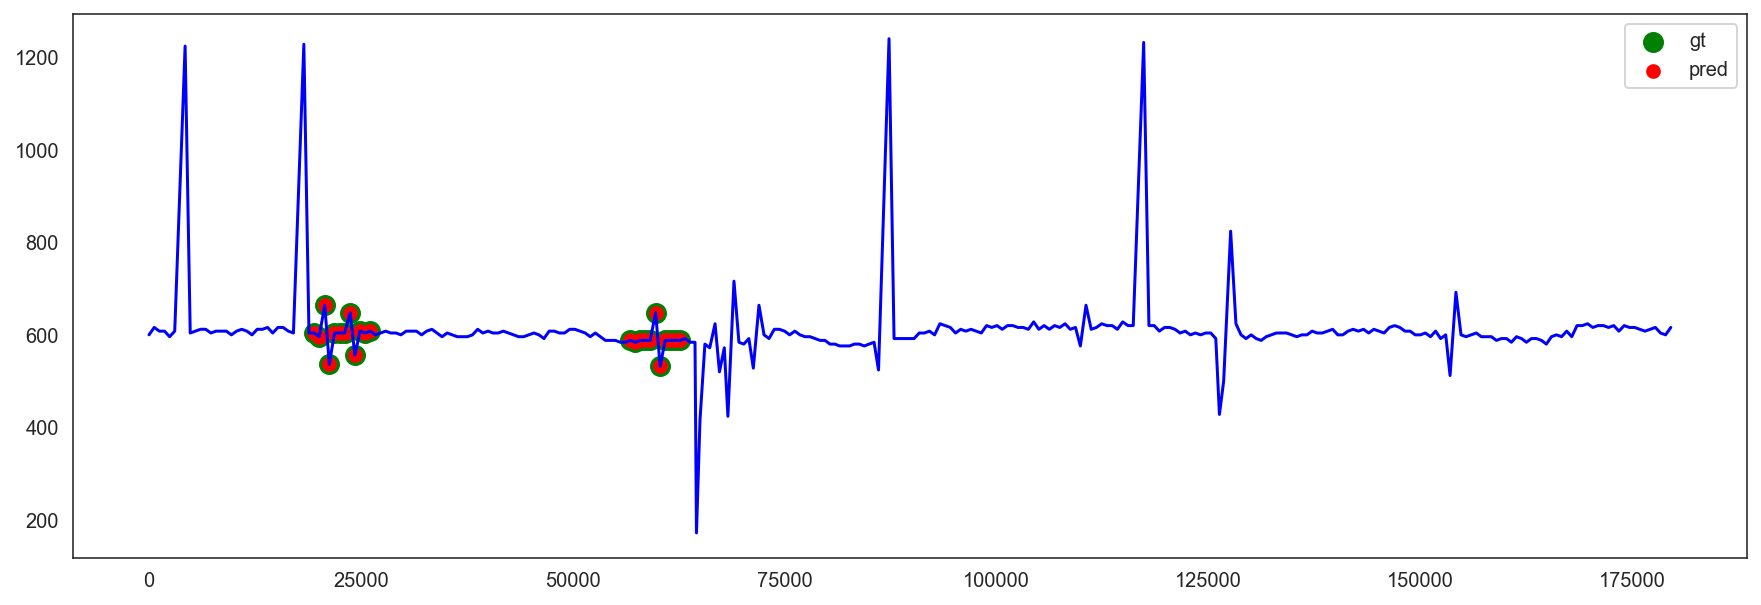

175
135 135 135
(151,) (135, 677) (151,) (151,) (135,)


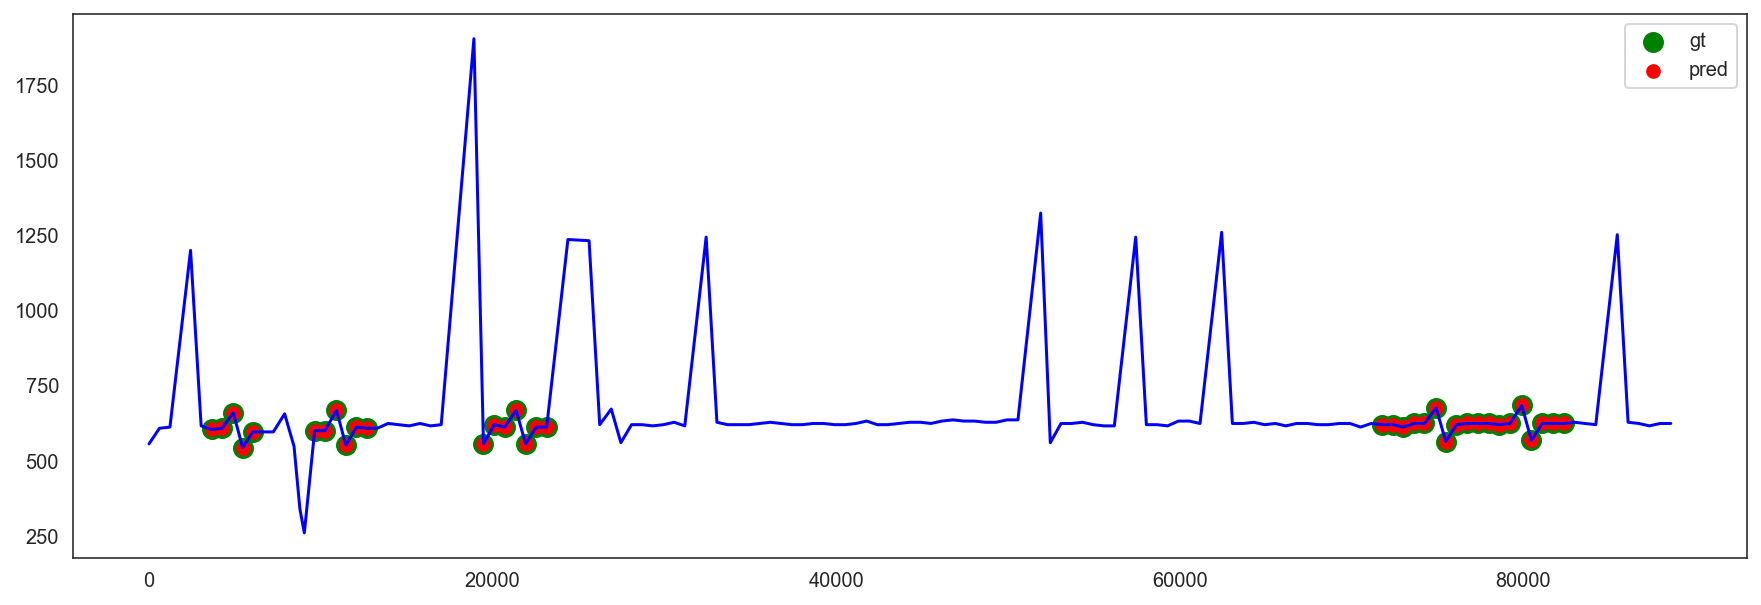

50
89 89 89
(105,) (89, 677) (105,) (105,) (89,)


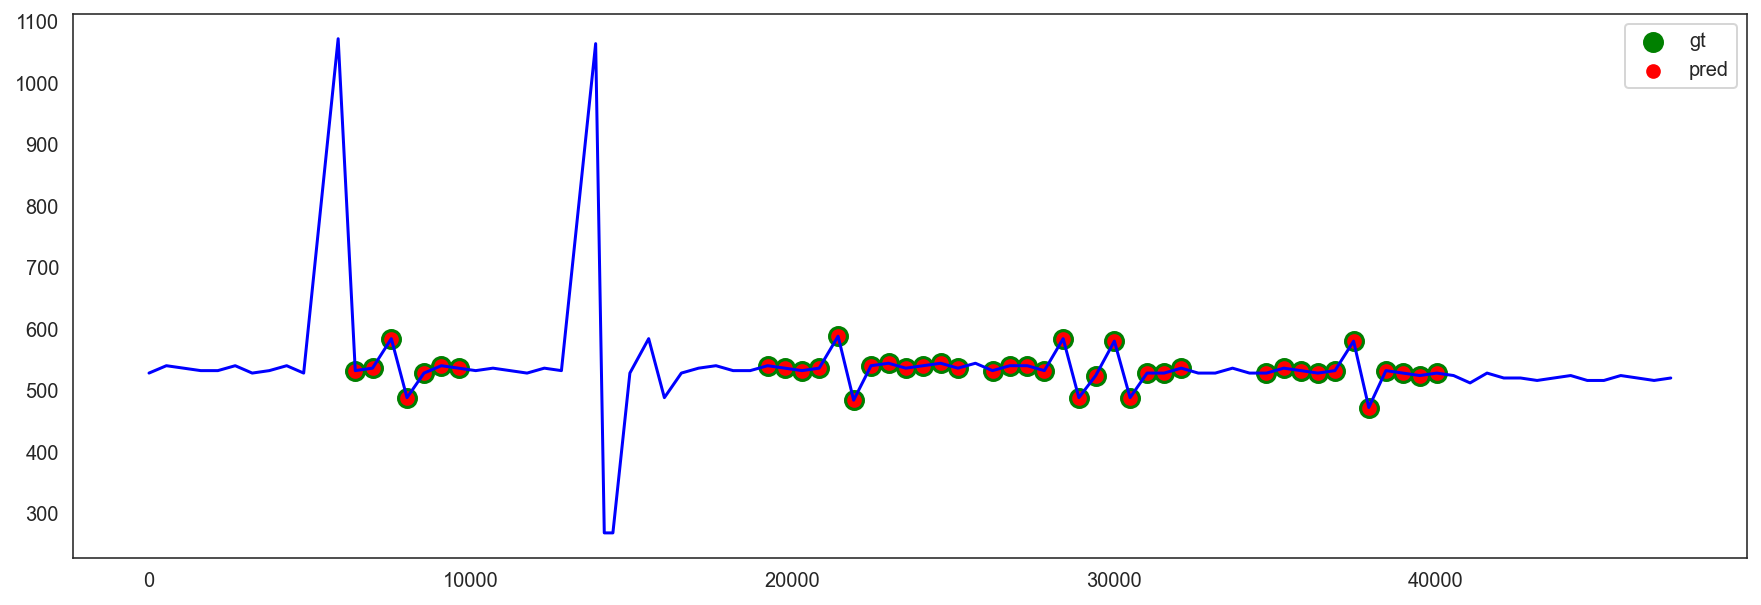

141
70 70 70
(86,) (70, 677) (86,) (86,) (70,)


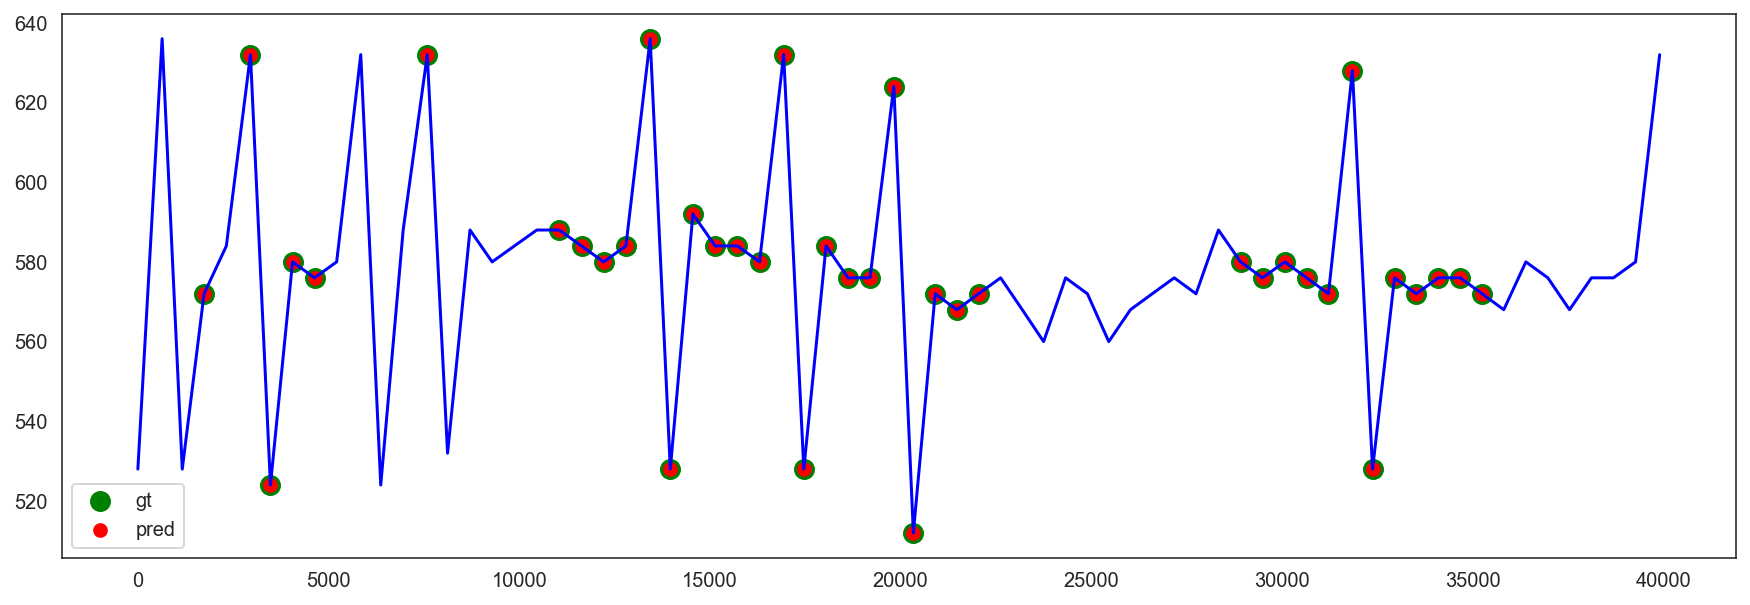

198
98 98 98
(114,) (98, 677) (114,) (114,) (98,)


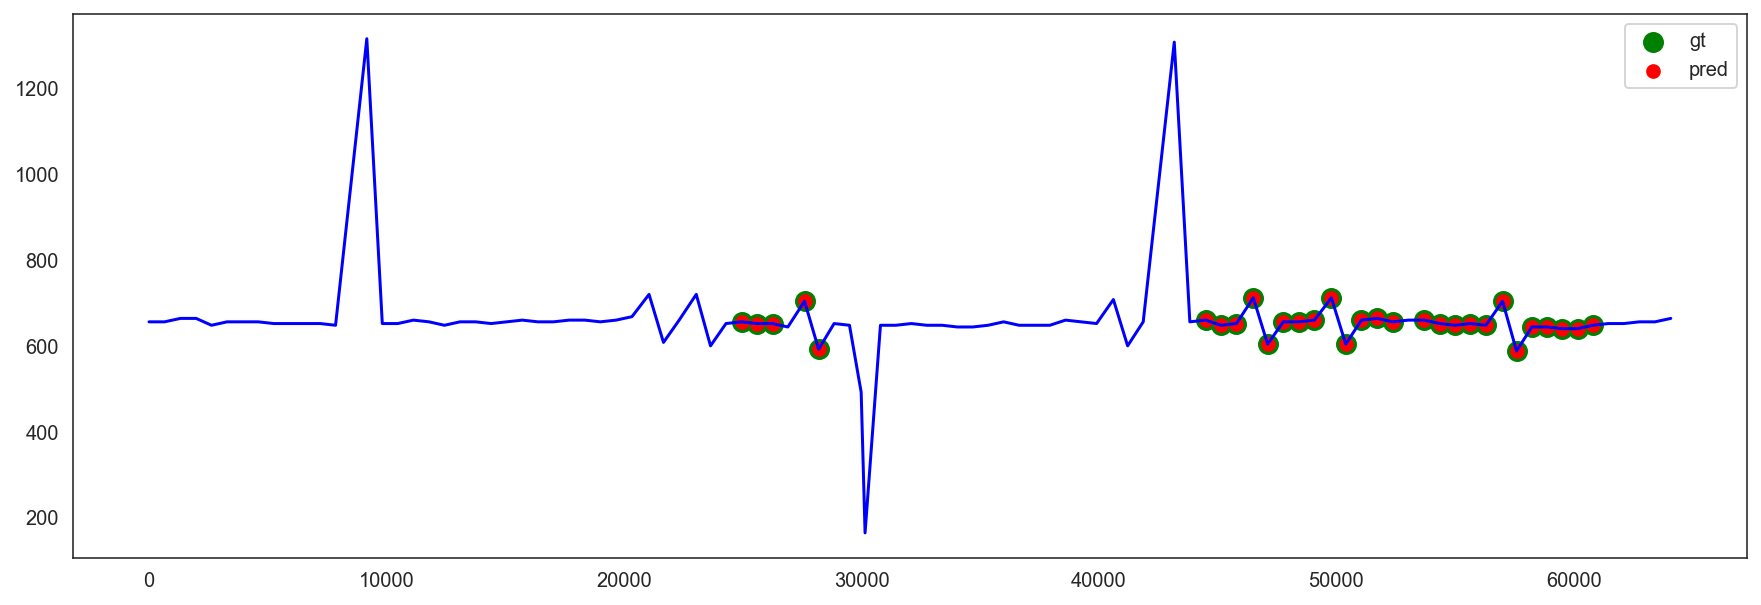

114
107 107 107
(123,) (107, 677) (123,) (123,) (107,)


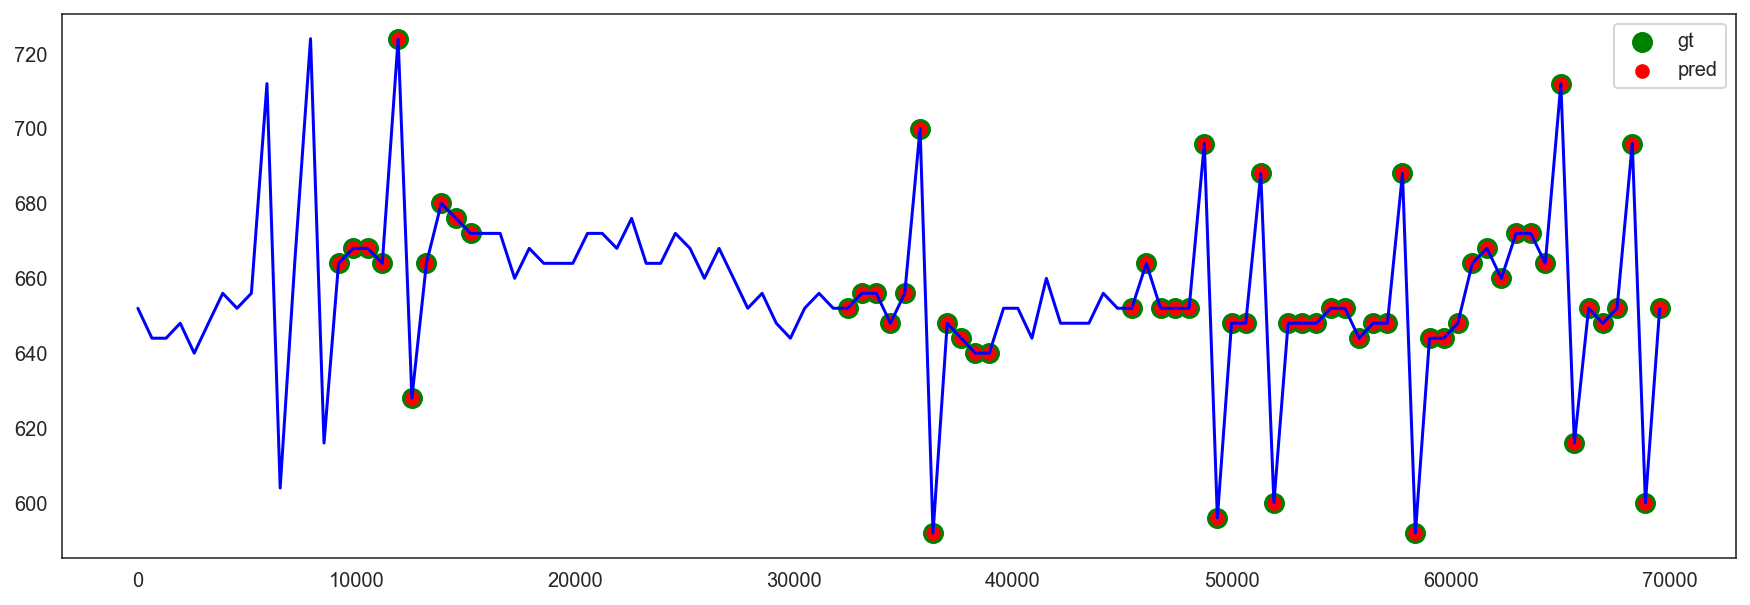

181
115 115 115
(131,) (115, 677) (131,) (131,) (115,)


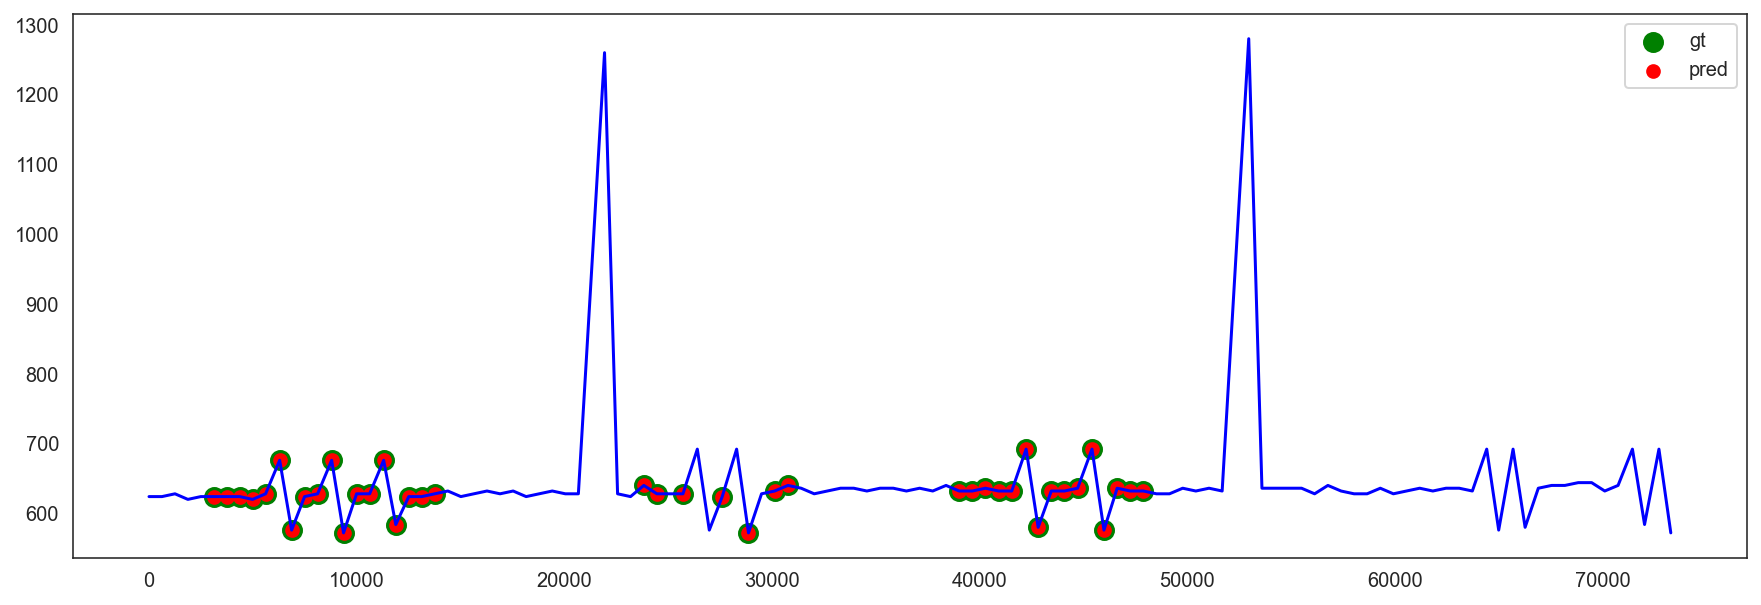

171
132 132 132
(148,) (132, 677) (148,) (148,) (132,)


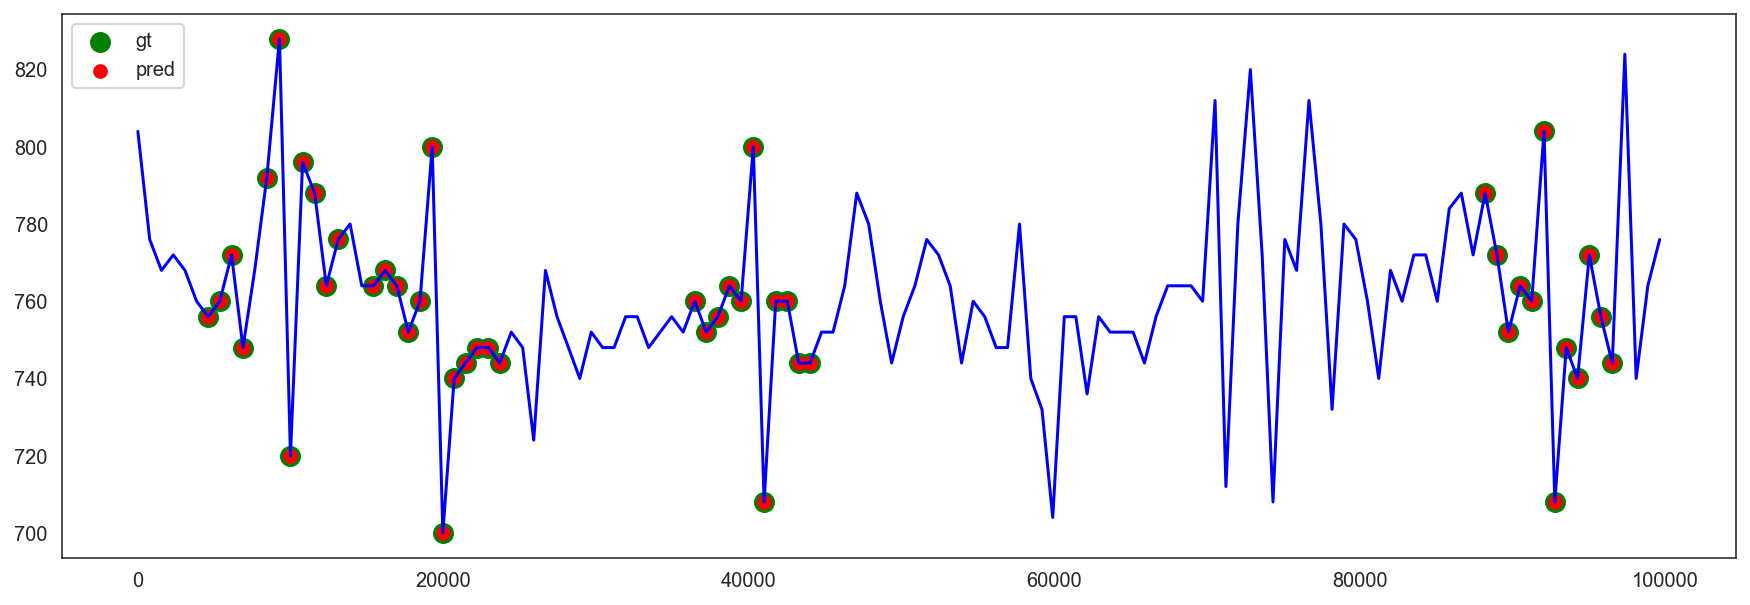

83
107 107 107
(123,) (107, 677) (123,) (123,) (107,)


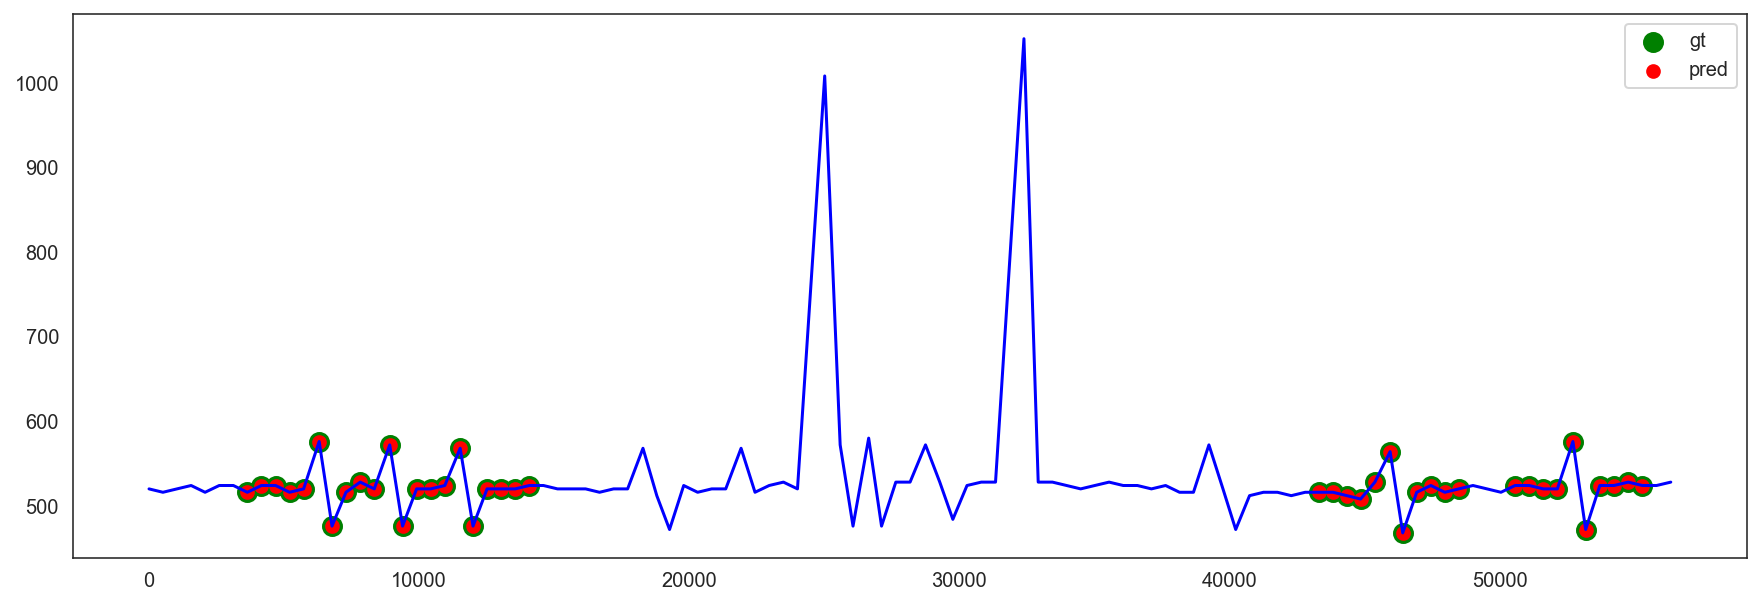

8
199 199 199
(215,) (199, 677) (215,) (215,) (199,)


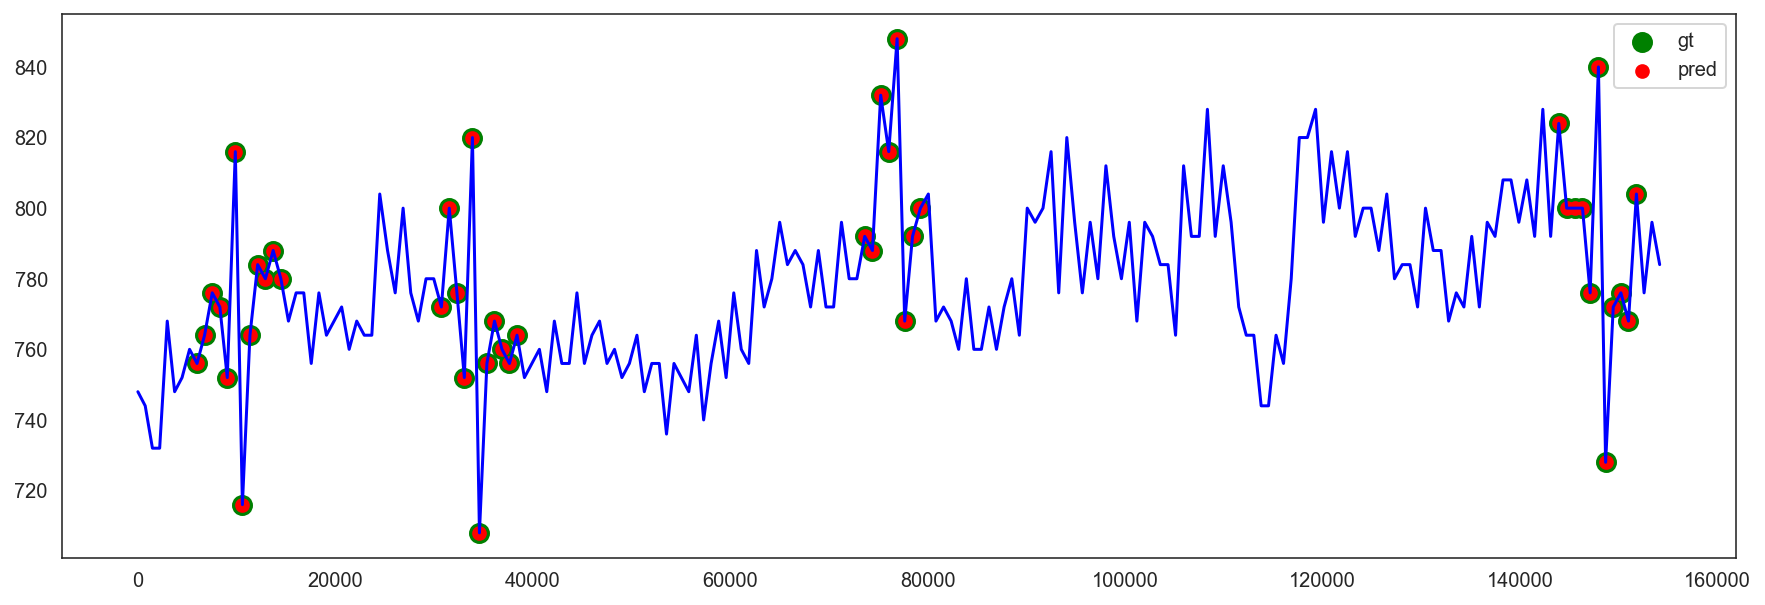

256
104 104 104
(120,) (104, 677) (120,) (120,) (104,)


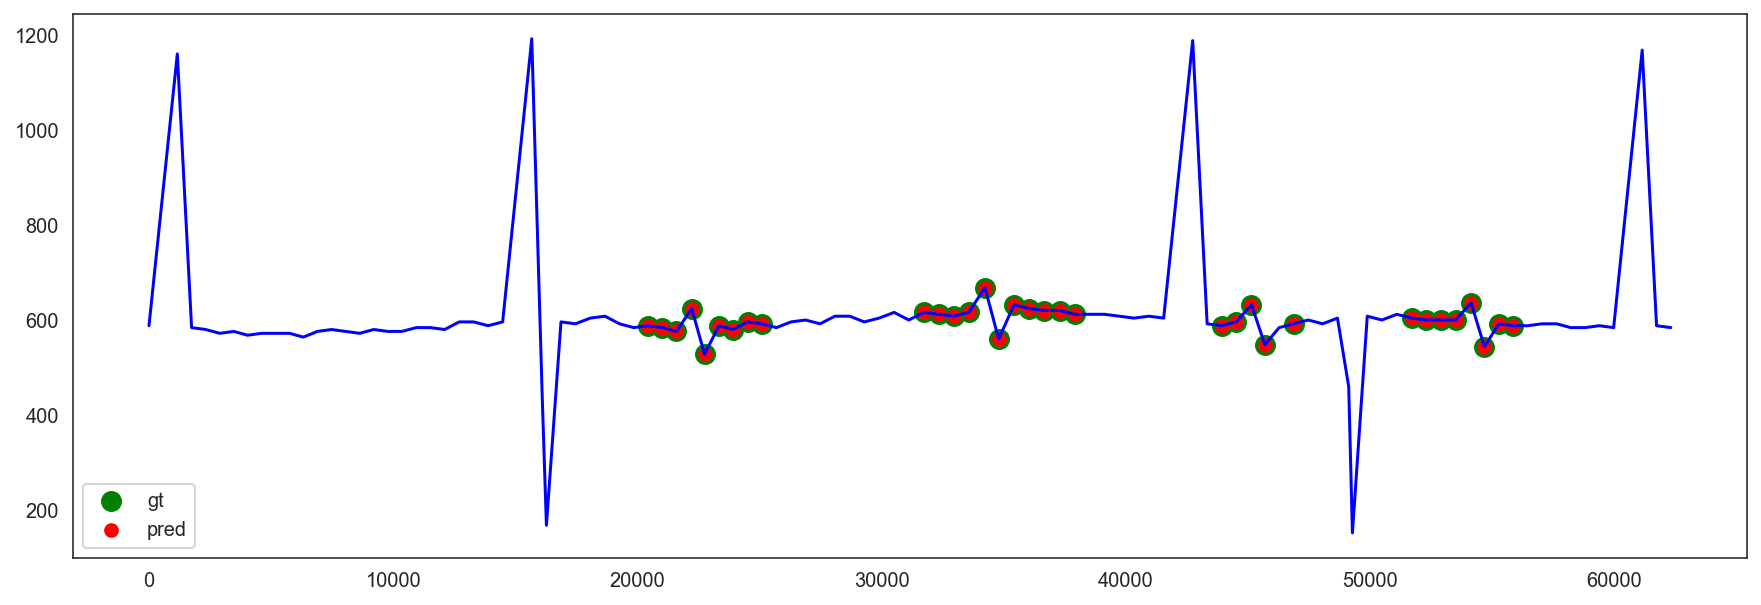

249
104 104 104
(120,) (104, 677) (120,) (120,) (104,)


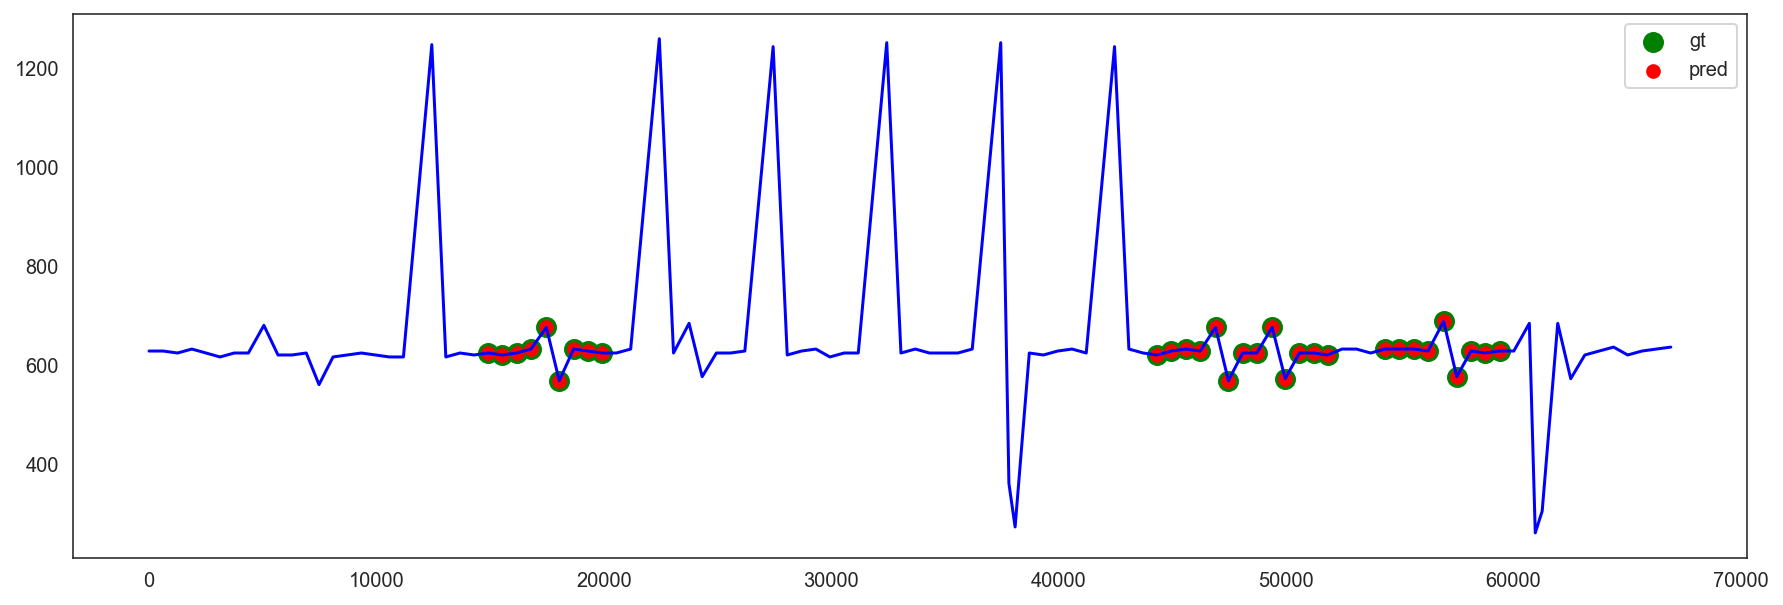

142
178 178 178
(194,) (178, 677) (194,) (194,) (178,)


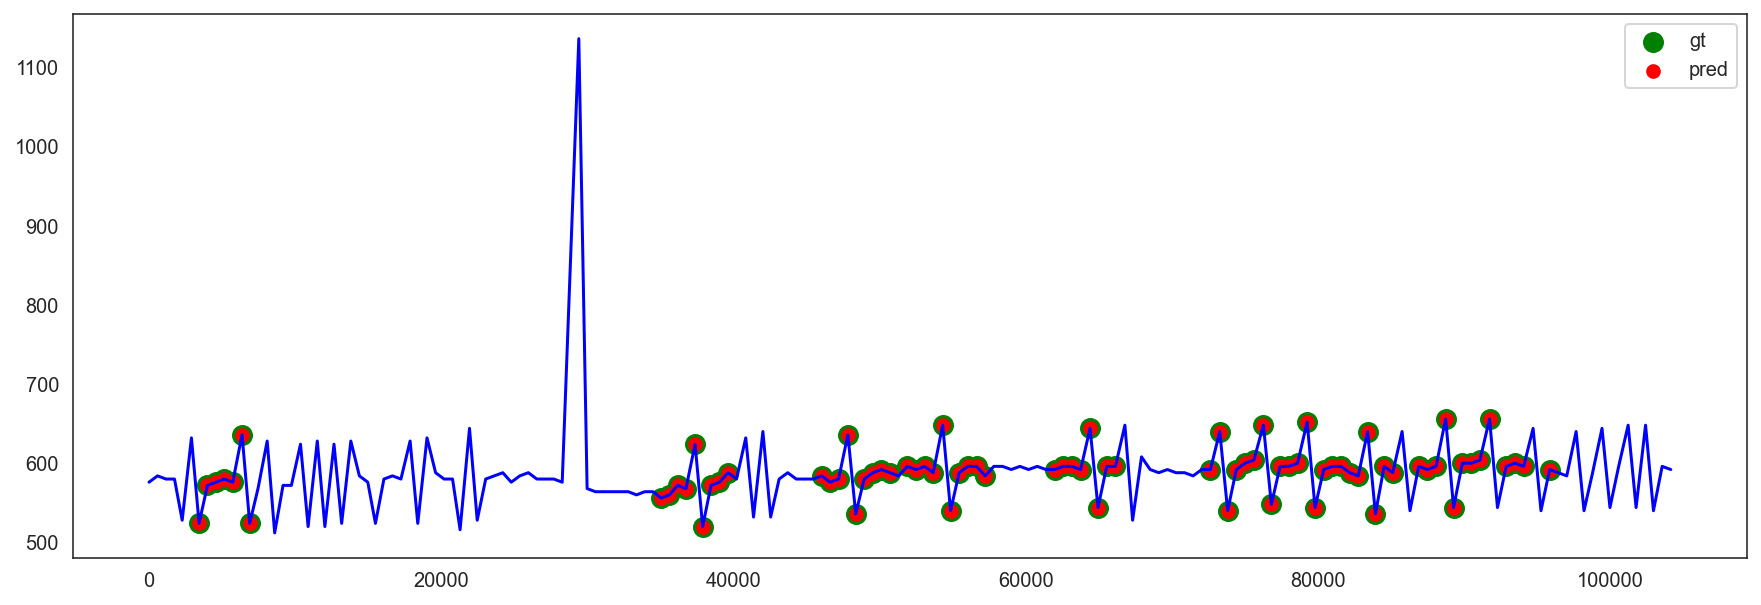

210
185 185 185
(201,) (185, 677) (201,) (201,) (185,)


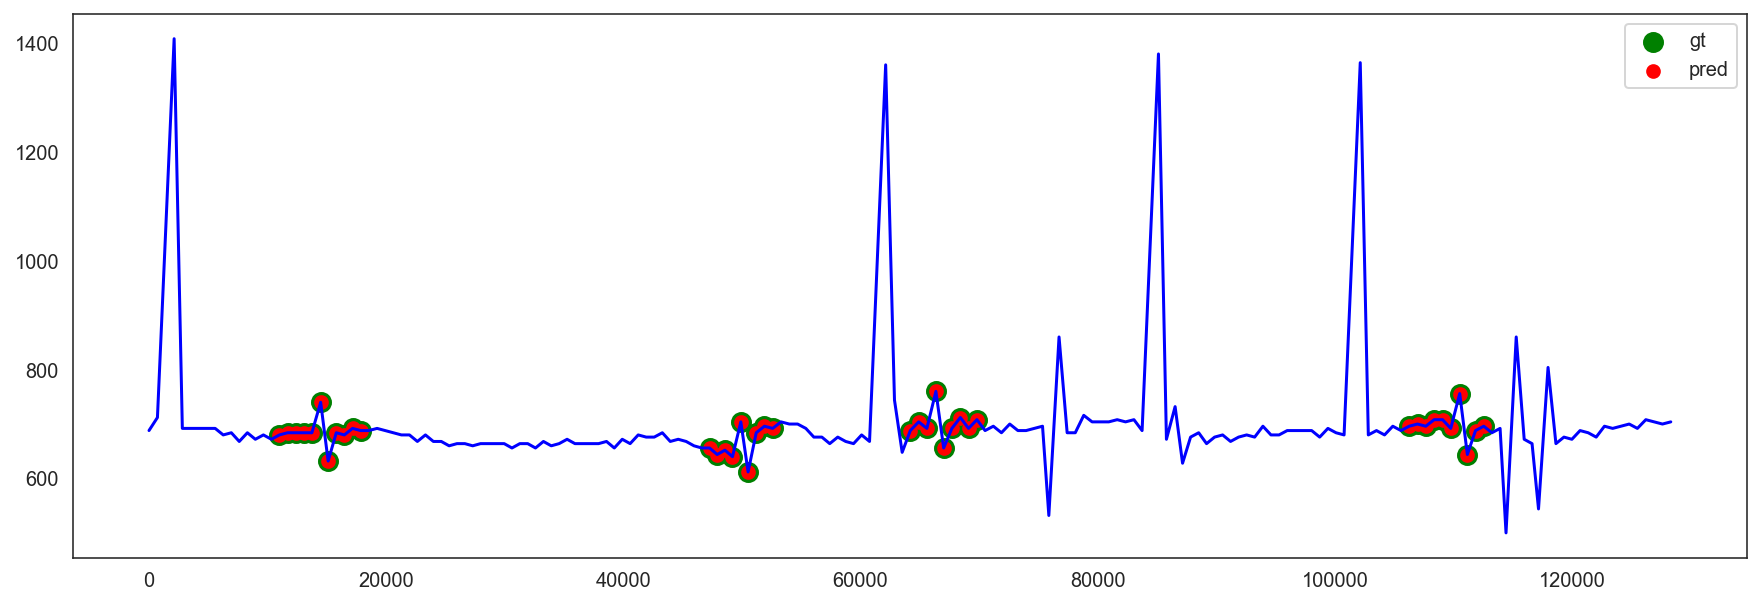

106
57 57 57
(73,) (57, 677) (73,) (73,) (57,)


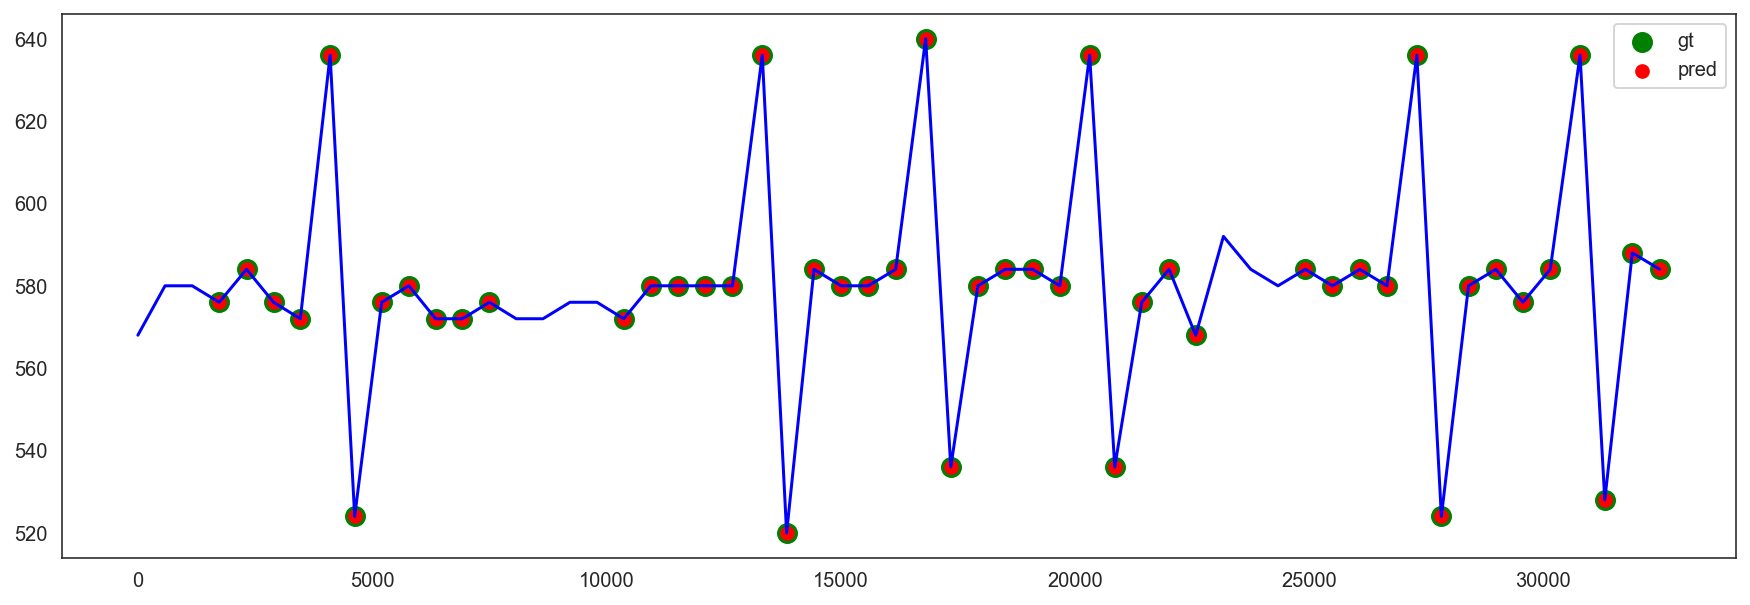

248
156 156 156
(172,) (156, 677) (172,) (172,) (156,)


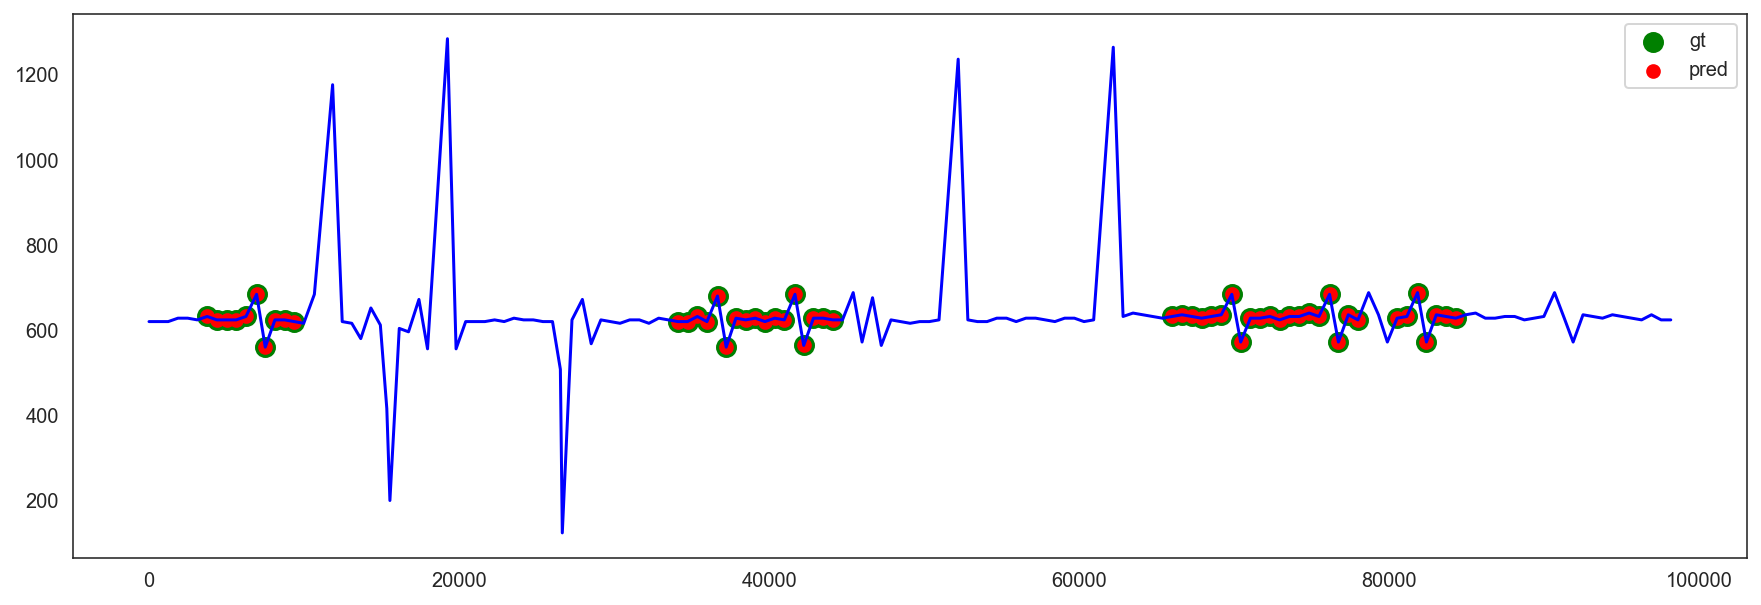

255
76 76 76
(92,) (76, 677) (92,) (92,) (76,)


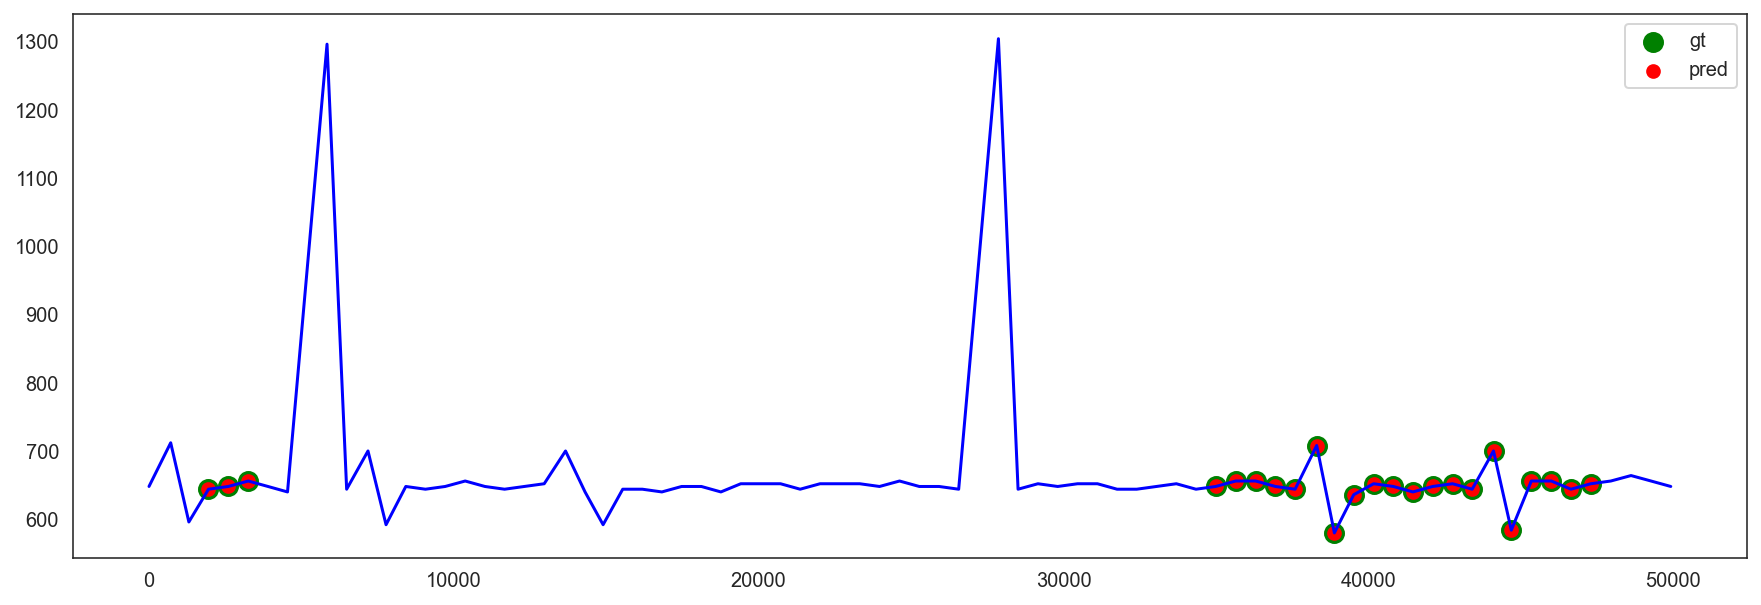

28
140 140 140
(156,) (140, 677) (156,) (156,) (140,)


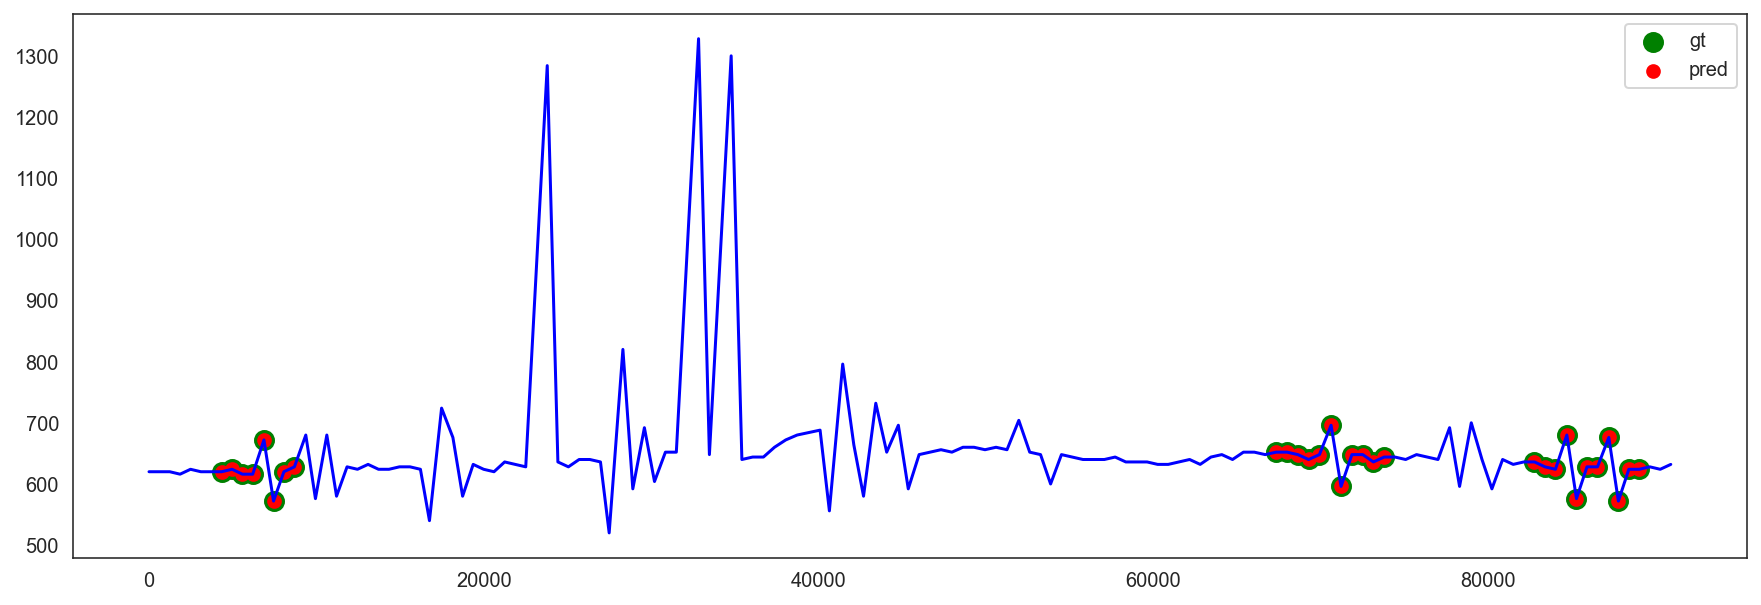

192
82 82 82
(98,) (82, 677) (98,) (98,) (82,)


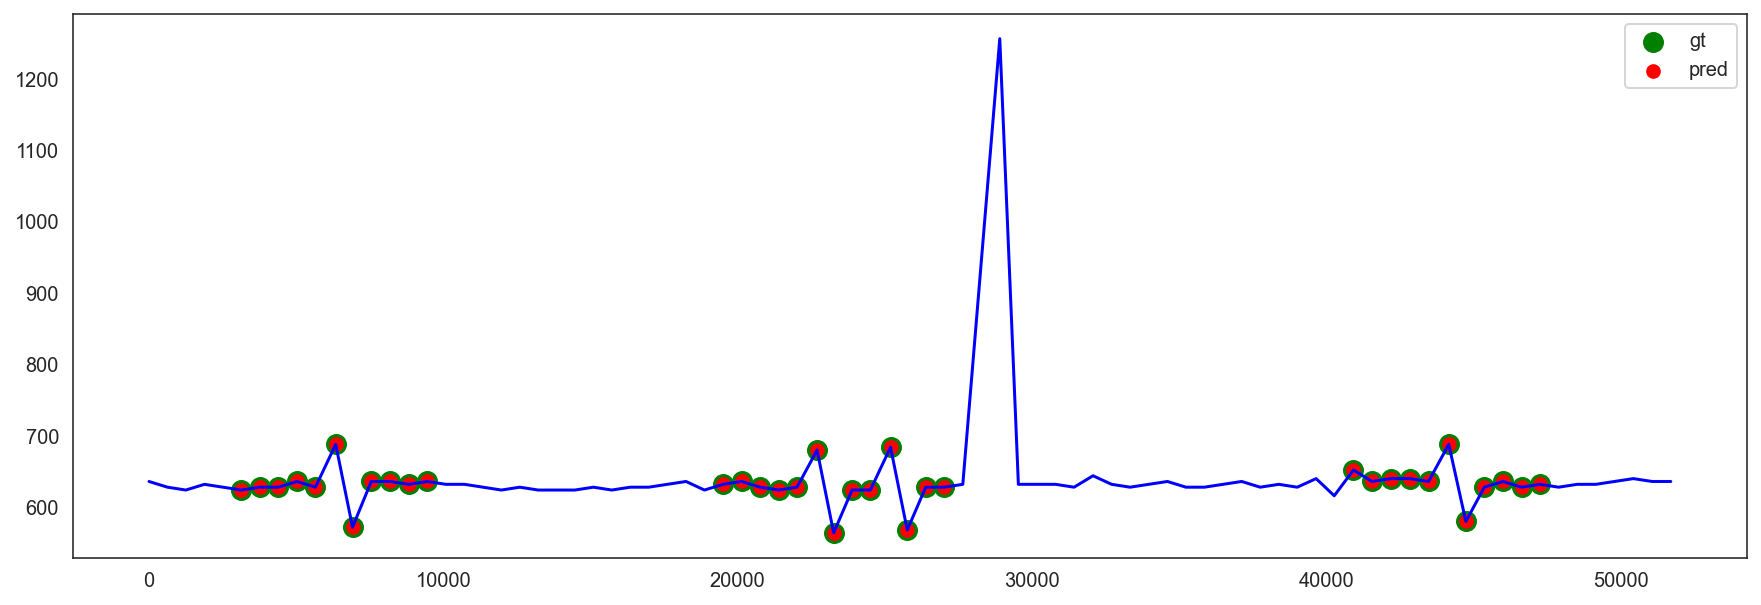

18
111 111 111
(127,) (111, 677) (127,) (127,) (111,)


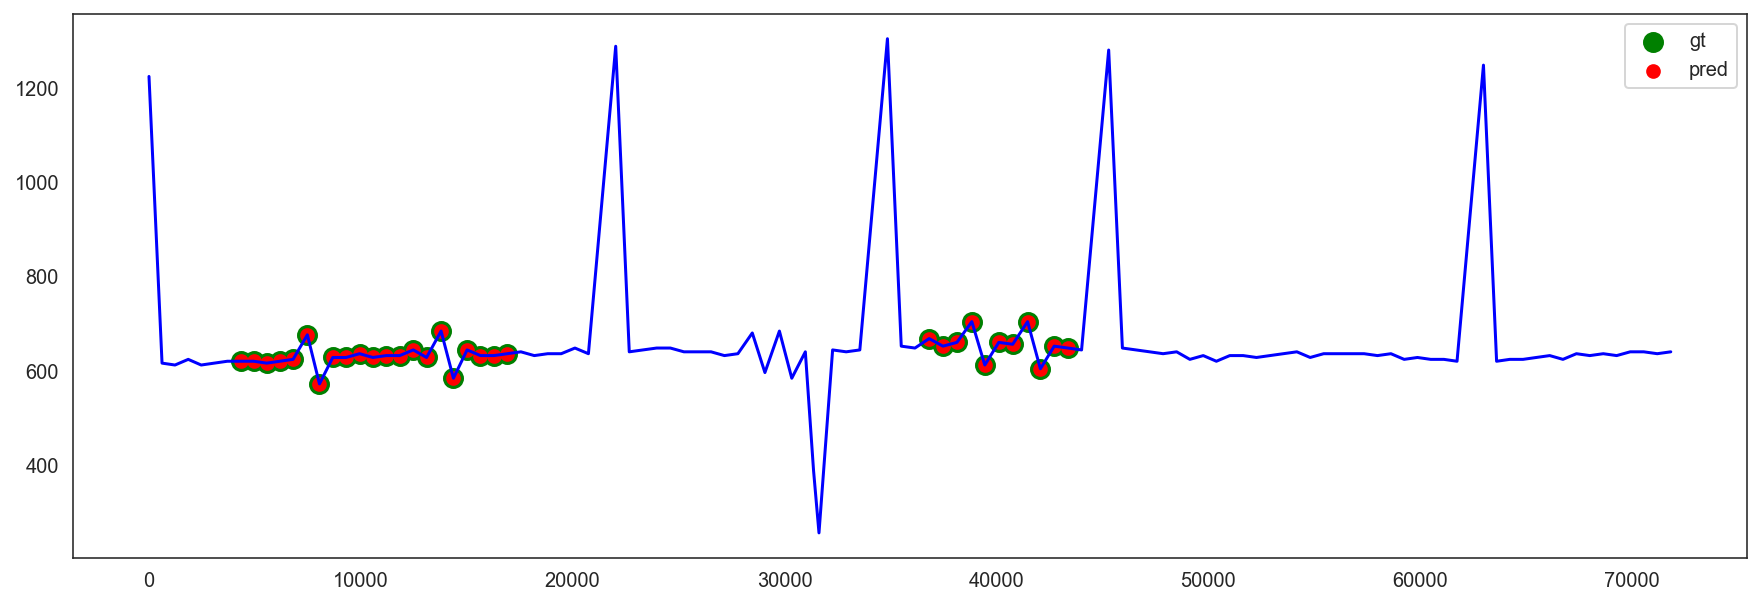

267
82 82 82
(98,) (82, 677) (98,) (98,) (82,)


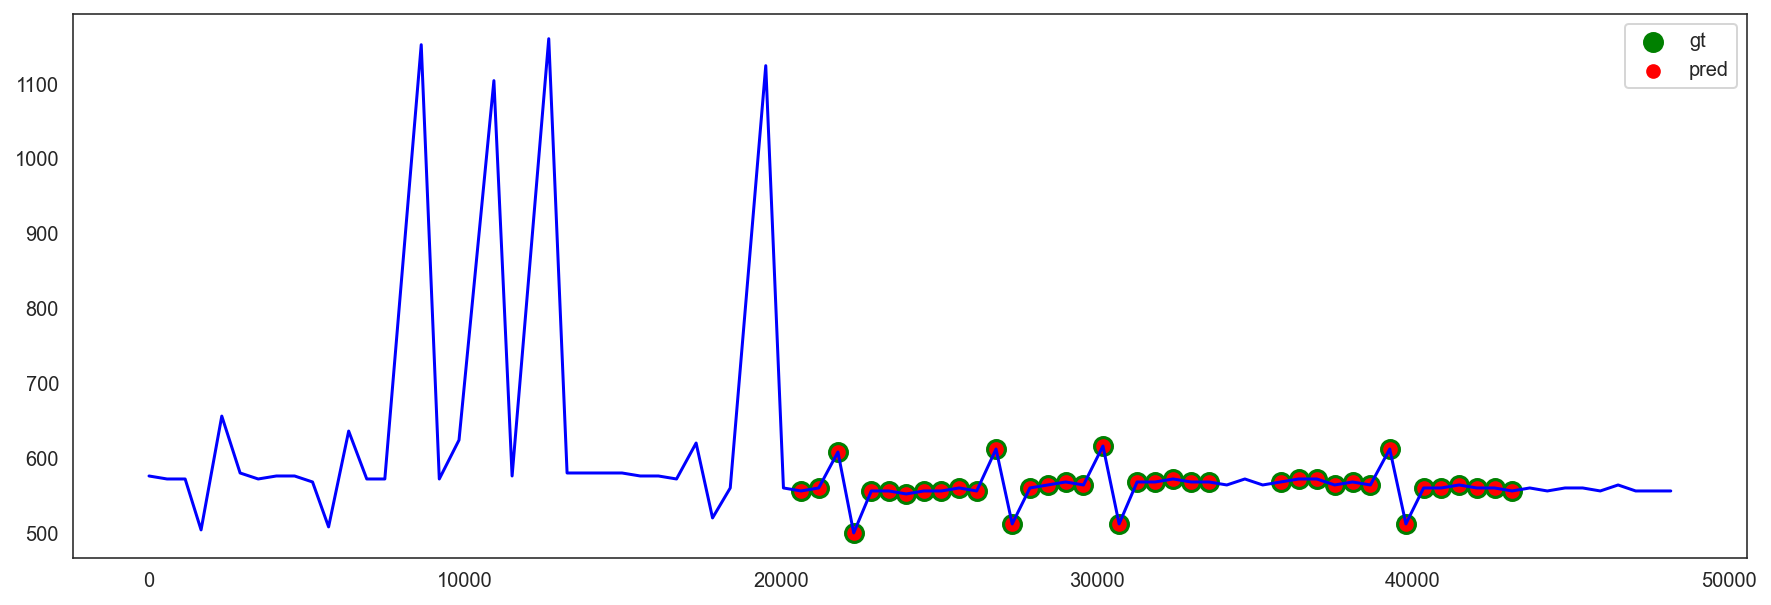

105
62 62 62
(78,) (62, 677) (78,) (78,) (62,)


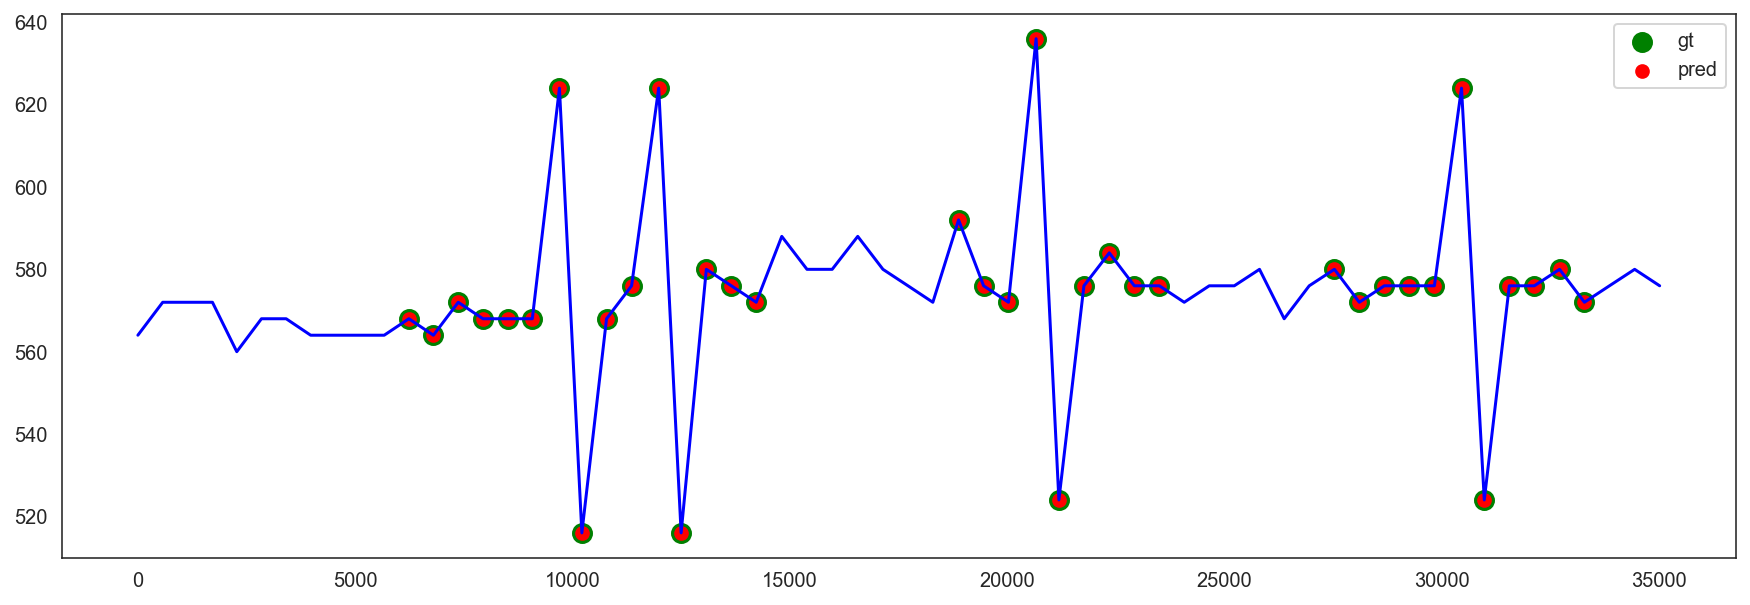

95
84 84 84
(100,) (84, 677) (100,) (100,) (84,)


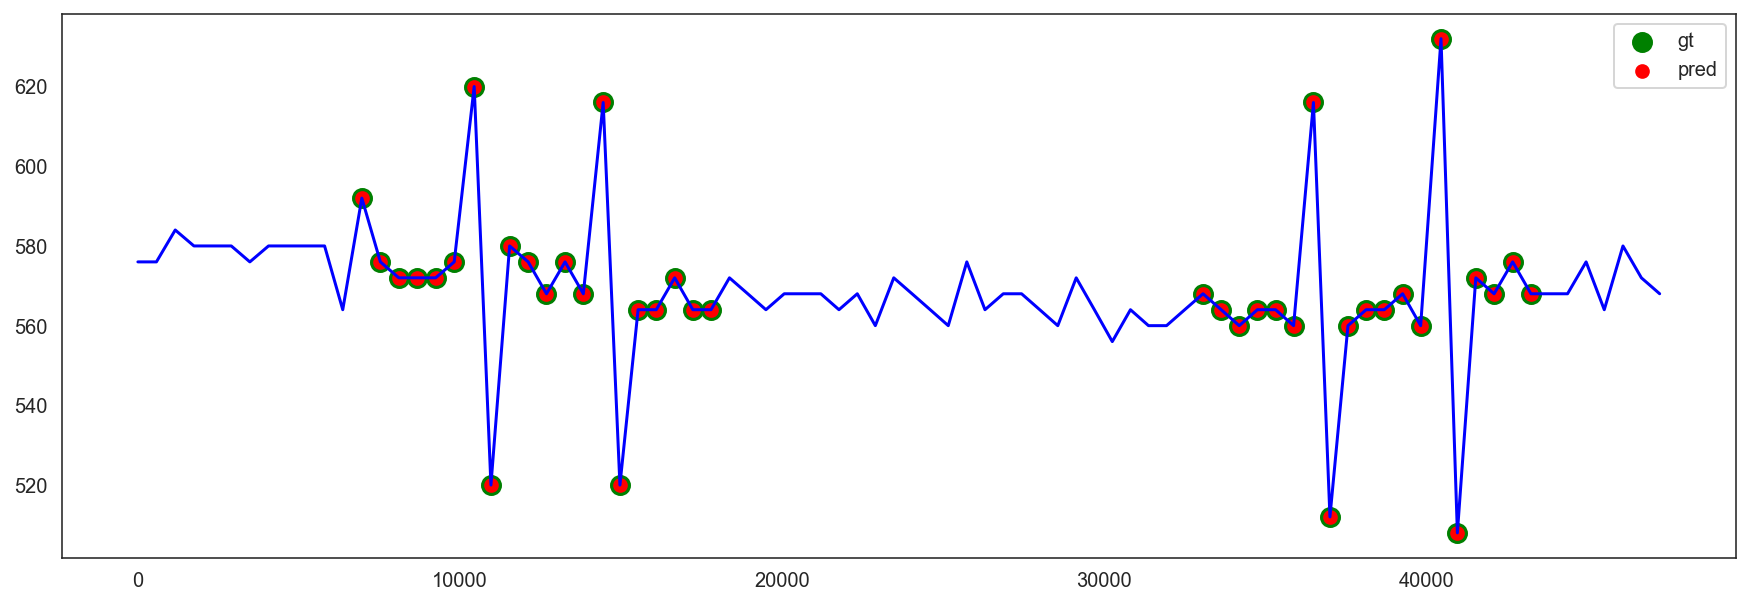

94
66 66 66
(82,) (66, 677) (82,) (82,) (66,)


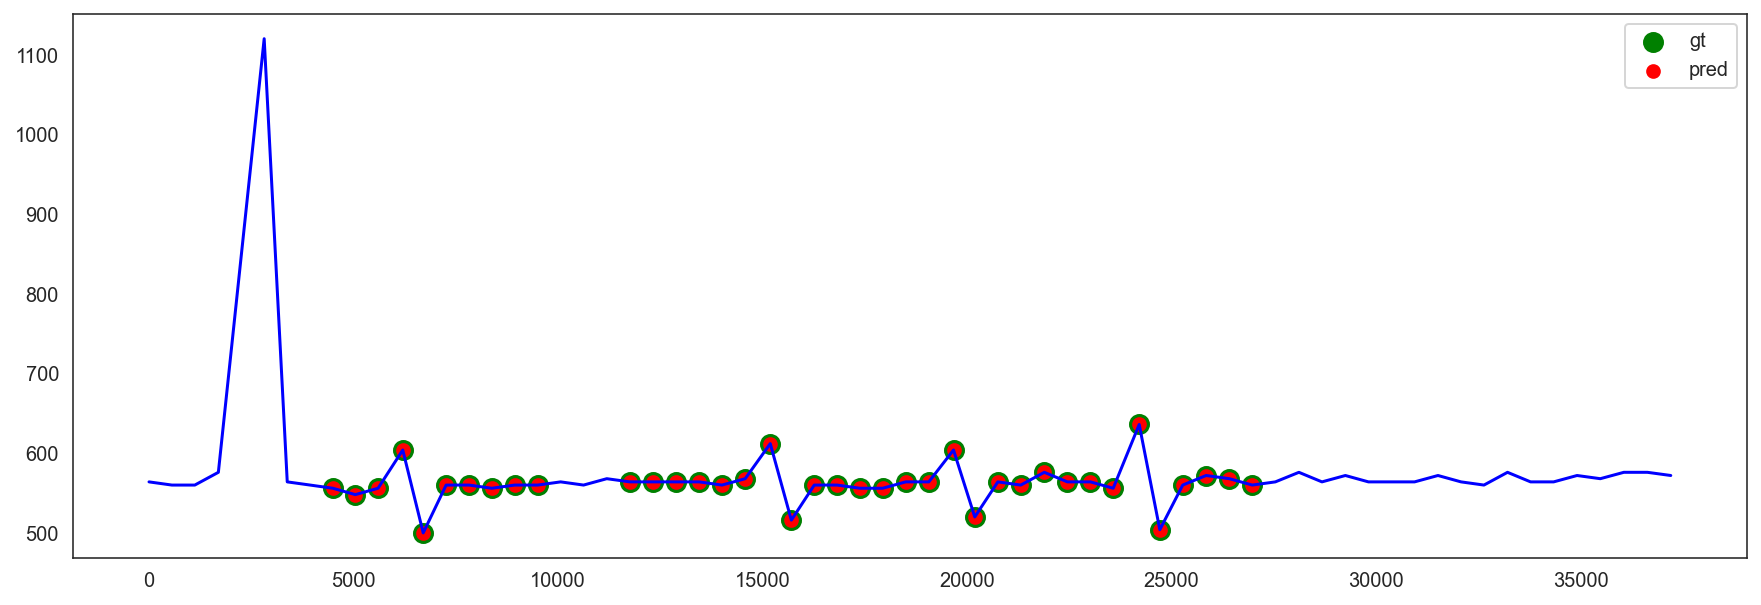

269
96 96 96
(112,) (96, 677) (112,) (112,) (96,)


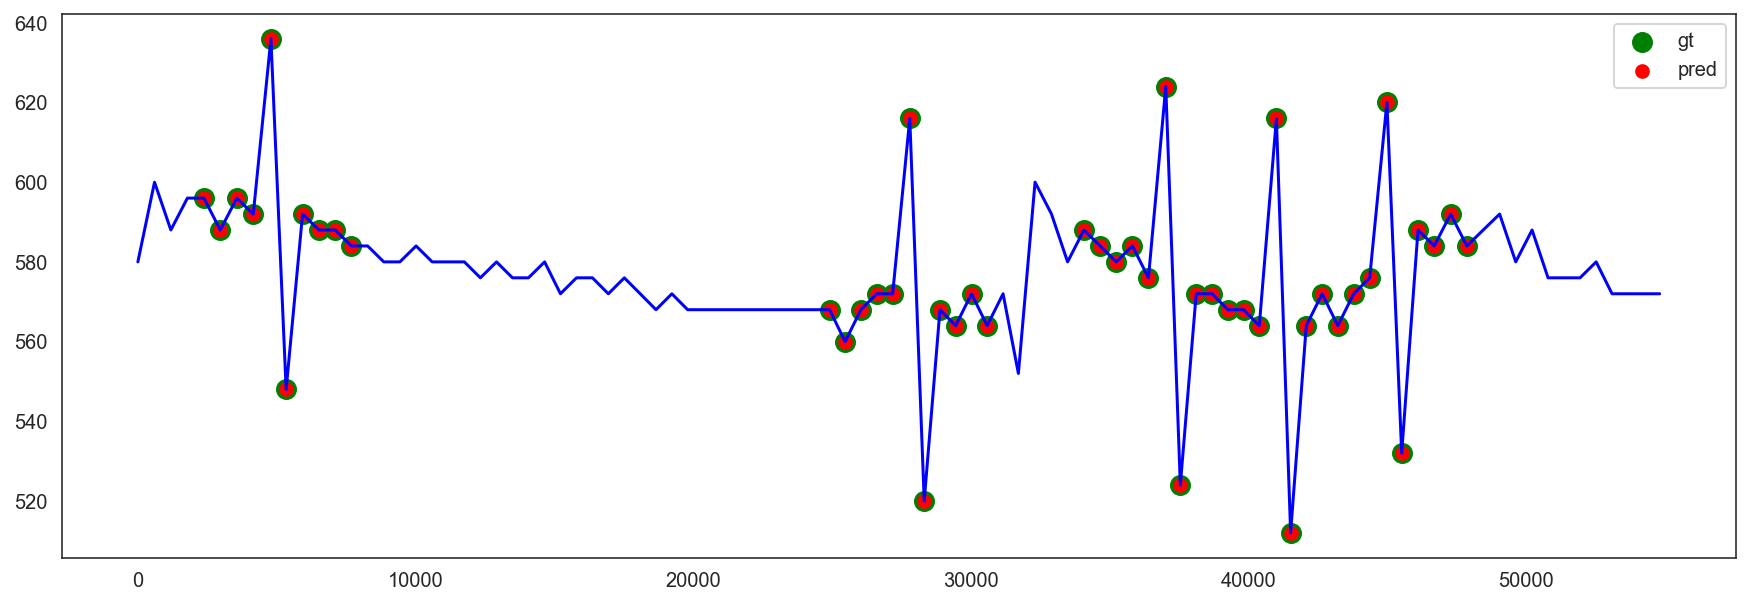

56
144 144 144
(160,) (144, 677) (160,) (160,) (144,)


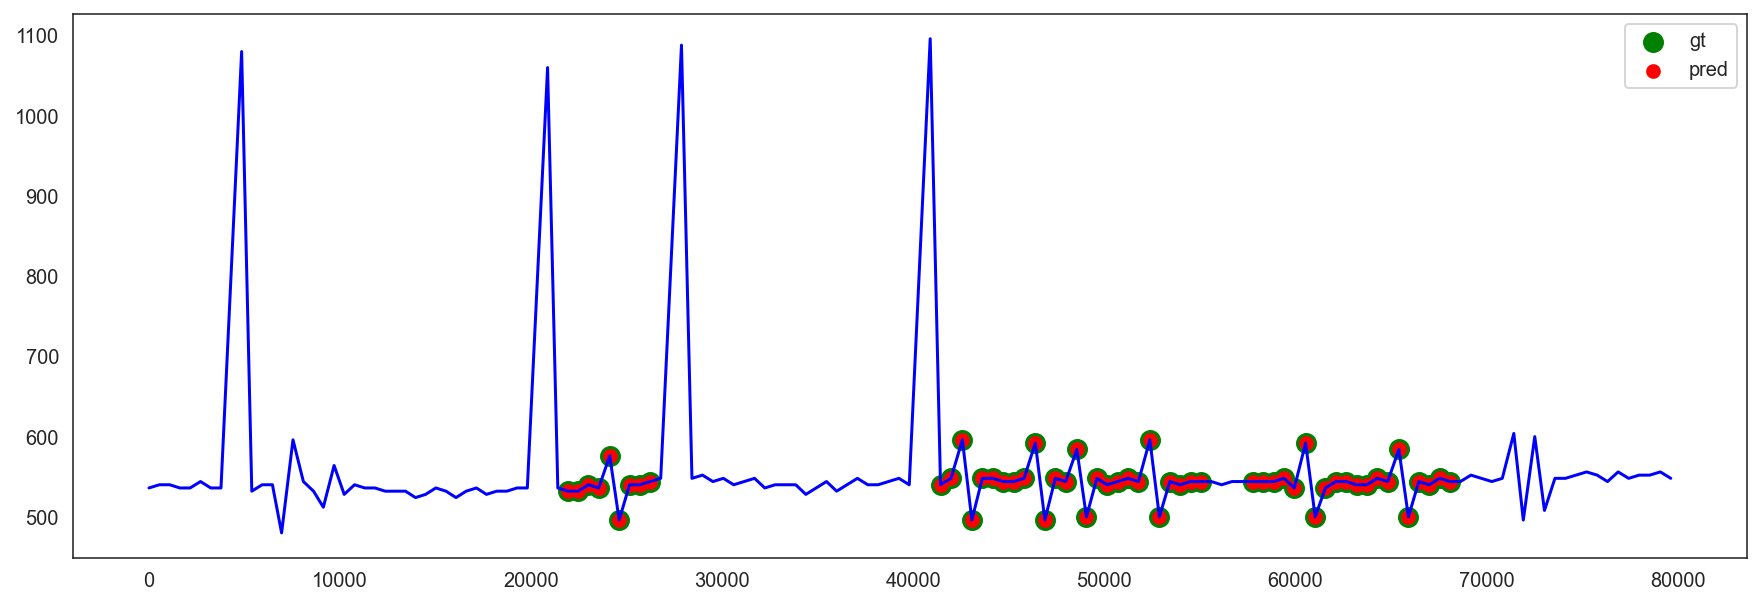

98
130 130 130
(146,) (130, 677) (146,) (146,) (130,)


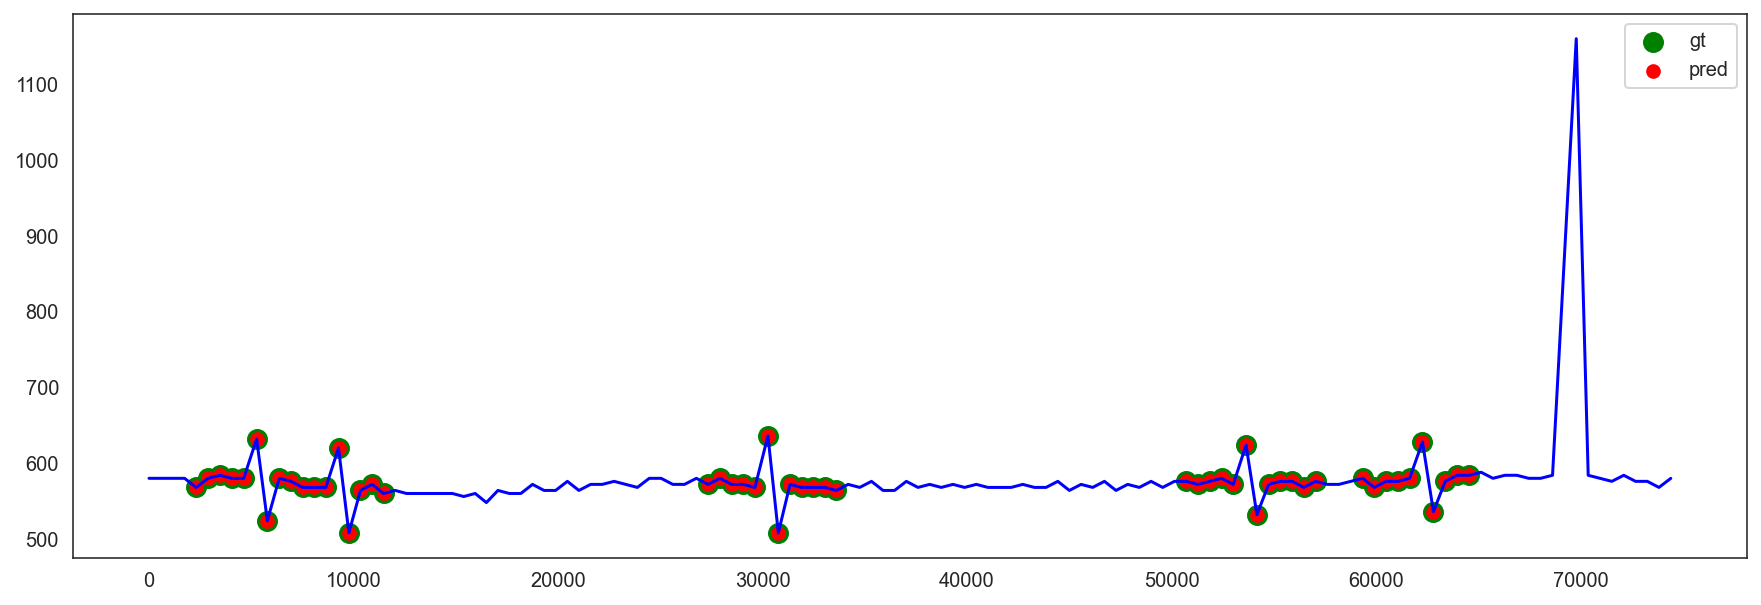

184
120 120 120
(136,) (120, 677) (136,) (136,) (120,)


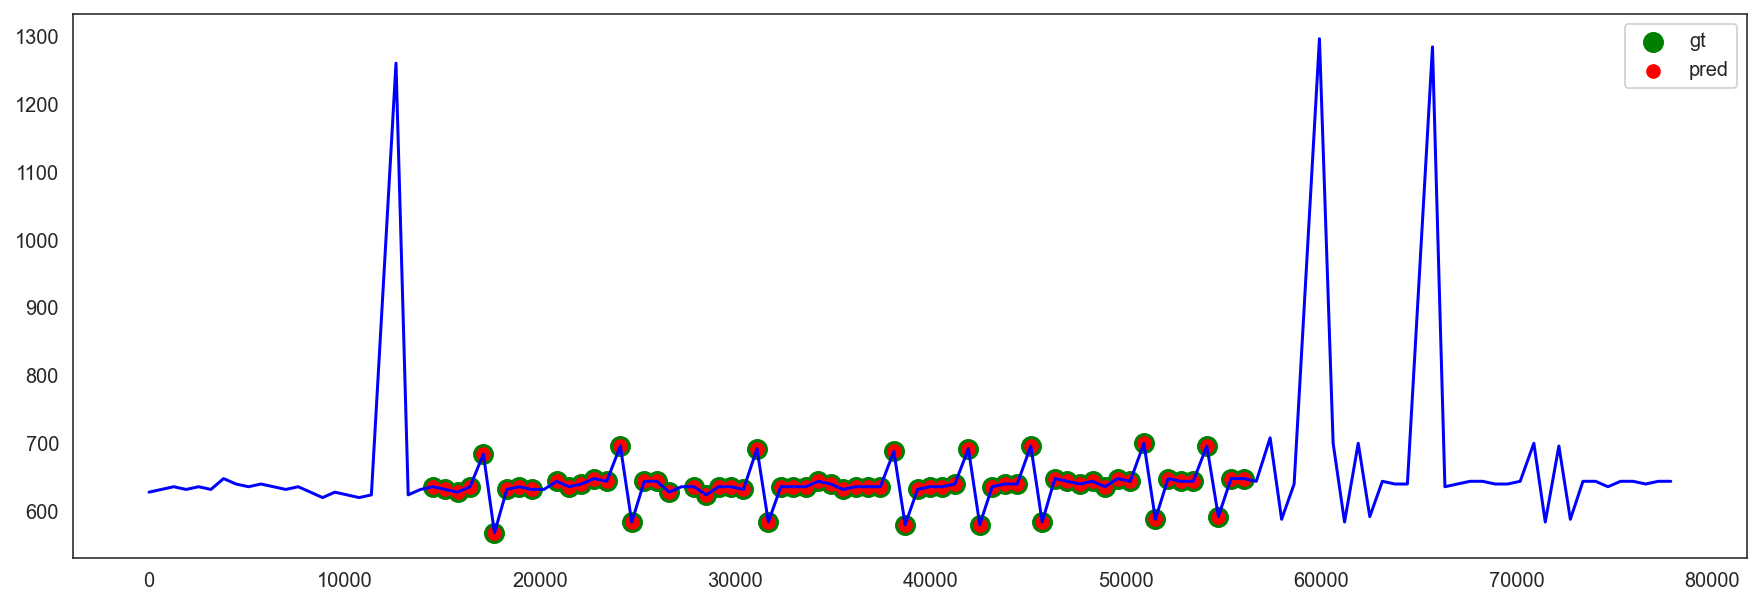

176
74 74 74
(90,) (74, 677) (90,) (90,) (74,)


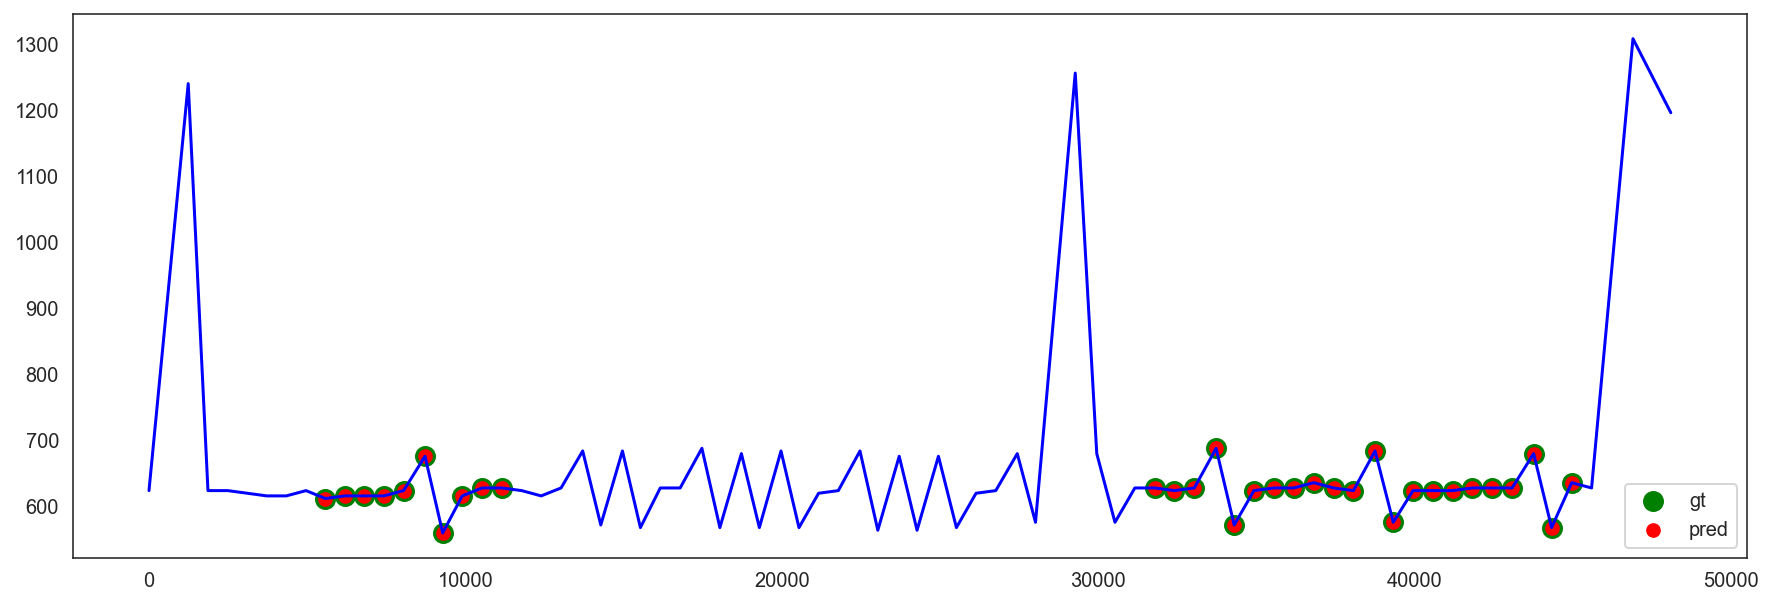

In [207]:
# seq_ids_train, seq_ids_val, seq_ids_test 
for id_ in tqdm(test.id.unique()):
    print(id_)
#     time, x, x_data, y = get_slices_check(id_, len_=10)
    time, x_data, x, y = get_check(test, id_, chunk_len=CHUNK_LEN) 
    pca = pca_transformer.transform(x_data[:,:, 0])
    x_data = x_data.reshape((x_data.shape[0],x_data.shape[1] *x_data.shape[2] ))
    
    x_data = x_data.tolist()
    for i in range(len(pca)):
        x_data[i].extend(pca[i])
    x_data = np.array(x_data)

    pred = model.predict(x_data)#[11:-11]
    
    
    test.y[test.id == id_] = pred 
#     pred = [0,0,0,0,0] + list(pred) + [0,0,0,0,0]
    pred = np.array(pred)
#     print(pred)
    print(len(test[test.id == id_]), len(x_data), len(pred))
    print(time.shape,x_data.shape, x.shape, y.shape, pred.shape)
    plot_res(test[test.id == id_].time.values, test[test.id == id_].x.values, 
             gt=test[test.id == id_].y.values, pred=pred)

In [208]:
test[['id', 'time', 'y']].to_csv('CardioSpike/data/submission_pca16.csv', index=False)

In [19]:
len(test)

15034

0 93 93
(103,) (93, 475) (103,) (103,) (93,)


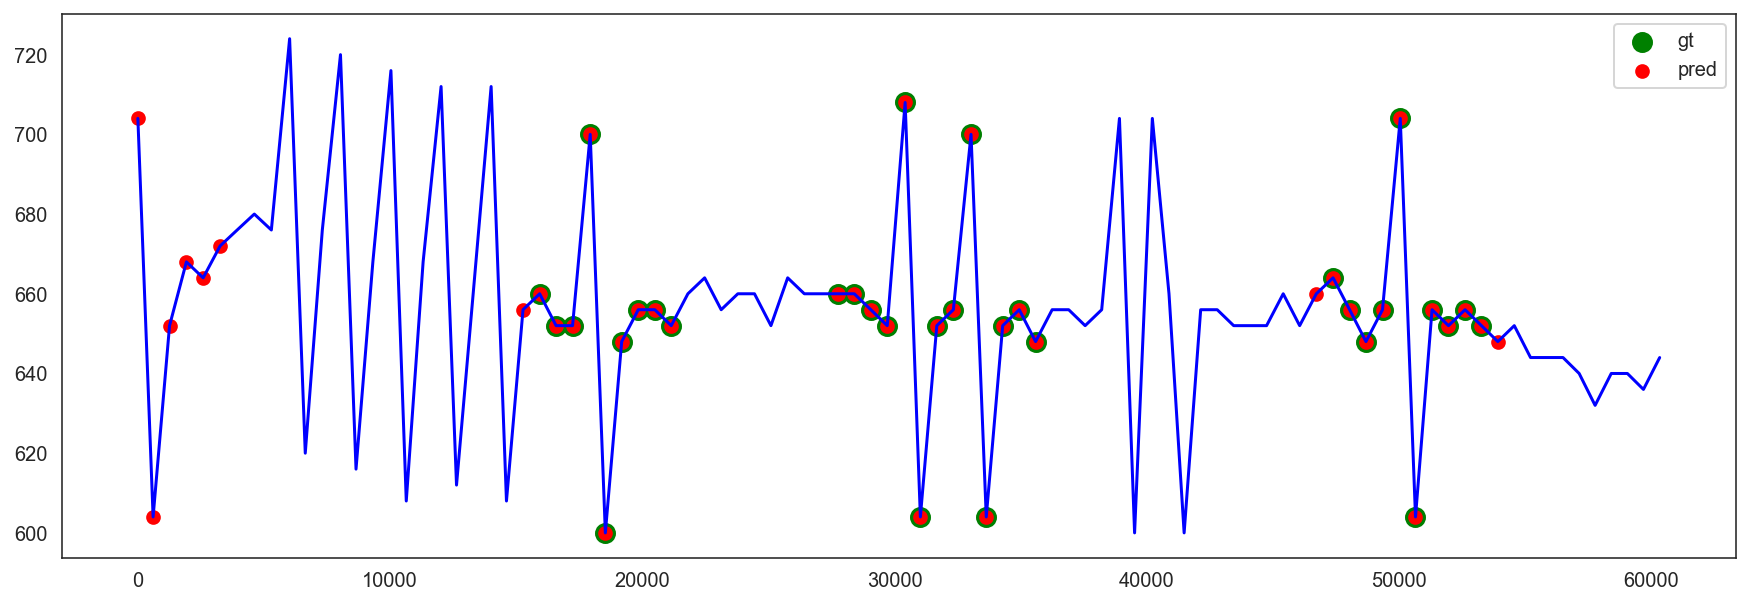

0 237 237
(247,) (237, 475) (247,) (247,) (237,)


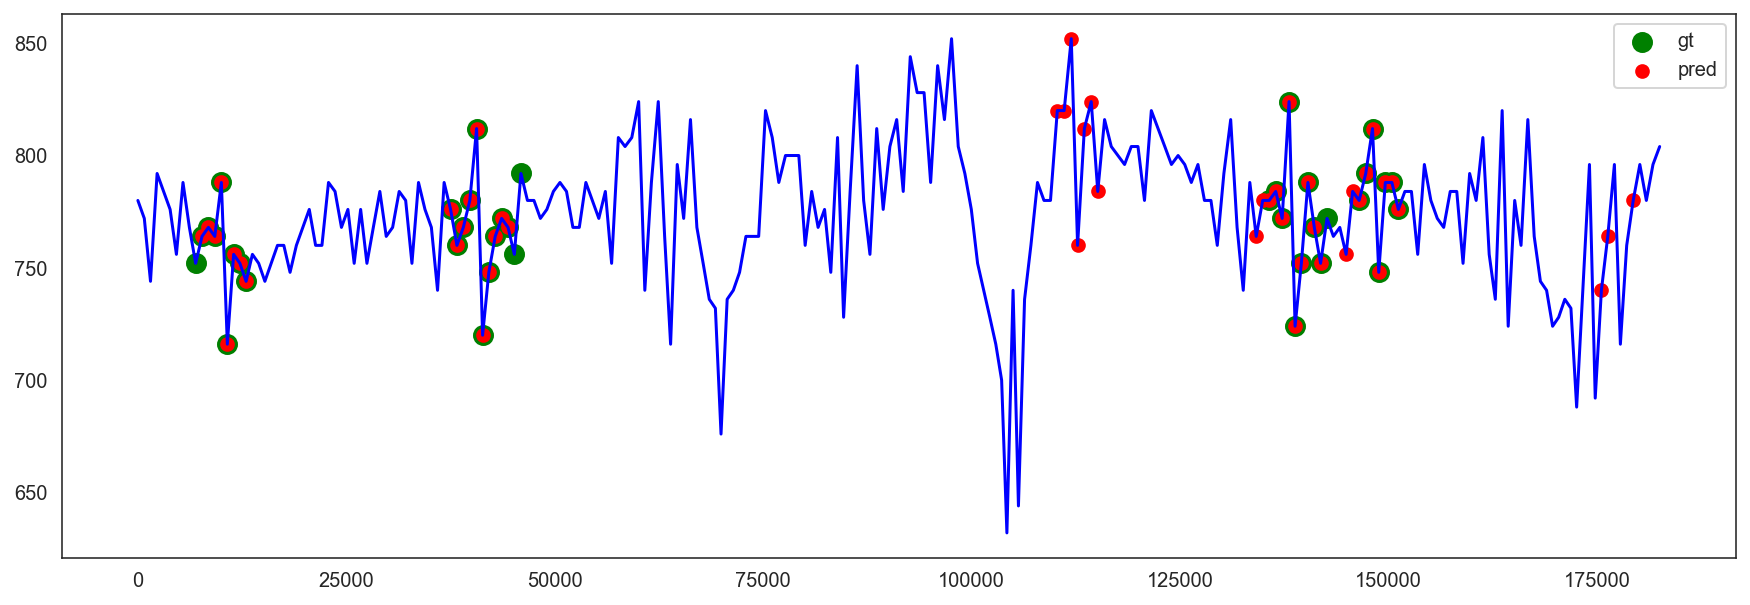

0 249 249
(259,) (249, 475) (259,) (259,) (249,)


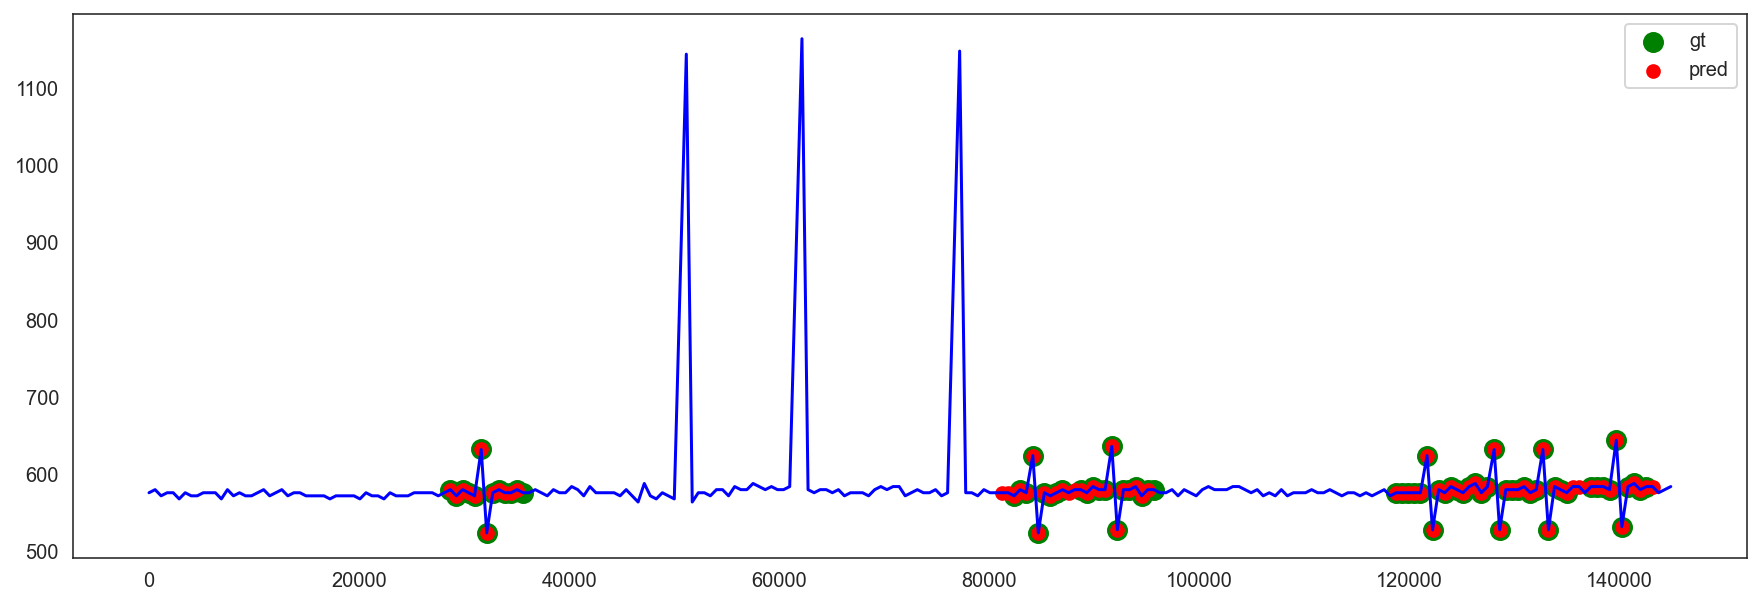

0 258 258
(268,) (258, 475) (268,) (268,) (258,)


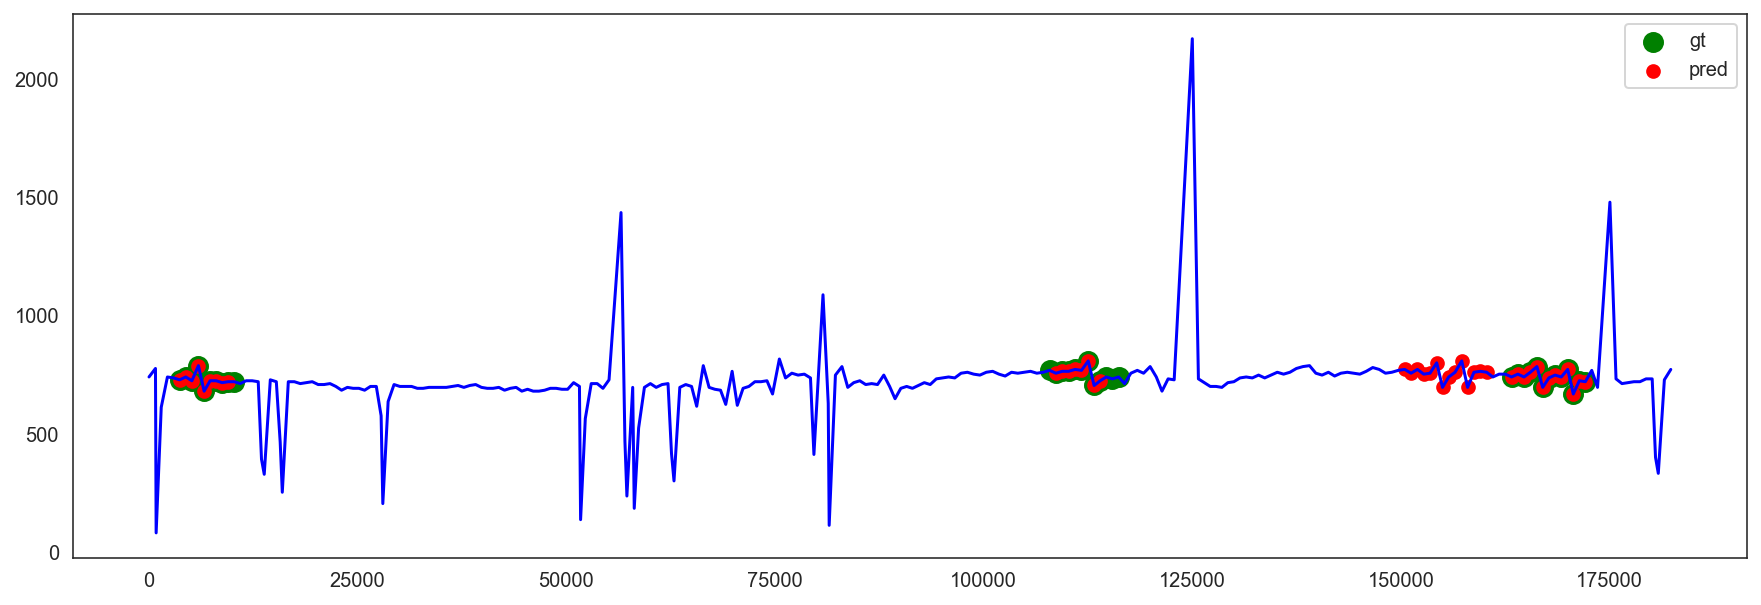

0 339 339
(349,) (339, 475) (349,) (349,) (339,)


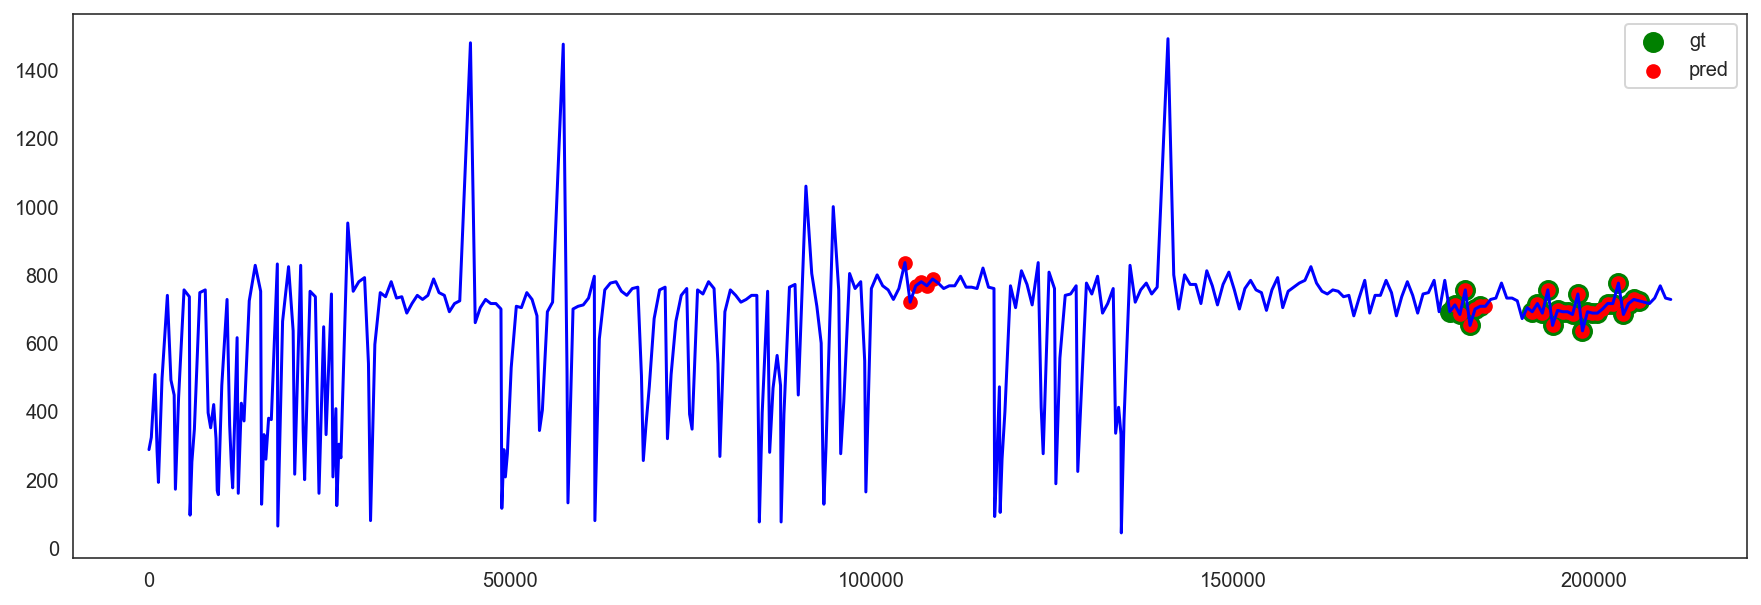

0 114 114
(124,) (114, 475) (124,) (124,) (114,)


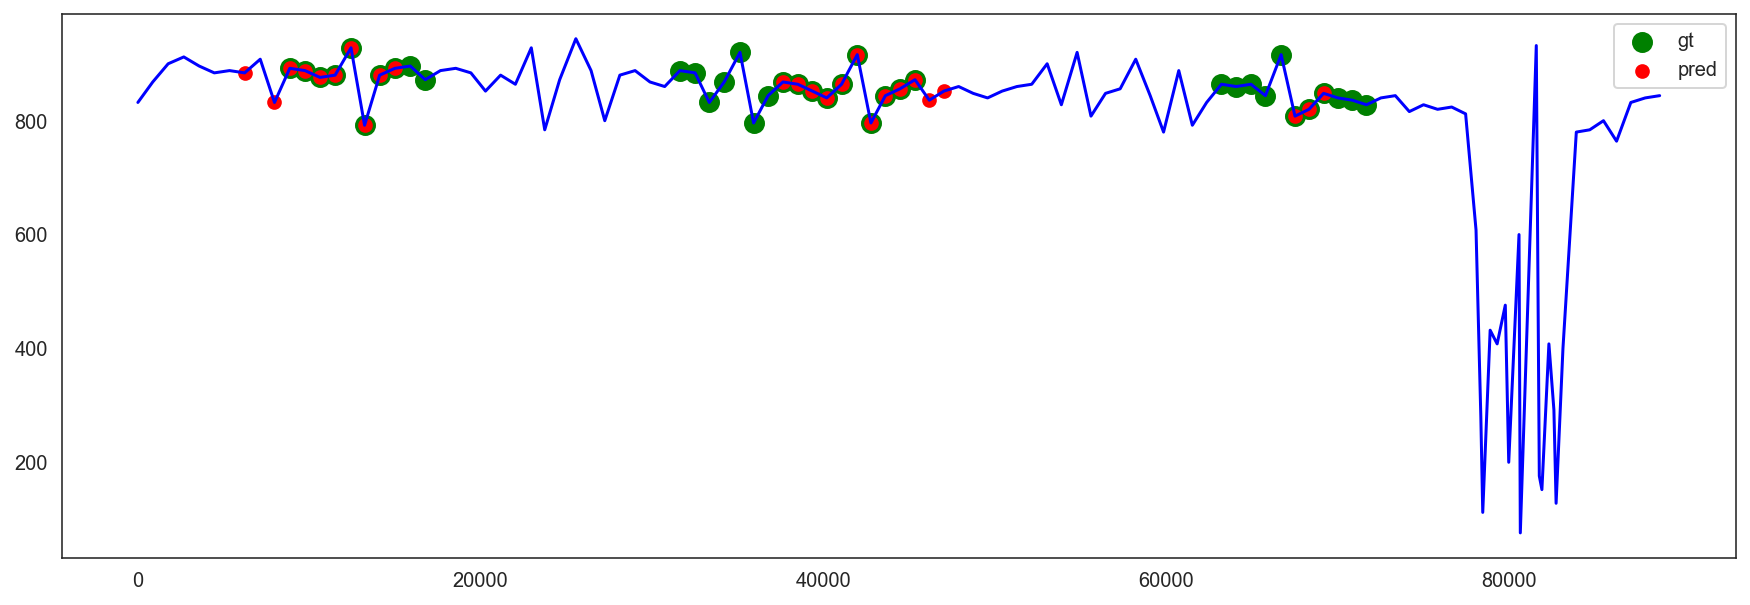

0 113 113
(123,) (113, 475) (123,) (123,) (113,)


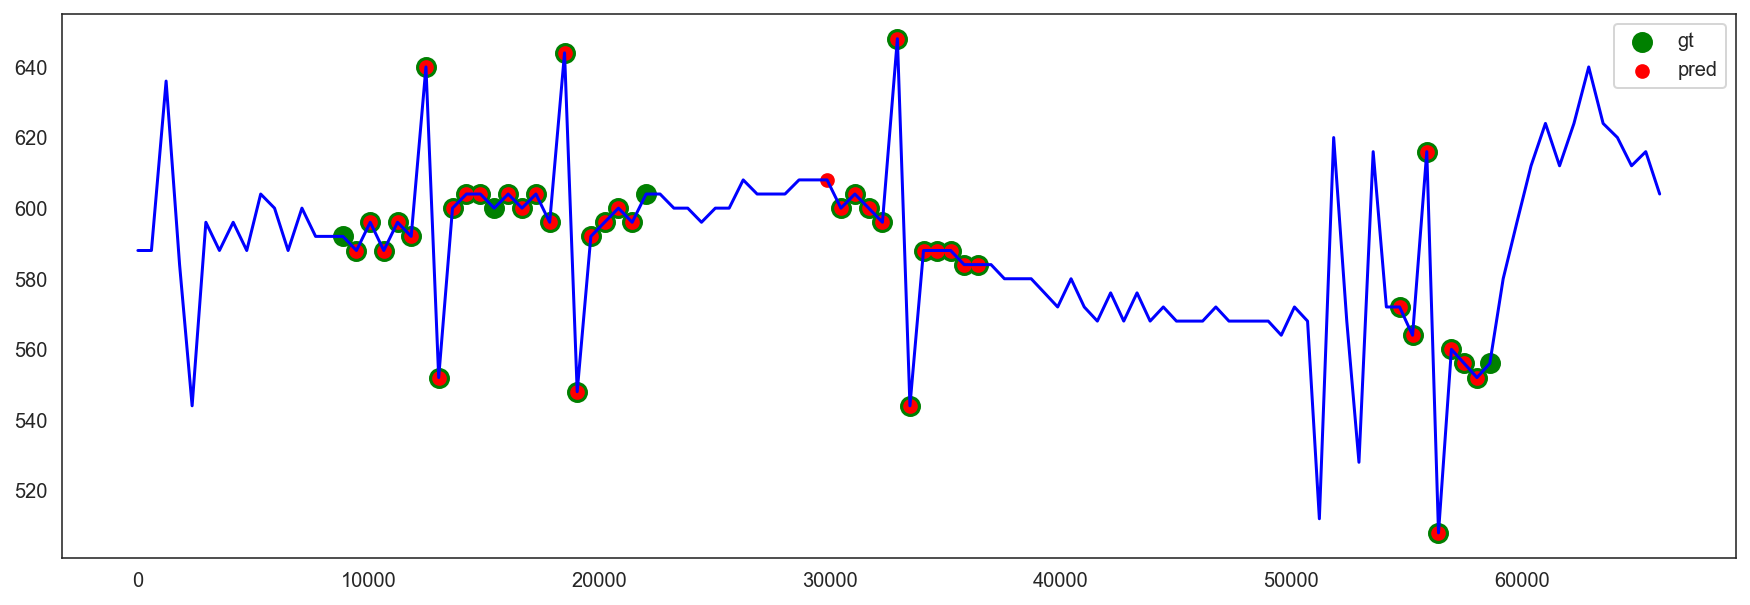

0 75 75
(85,) (75, 475) (85,) (85,) (75,)


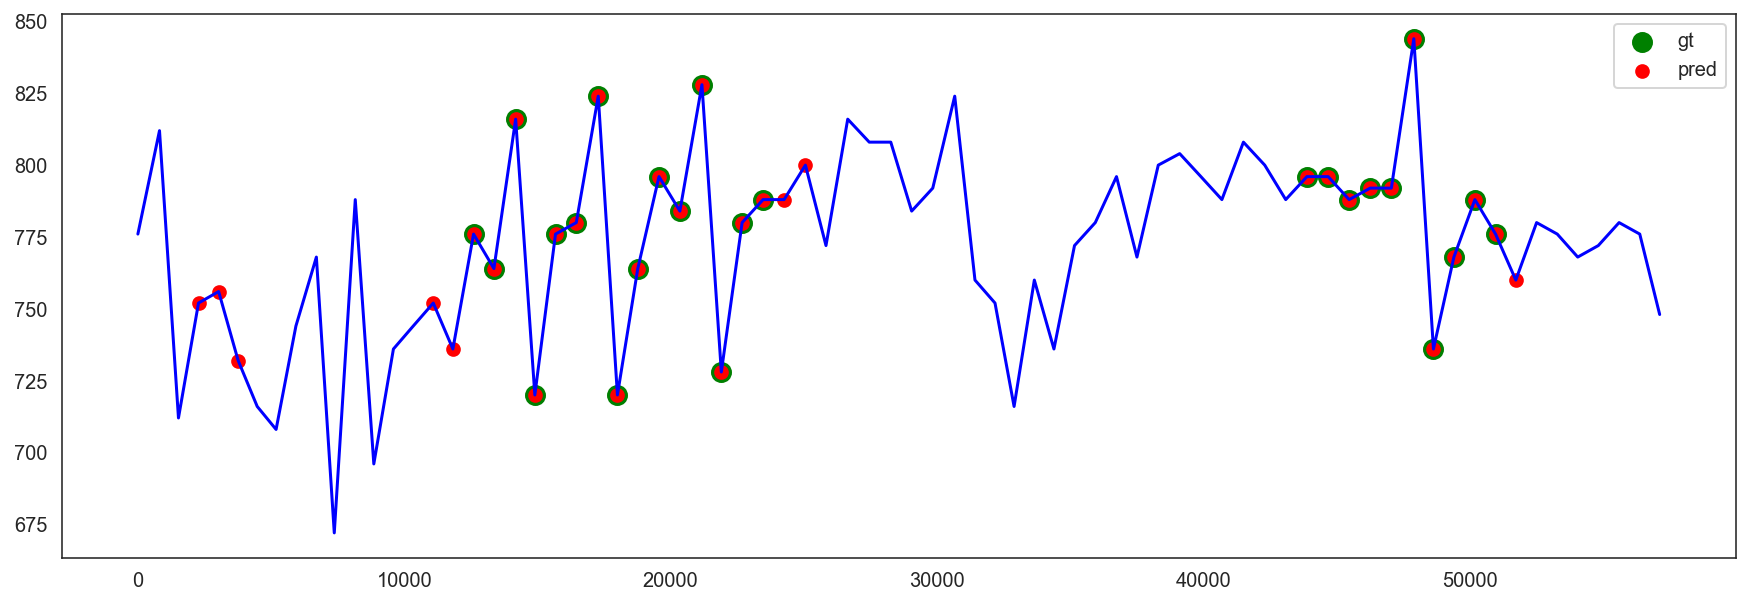

0 182 182
(192,) (182, 475) (192,) (192,) (182,)


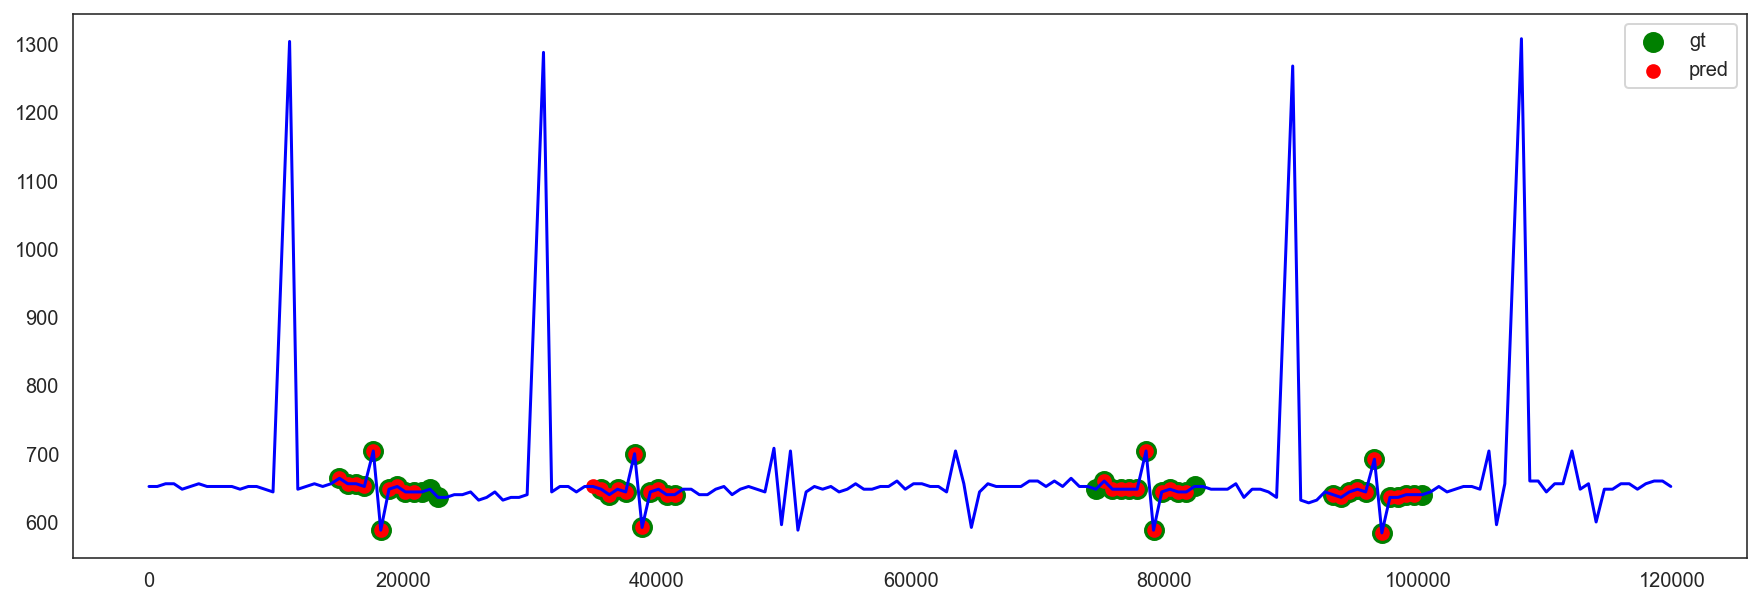

0 141 141
(151,) (141, 475) (151,) (151,) (141,)


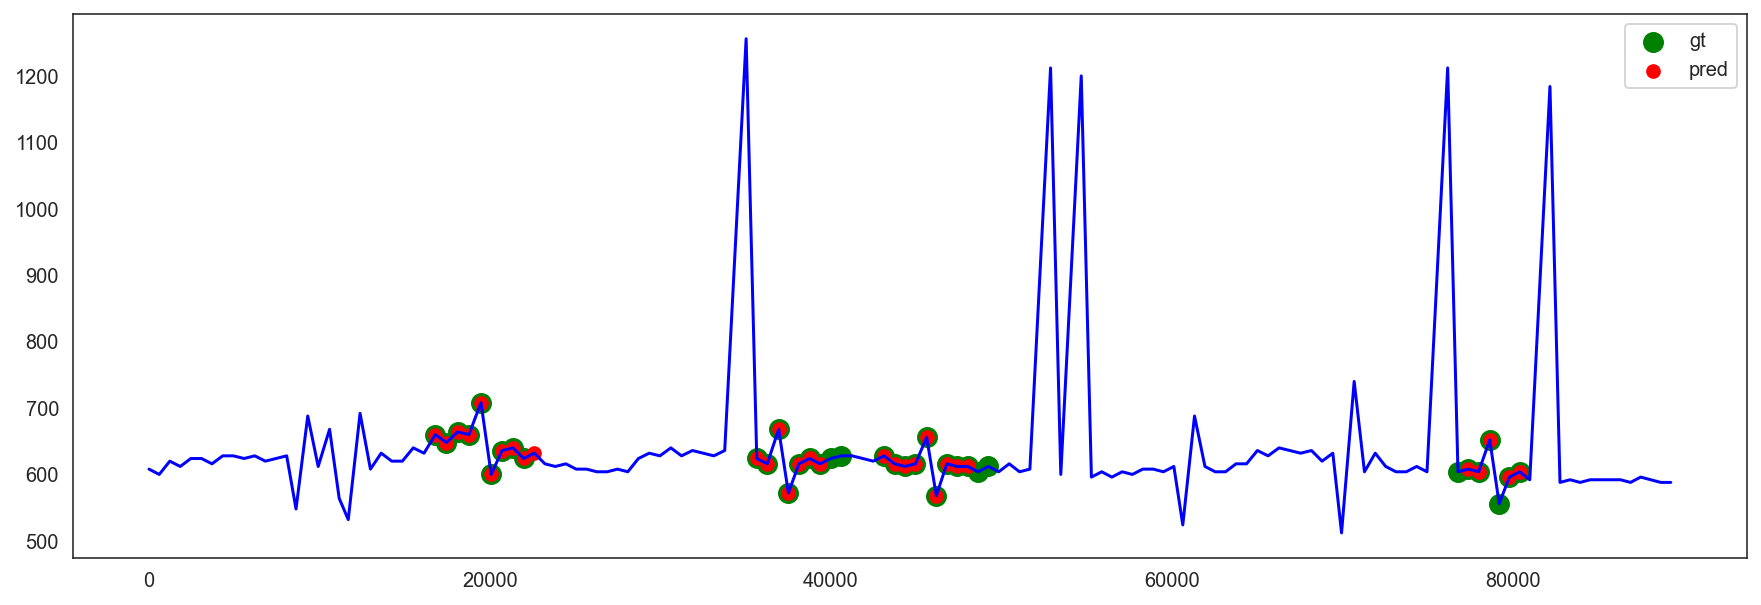

0 65 65
(75,) (65, 475) (75,) (75,) (65,)


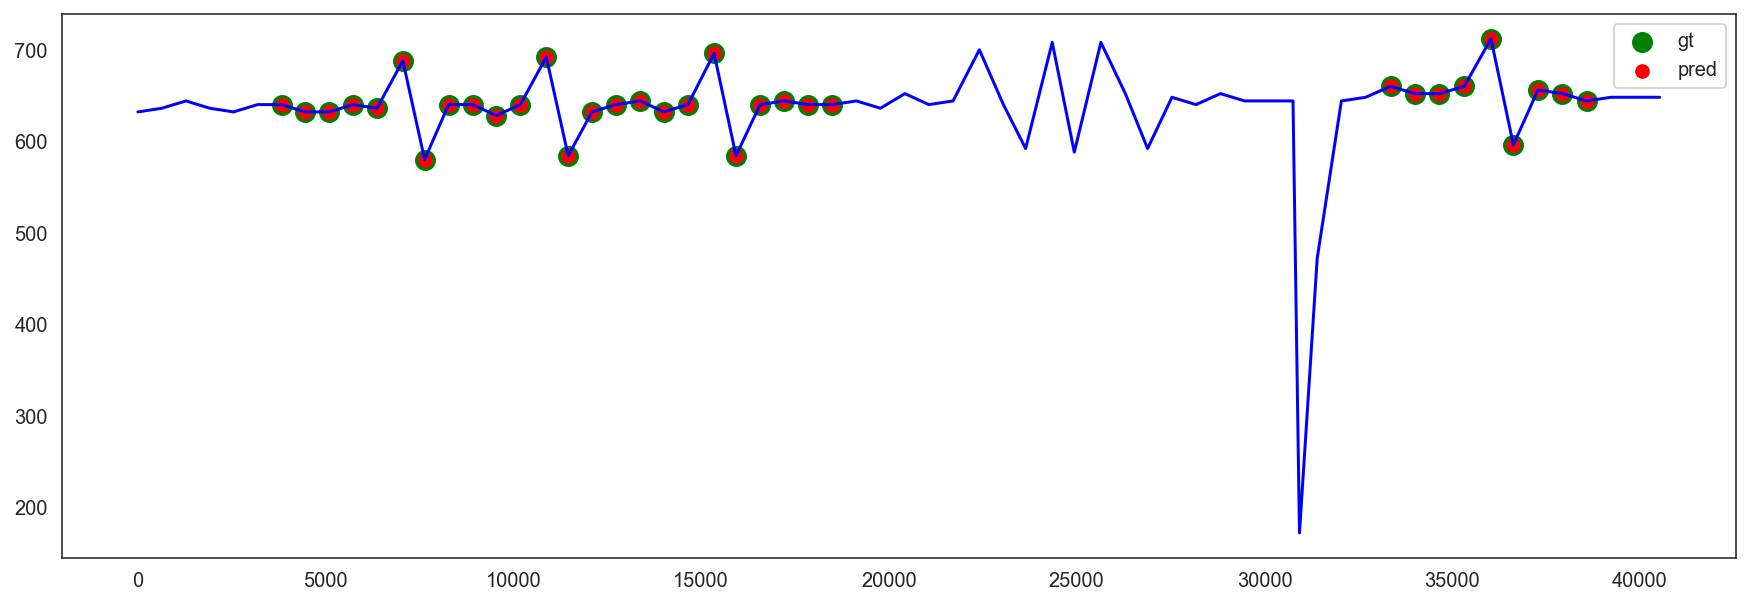

0 151 151
(161,) (151, 475) (161,) (161,) (151,)


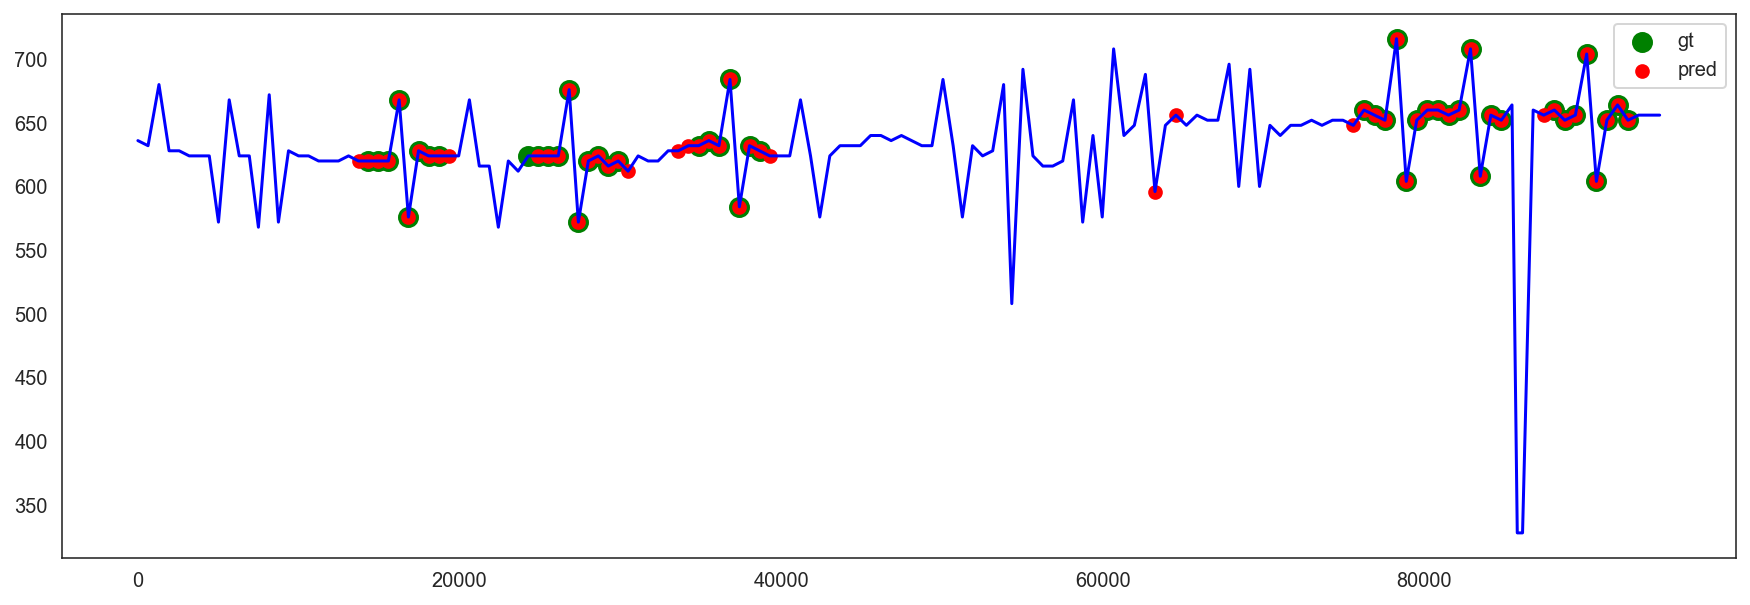

0 91 91
(101,) (91, 475) (101,) (101,) (91,)


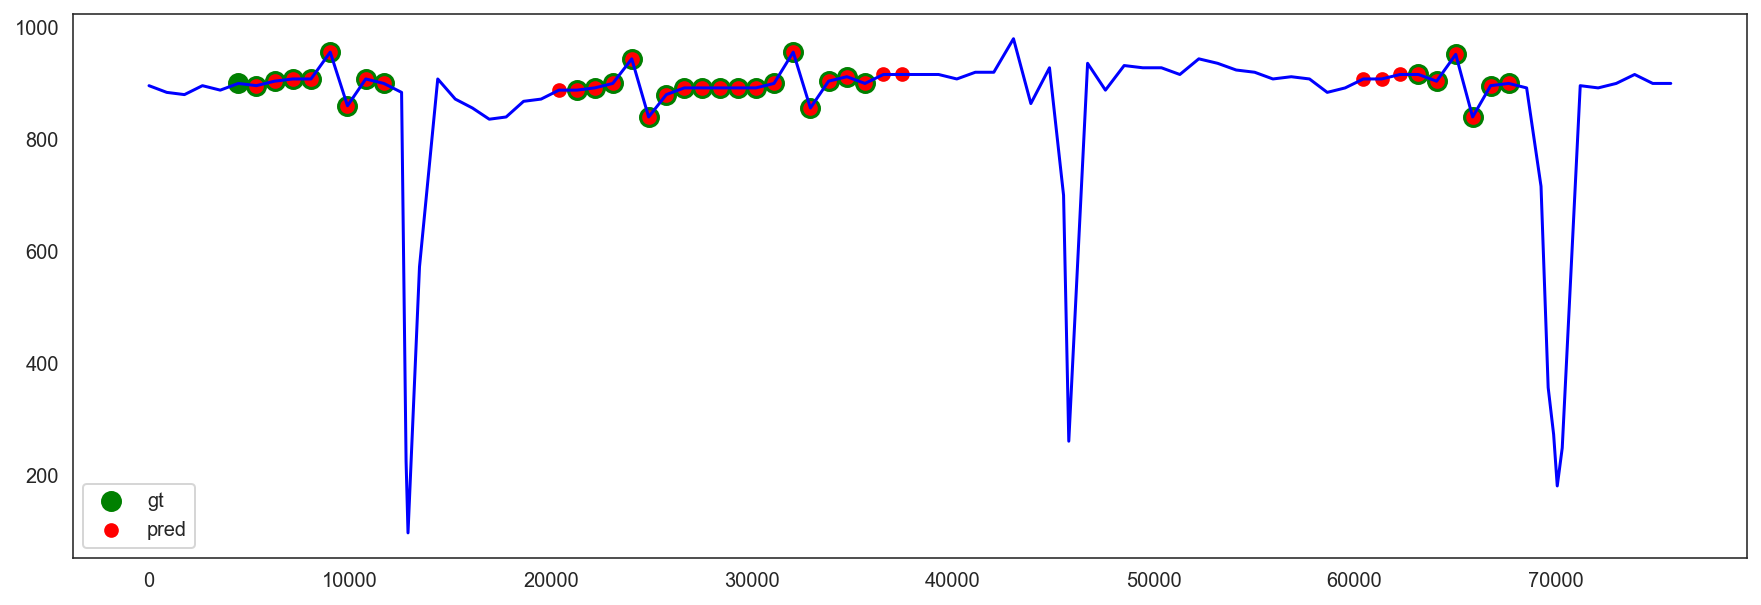

0 384 384
(394,) (384, 475) (394,) (394,) (384,)


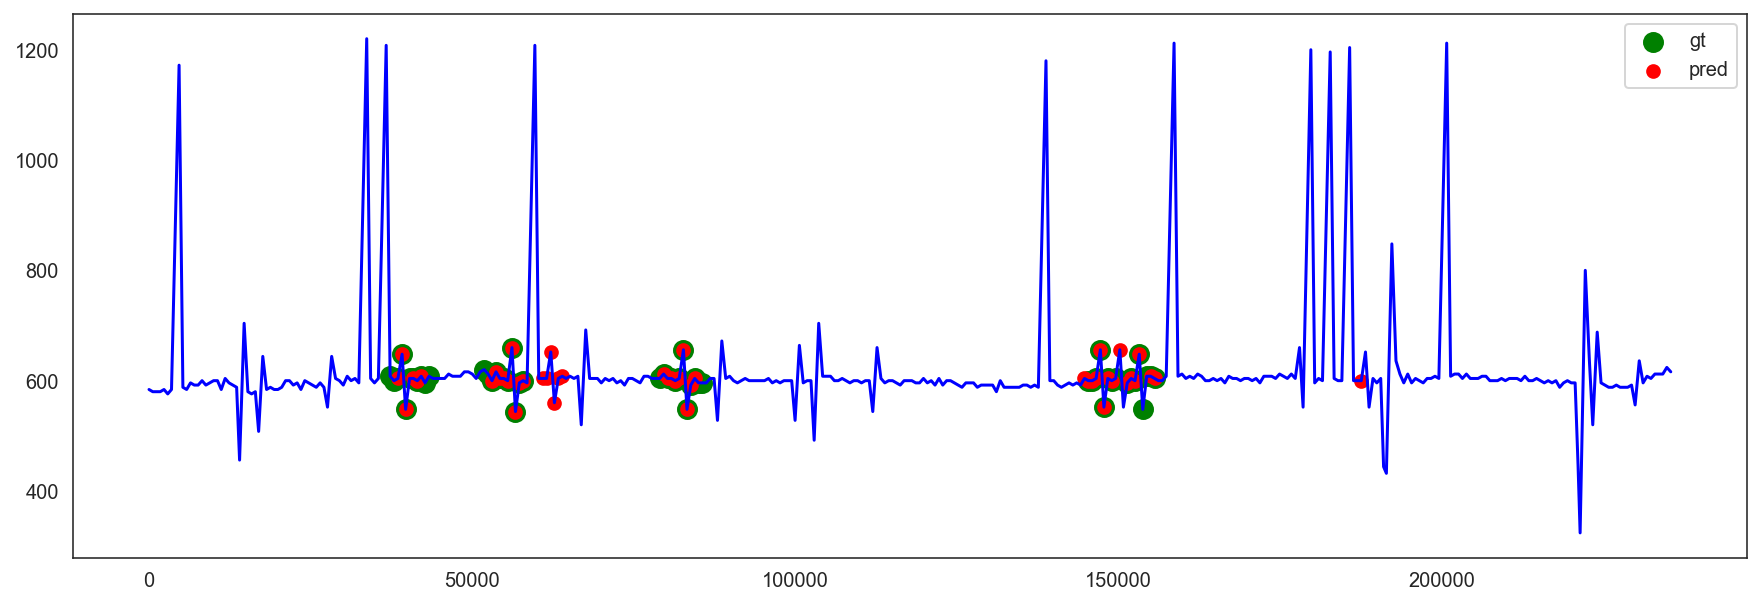

0 108 108
(118,) (108, 475) (118,) (118,) (108,)


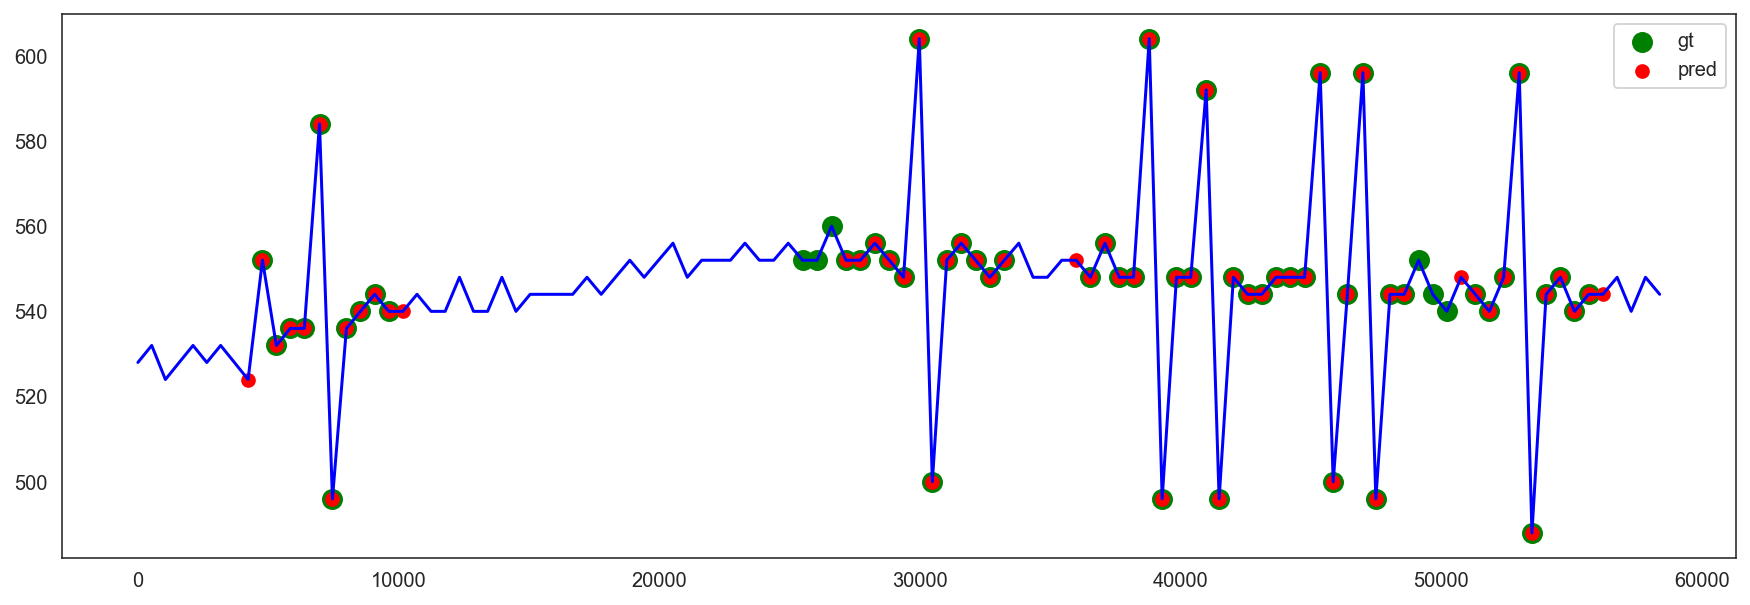

0 69 69
(79,) (69, 475) (79,) (79,) (69,)


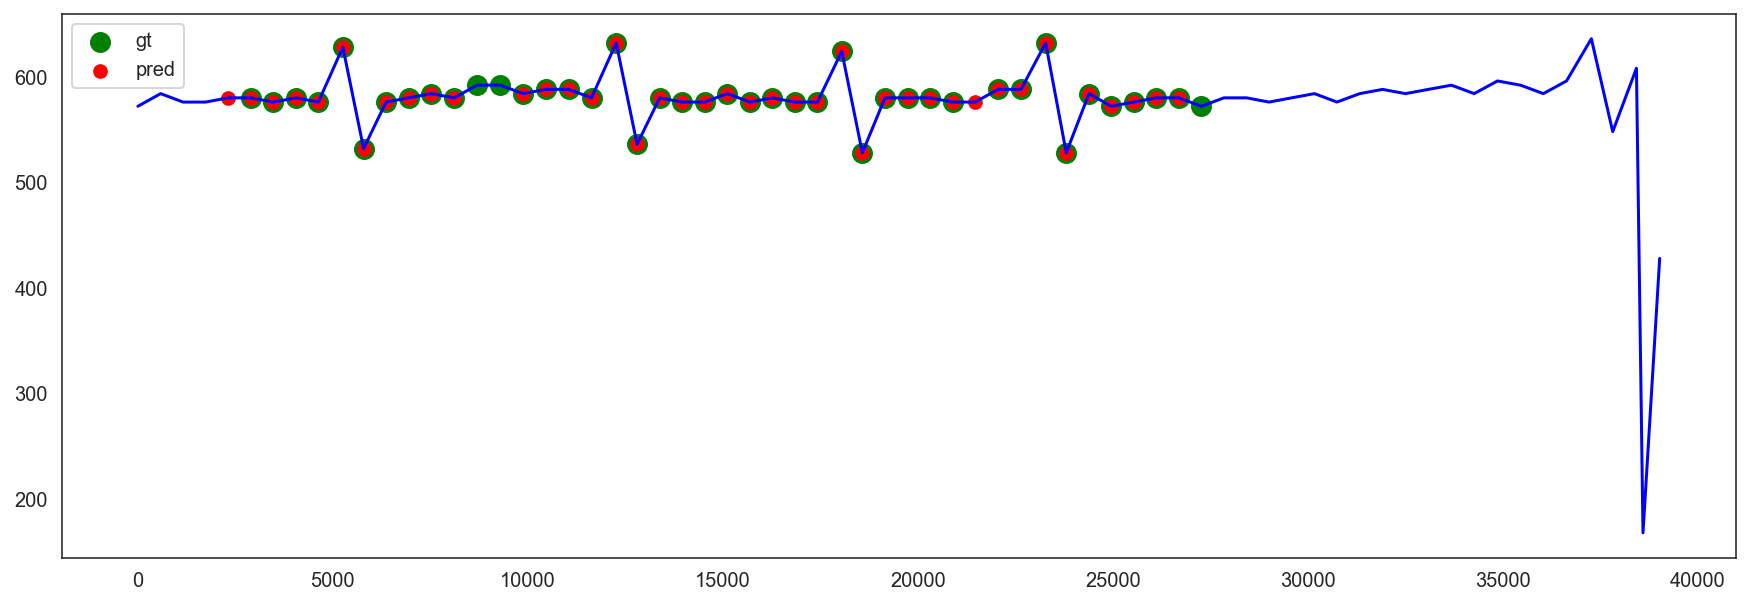

0 156 156
(166,) (156, 475) (166,) (166,) (156,)


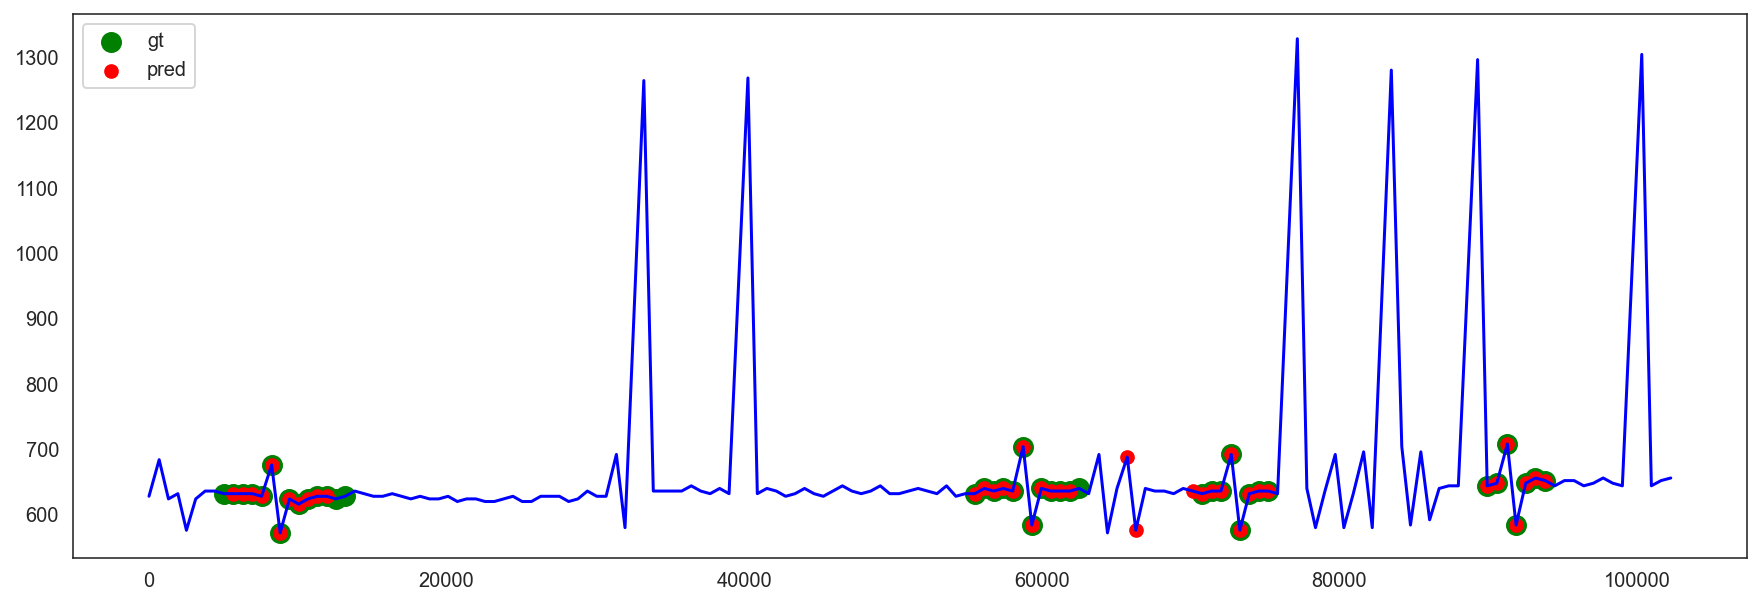

0 81 81
(91,) (81, 475) (91,) (91,) (81,)


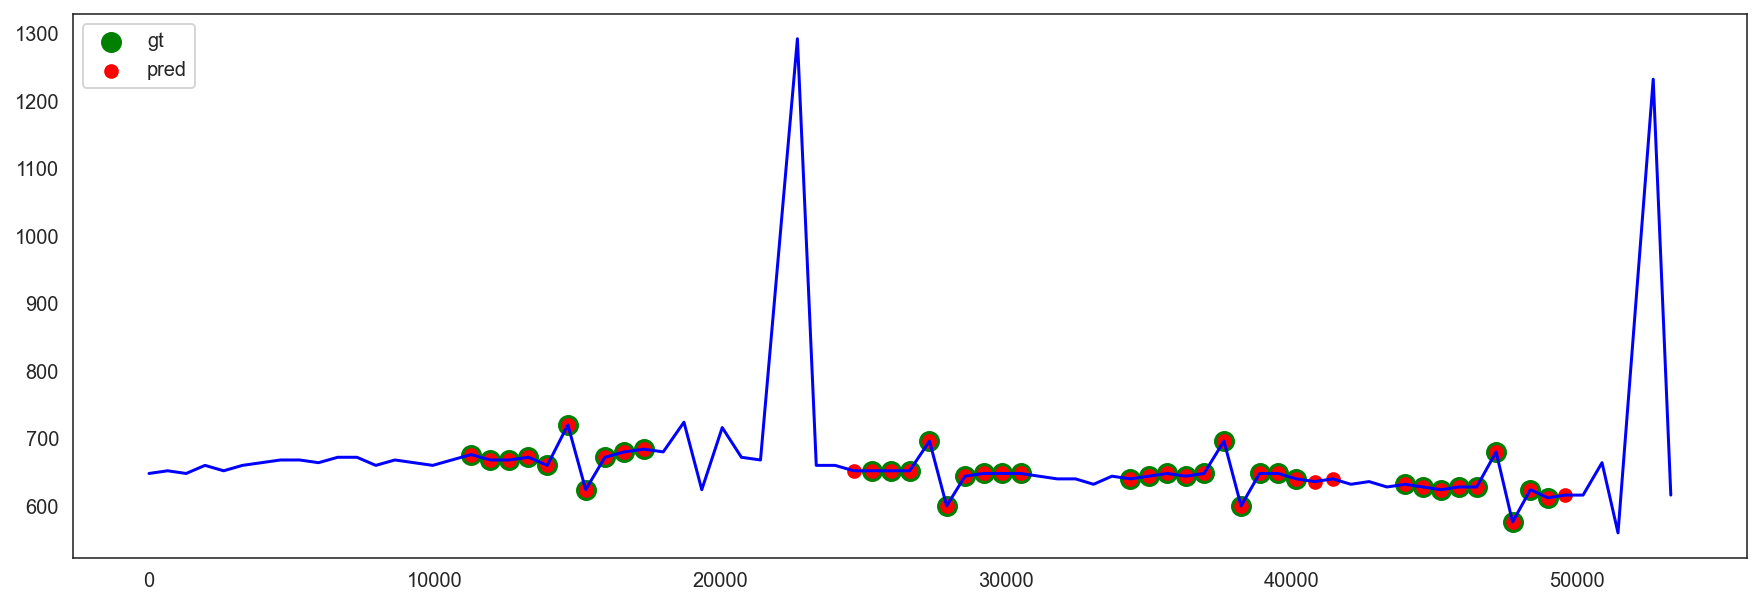

0 560 560
(570,) (560, 475) (570,) (570,) (560,)


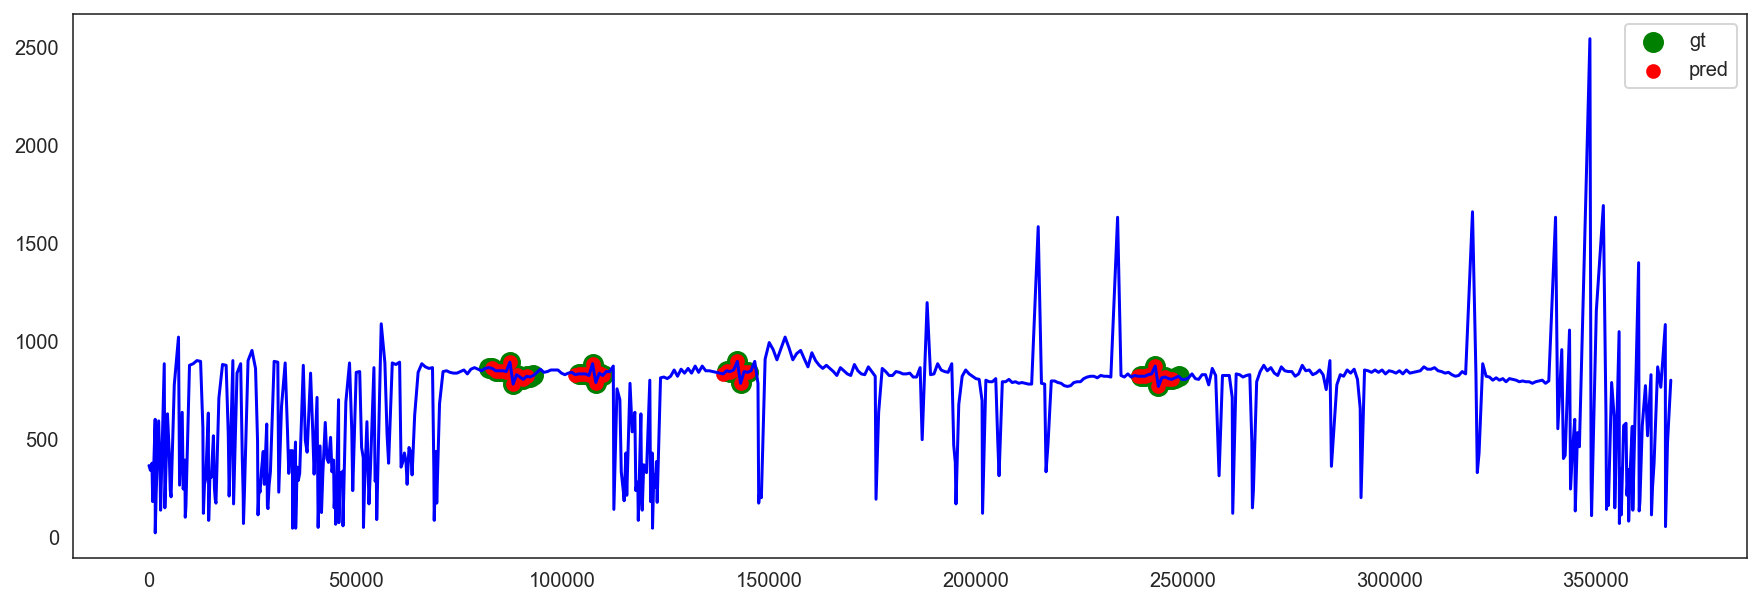

0 51 51
(61,) (51, 475) (61,) (61,) (51,)


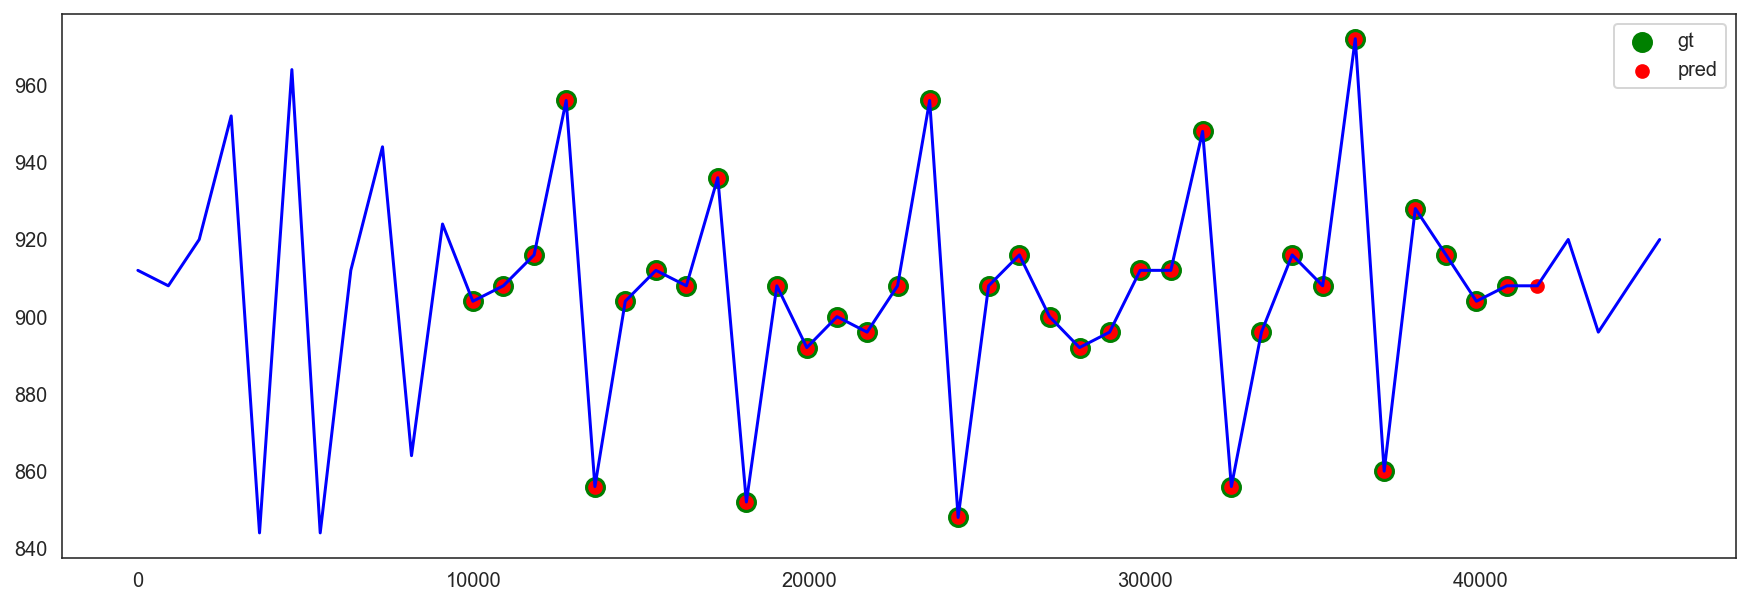

0 99 99
(109,) (99, 475) (109,) (109,) (99,)


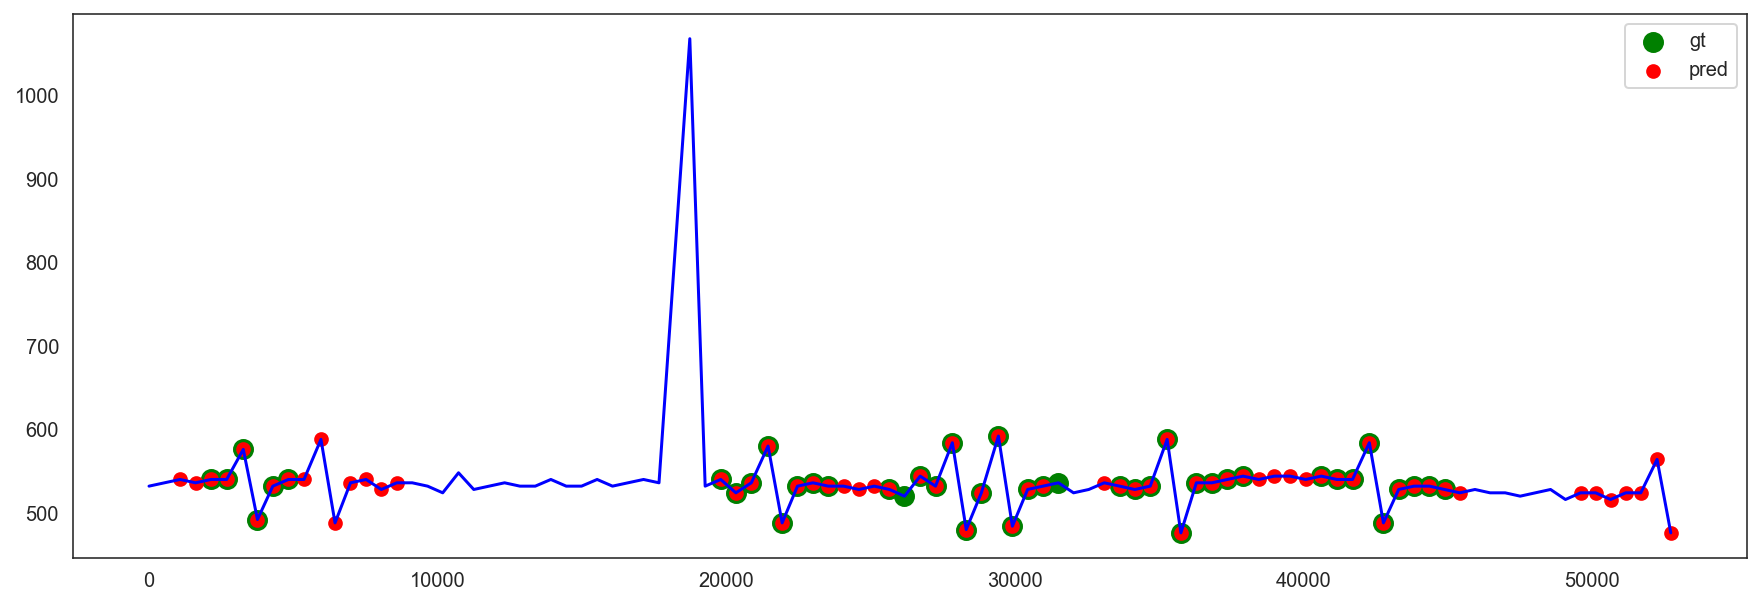

0 97 97
(107,) (97, 475) (107,) (107,) (97,)


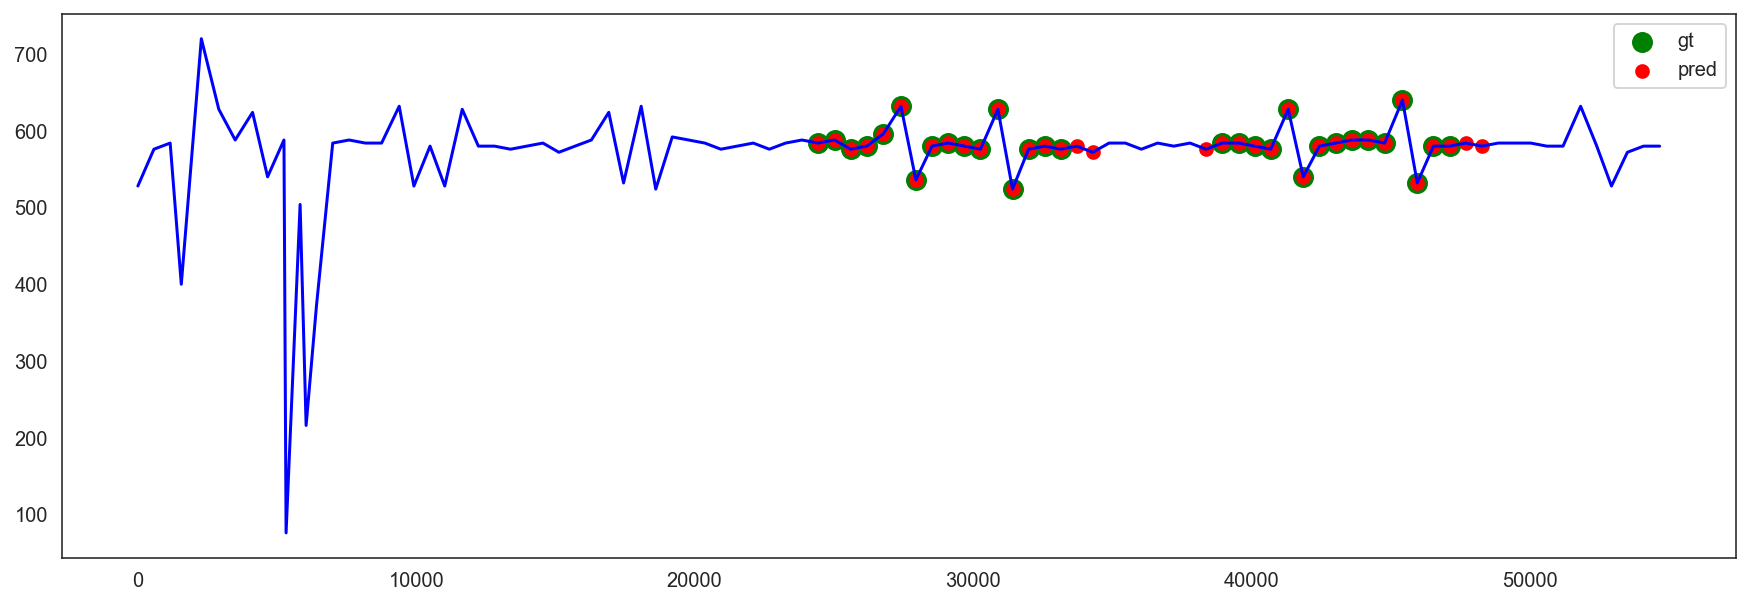

0 309 309
(319,) (309, 475) (319,) (319,) (309,)


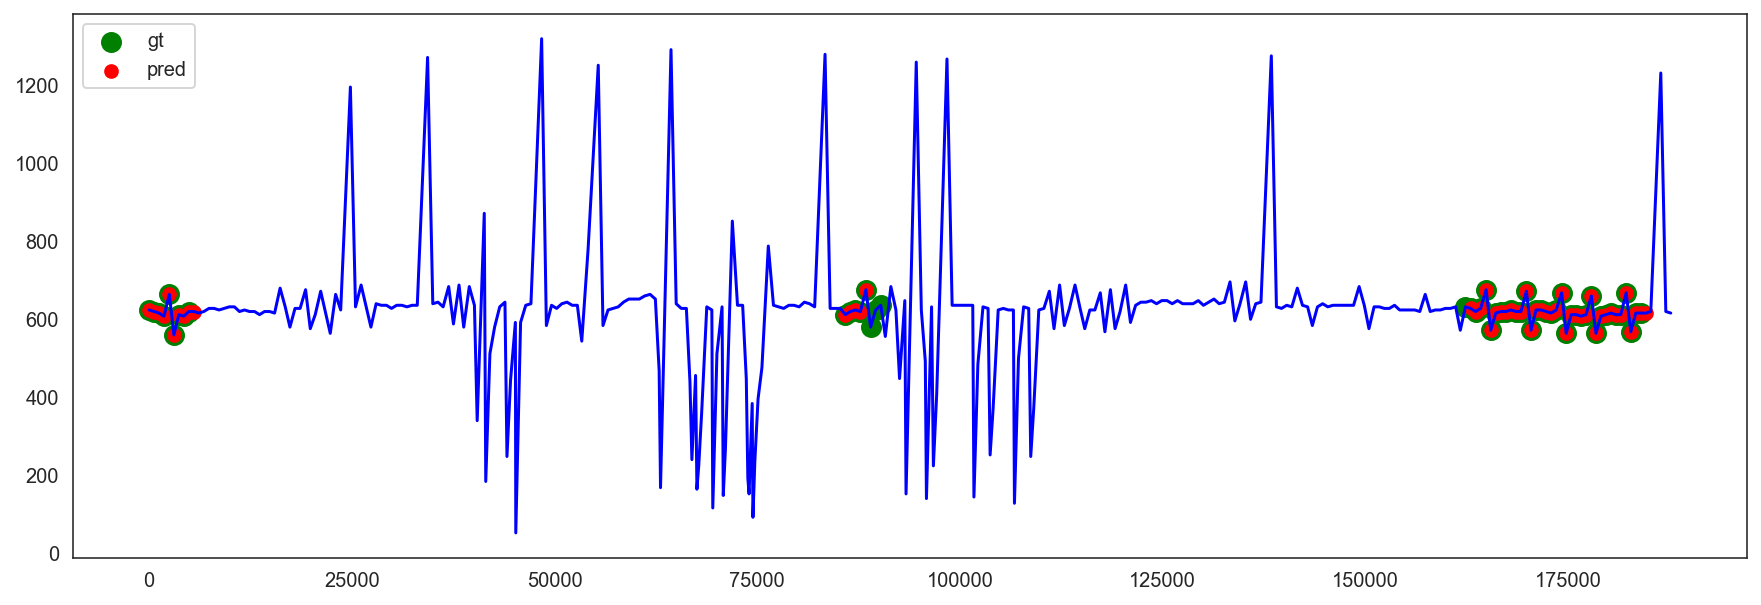

In [128]:
# seq_ids_train, seq_ids_val, seq_ids_test 
for id_ in tqdm(seq_ids_test):
#     time, x, x_data, y = get_slices_check(id_, len_=10)
#     time, x_data, x, y = get_check(data, id_, chunk_len=CHUNK_LEN) 
#     x_data = x_data.reshape((x_data.shape[0],x_data.shape[1] *x_data.shape[2] ))
#     pred = model.predict(x_data)
#     pred = [0,0,0,0,0] + list(pred) + [0,0,0,0,0]
#     pred = np.array(pred)
# #     print(pred)
#     print(time.shape,x_data.shape, x.shape, y.shape, pred.shape)
#     plot_res(time[5:-5], x[5:-5], gt=y[5:-5], pred=pred[5:-5])
    time, x_data, x, y = get_check(data, id_, chunk_len=CHUNK_LEN) 
    pca = pca_transformer.transform(x_data[:,:, 0])
    x_data = x_data.reshape((x_data.shape[0],x_data.shape[1] *x_data.shape[2] ))
    
    x_data = x_data.tolist()
    for i in range(len(pca)):
        x_data[i].extend(pca[i])
    x_data = np.array(x_data)

    pred = model.predict(x_data)#[11:-11]
    
    print(len(test[test.id == id_]), len(x_data), len(pred))
    print(time.shape,x_data.shape, x.shape, y.shape, pred.shape)
#     plot_res(time[5:-5], x[5:-5], gt=y[5:-5], pred=pred)
    plot_res(data[data.id == id_].time.values, data[data.id == id_].x.values, gt=data[data.id == id_].y.values, pred=pred)

# автоенкодеры пошли =)

In [26]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import load_data
# import metrics
# import evaluation
import importlib
import tensorflow_probability as tfp
tfpl = tfp.layers
tfd = tfp.distributions
tfk = tf.keras
tfkl = tf.keras.layers

print(tf.__version__)

if tf.__version__ == '1.14.0':
    print("Tensorflow 1.14.0")
    tf.compat.v1.enable_eager_execution()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
else:
    #tf.compat.v1.enable_eager_execution()
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.set_visible_devices(physical_devices[1:], 'GPU')
#     tf.config.experimental.set_memory_growth(physical_devices[1], True)

2.1.0


In [28]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [33]:
def create_simple_model(input_output_shape):
    latent_dim = 8 * 20

    _reg = tfk.regularizers.l2(0.1)
    
    model = tfk.Sequential([
        tfkl.InputLayer(input_shape=input_output_shape, name='encoder_input'),
        tfkl.Flatten(),
        tfkl.Dense(512, activation=tf.nn.leaky_relu),
        tfkl.Dense(512, activation=tf.nn.leaky_relu),
        tfkl.Dense(512, activation=tf.nn.leaky_relu),
        tfkl.Dense(1, activation=tf.nn.sigmoid),
    ], name='model')
    model.summary()

    return model

model = create_simple_model(x_train.shape[1:])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=tfk.losses.binary_crossentropy, metrics=[f1_m])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 470)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               241152    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 766,977
Trainable params: 766,977
Non-trainable params: 0
_________________________________________________________________
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shap

In [36]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='./data/checkpoints_autoenc/{}-fc_simple.cpkt'.format(model.name),
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_frequency='epoch')

In [54]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [55]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-5), metrics=[f1_m])

In [56]:
model.fit(x_train[:10], y_train[:10], validation_data=(x_val, y_val), epochs=150, batch_size=10)

Train on 10 samples, validate on 13514 samples
Epoch 1/150
10/10 [==============================] - 3s 276ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 2/150
10/10 [==============================] - 1s 119ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 3/150


KeyboardInterrupt: 

In [35]:
def fit(model, x, y, x_val, y_val, max_epochs=1000, batch_size=1, verbose=1):
    earlystopper = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', min_delta=0.001, patience=20,
                                                    verbose=verbose, restore_best_weights=True)
    
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint('./data/checkpoints_autoenc/fc_simple.cpkt', 
                                                          monitor='val_loss', 
                                                          verbose=verbose, save_best_only=True,
                                                          save_weights_only=False, mode='auto', save_freq='epoch')
    hist = model.fit(x, y,
                     epochs=max_epochs,
                     batch_size=batch_size,
                     validation_data=(x_val, y_val),
                     shuffle=True,
                     verbose=verbose,
                     callbacks=[earlystopper, model_checkpoint])
    return hist

train_hist = fit(model, x_train, y_train, x_val, y_val)

Train on 48206 samples, validate on 13514 samples
Epoch 1/1000
  569/48206 [..............................] - ETA: 9:40 - loss: nan - f1_m: nan

KeyboardInterrupt: 

In [80]:
def create_simple_model(input_output_shape):
    latent_dim = 8 * 20

    _reg = tfk.regularizers.l2(0.1)
    
    encoder = tfk.Sequential([
        tfkl.InputLayer(input_shape=input_output_shape, name='encoder_input'),
        tfkl.Flatten(),
        tfkl.Dense(latent_dim, activation=tf.nn.leaky_relu),
    ], name='encoder')
    encoder.summary()

    decoder = tfk.Sequential([
        tfkl.InputLayer(input_shape=[latent_dim]),
        tfkl.Dense(input_output_shape[0], activation=tf.nn.leaky_relu),
        tfkl.Reshape(input_output_shape),
     ], name='decoder')
    decoder.summary()

    model = tfk.Model(inputs=encoder.inputs,
                          outputs=decoder(encoder.outputs[0]))
    return model

model = create_simple_model(x_train.shape[1:])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=tfk.losses.mse, metrics=[f1_m])
model.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 160)               1760      
Total params: 1,760
Trainable params: 1,760
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                1610      
_________________________________________________________________
reshape_5 (Reshape)          (None, 10)                0         
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Model: "model_5"
_____________________

In [81]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='./data/checkpoints_autoenc/{}-autoenc_simple.cpkt'.format(model.name),
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_frequency='epoch')

In [82]:
def fit(model, x, y, x_val, y_val, max_epochs=1000, batch_size=128, verbose=1):
    earlystopper = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', min_delta=0.001, patience=20,
                                                    verbose=verbose, restore_best_weights=True)
    
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint('./data/checkpoints_autoenc/autoenc_simple.cpkt', 
                                                          monitor='val_loss', 
                                                          verbose=verbose, save_best_only=True,
                                                          save_weights_only=False, mode='auto', save_freq='epoch')
    hist = model.fit(x, y,
                     epochs=max_epochs,
                     batch_size=batch_size,
                     validation_data=(x_val, y_val),
                     shuffle=True,
                     verbose=verbose,
                     callbacks=[earlystopper, model_checkpoint])
    return hist

train_hist = fit(model, x_train, y_train, x_val, y_val)

Train on 37649 samples, validate on 9825 samples
Epoch 1/1000
37248/37649 [============================>.] - ETA: 0s - loss: 0.1287 - f1_m: 0.0029
Epoch 00001: val_loss improved from inf to 0.11404, saving model to ./data/checkpoints_autoenc/autoenc_simple.cpkt
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./data/checkpoints_autoenc/autoenc_simple.cpkt/assets
37649/37649 [==============================] - 5s 142us/sample - loss: 0.1286 - f1_m: 0.0029 - val_loss: 0.1140 - val_f1_m: 4.3051e-04
Epoch 2/1000
37248/37649 [============================>.] - ETA: 0s - loss: 0.1112 - f1_m: 2.5271e-04
Epoch 00002: val_loss improved from 0.11404 to 0.10558, saving model to ./data/checkpoints_autoenc/autoenc_simple.cpkt
INFO:tensorflow:Assets written to: ./data/checkpoints_autoenc/autoenc_simple.cpkt/assets
37649/37649 [==============================] - 4s 96us/sample - loss: 0.1113 - f1_m: 2.4929e-04 - val_loss: 0.1056 - val_f1

KeyboardInterrupt: 

In [42]:
x_train[0]

array([800, 780, 792, 820, 804, 828, 916, 960, 956, 928, 836, 792, 776,
       736, 724, 728, 760, 804, 848, 856])

In [43]:
x_train.reshape((33127, 20, 1))[0]

array([[800],
       [780],
       [792],
       [820],
       [804],
       [828],
       [916],
       [960],
       [956],
       [928],
       [836],
       [792],
       [776],
       [736],
       [724],
       [728],
       [760],
       [804],
       [848],
       [856]])

In [85]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# y_train = y_train.astype(float)
# y_val = y_val.astype(float)
# y_test = y_test.astype(float)
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)).astype(float)
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1], 1)).astype(float)
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)).astype(float)

In [86]:
x_val.shape, y_val.shape

((9825, 10, 1), (9825, 10, 1))

In [87]:
def create_vae_model(shape, latent_dim = 12):
    
    prior = tfd.Independent(tfd.Normal(loc=tf.ones(latent_dim)*0.125, scale=1), reinterpreted_batch_ndims=1)
    hidden_size = tfpl.IndependentNormal.params_size(latent_dim)
    
    inputs  = keras.Input(shape=(shape[1], shape[2]), name='encoder_input')
    
    encoderModel= keras.Sequential([
                                   keras.layers.LSTM(hidden_size,input_shape=(shape[1], shape[2]),
                                                     use_bias=False, activation=tf.nn.relu, name="lstm_encoder" ),
                                   keras.layers.Dense(latent_dim, activation=None, use_bias=False),
#                                    keras.layers.Dense(hidden_size, activation=None, use_bias=False),
#                                    keras.layers.Reshape([hidden_size]),
#                                    tfpl.IndependentNormal(latent_dim, 
#                                             activity_regularizer= tfpl.KLDivergenceRegularizer(prior, weight=10),
#                                             convert_to_tensor_fn=tfd.Distribution.sample, name='hidden_dist')
                                   ],  name="Encoder")
    encoder = encoderModel(inputs)
    
    
    decoderModel = keras.Sequential([ keras.layers.RepeatVector(n=shape[1]),
                                      keras.layers.LSTM(units=latent_dim, return_sequences=True, name="lstm_decoder_1"),
                                      keras.layers.LSTM(units=latent_dim, return_sequences=True, name="lstm_decoder_2"),
#                                       keras.layers.TimeDistributed( keras.layers.Dense(
#                                                    units=tfpl.IndependentNormal.params_size(shape[2]))),
#                                       tfpl.IndependentNormal(shape[2], name='output_dist')
                                     keras.layers.Dense(shape[2], activation=None, use_bias=False),
                                    ], name = "Decoder")
    output_dist = decoderModel(encoder)
    
    
#     negloglik = lambda x, rv_x: -rv_x.log_prob(x)    
  
    model = keras.Model(inputs=inputs, outputs=output_dist, name="{}-{}".format("VAE", latent_dim))
#     model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=tfk.losses.mse, metrics=[f1_m])
    return model, decoderModel, encoderModel, prior

model, decoder, encoder, prior = create_vae_model(x_train.shape)
model.summary()

Model: "VAE-12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 10, 1)]           0         
_________________________________________________________________
Encoder (Sequential)         (None, 12)                2688      
_________________________________________________________________
Decoder (Sequential)         (None, 10, 1)             2412      
Total params: 5,100
Trainable params: 5,100
Non-trainable params: 0
_________________________________________________________________


In [88]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='./data/checkpoints_autoenc/{}-autoenc_vae.cpkt'.format(model.name),
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_frequency='epoch')

In [89]:
res = model.fit(x_train, y_train, 
                validation_data = (x_val, y_val),
                epochs=10000, batch_size=2**16,   shuffle=True,  verbose = 1,            
                callbacks = [tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr :  1e-4), 
                            cp_callback] 
               )

visualization.plot_loss(res)

Train on 37649 samples, validate on 9825 samples
Epoch 1/10000

Epoch 00001: saving model to ./data/checkpoints_autoenc/VAE-12-autoenc_vae.cpkt
37649/37649 [==============================] - 23s 615us/sample - loss: 0.1278 - f1_m: 0.0000e+00 - val_loss: 0.1230 - val_f1_m: 0.0000e+00
Epoch 2/10000

Epoch 00002: saving model to ./data/checkpoints_autoenc/VAE-12-autoenc_vae.cpkt
37649/37649 [==============================] - 3s 79us/sample - loss: 0.1276 - f1_m: 0.0000e+00 - val_loss: 0.1229 - val_f1_m: 0.0000e+00
Epoch 3/10000

Epoch 00003: saving model to ./data/checkpoints_autoenc/VAE-12-autoenc_vae.cpkt
37649/37649 [==============================] - 4s 97us/sample - loss: 0.1275 - f1_m: 0.0000e+00 - val_loss: 0.1227 - val_f1_m: 0.0000e+00
Epoch 4/10000

Epoch 00004: saving model to ./data/checkpoints_autoenc/VAE-12-autoenc_vae.cpkt
37649/37649 [==============================] - 4s 102us/sample - loss: 0.1273 - f1_m: 0.0000e+00 - val_loss: 0.1226 - val_f1_m: 0.0000e+00
Epoch 5/10000

E

KeyboardInterrupt: 

In [ ]:
# вот в этой модели вообще не уверена она еще с вероятностным слоем

def create_cvae_model(latent_dim = 15):
    
    prior = tfd.Independent(tfd.Normal(loc=tf.ones(latent_dim)*0.125, scale=1), reinterpreted_batch_ndims=1)
    hidden_size = tfpl.IndependentNormal.params_size(latent_dim)
    
    inputs  = keras.Input(shape=(X_train.shape[1], X_train.shape[2]), name='encoder_input')
#     host_ids = inputs[:,:,-1]
#     print(host_ids)
    encoderModel= keras.Sequential([
                                   keras.layers.LSTM(hidden_size,input_shape=(X_train.shape[1], X_train.shape[2]),
                                                     use_bias=False, activation= tf.nn.relu ),
                                   keras.layers.Dense(hidden_size, activation=None, use_bias=False),
                                   keras.layers.Reshape([hidden_size]),
                                   tfpl.IndependentNormal(latent_dim, 
                                            activity_regularizer= tfpl.KLDivergenceRegularizer(prior, weight=8), ## !!! важный параметр
                                            convert_to_tensor_fn=tfd.Distribution.sample, name='hidden_dist')
                                   ],  name="Encoder")
    encoder = encoderModel(inputs)
    encoder_out = keras.layers.RepeatVector(n=X_train.shape[1])(encoder)
#     print(host_ids.shape)
#     host_ids = keras.layers.Reshape((-1, 1))(host_ids)
#     print(encoder_out.shape)
#     print(host_ids.shape)
    decoder_in = encoder_out #keras.layers.Concatenate(axis=2)([encoder_out, host_ids])    
       

    
    decoderModel = keras.Sequential([ keras.layers.LSTM(units=latent_dim, return_sequences=True),
                                      keras.layers.LSTM(units=latent_dim, return_sequences=True),
                                      keras.layers.TimeDistributed( keras.layers.Dense(
                                                   units=tfpl.IndependentNormal.params_size( X_train.shape[2]))),
                                      tfpl.IndependentNormal(X_train.shape[2], name='output_dist')
                                    ], name = "Decoder")
    
    output_dist = decoderModel(decoder_in)
    
    
    negloglik = lambda x, rv_x: -rv_x.log_prob(x) #/ 1000000000000000000000000000000000.
    print(negloglik)
  
    model = keras.Model(inputs=inputs, outputs=output_dist, name="{}-{}".format("CVAE", latent_dim))
#     model.compile(loss=negloglik, optimizer=keras.optimizers.SGD(learning_rate=1e-3))
    return model, decoderModel, encoderModel, prior

model, decoder, encoder, prior = create_cvae_model()
negloglik = lambda x, rv_x: -rv_x.log_prob(x) 
model.compile(loss=negloglik, optimizer=keras.optimizers.SGD(learning_rate=1e-2))
model.summary()